In [1]:
import sys
import os

# Get current notebook directory
current_dir = os.getcwd()

# Add parent directory
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
import peptide
import math
import pandas as pd
import numpy as np

In [82]:
amino_acid_masses = {
        "A": 71.03711,   # Alanine
        "R": 156.10111,  # Arginine
        "N": 114.04293,  # Asparagine
        "D": 115.02694,  # Aspartic acid
        "C": 103.00919,  # Cysteine
        "E": 129.04259,  # Glutamic acid
        "Q": 128.05858,  # Glutamine
        "G": 57.02146,   # Glycine
        "H": 137.05891,  # Histidine
        "I": 113.08406,  # Isoleucine
        "L": 113.08406,  # Leucine
        "K": 128.09496,  # Lysine
        "M": 131.04049,  # Methionine
        "F": 147.06841,  # Phenylalanine
        "P": 97.05276,   # Proline
        "S": 87.03203,   # Serine
        "T": 101.04768,  # Threonine
        "W": 186.07931,  # Tryptophan
        "Y": 163.06333,  # Tyrosine
        "V": 99.06841    # Valine
    }

In [83]:
def create_fake_pairs(the_peptide):
    the_pep = peptide.Pep(the_peptide)
    pair_result = []
    result = []
    for i in range(1, len(the_pep.AA_array)):
        frag1 = the_pep.AA_array[:i]
        frag2 = the_pep.AA_array[i:]
        mass1 = sum([i.get_mass() for i in frag1])
        mass2 = sum([i.get_mass() for i in frag2])
        mass2 += 18.01056  # Adding H2O mass to the second fragment
        print(f"Fragment 1: {frag1}, Mass: {mass1:.4f}")
        print(f"Fragment 2: {frag2}, Mass: {mass2:.4f}")
        pair_result.append([mass1, mass2]) 
        result.append(mass1)
        result.append(mass2)
    result.sort()
    
    return result, pair_result

In [84]:
seq = "[CGEYFQ+2H]2+"
sorted_array, pair_array = create_fake_pairs(seq)

Fragment 1: [C], Mass: 103.0092
Fragment 2: [G, E, Y, F, Q], Mass: 642.2649
Fragment 1: [C, G], Mass: 160.0307
Fragment 2: [E, Y, F, Q], Mass: 585.2435
Fragment 1: [C, G, E], Mass: 289.0732
Fragment 2: [Y, F, Q], Mass: 456.2009
Fragment 1: [C, G, E, Y], Mass: 452.1366
Fragment 2: [F, Q], Mass: 293.1375
Fragment 1: [C, G, E, Y, F], Mass: 599.2050
Fragment 2: [Q], Mass: 146.0691


In [85]:
sorted_array = [0.0] + sorted_array + [sum(pair_array[0])]

In [86]:
sorted_array

[0.0,
 103.00919,
 146.06914,
 160.03065,
 289.07324,
 293.13755,
 452.13657,
 456.20088000000004,
 585.24347,
 599.20498,
 642.26493,
 745.27412]

In [87]:
mid_point = len(sorted_array) // 2
lower_half = sorted_array[:mid_point]
upper_half = sorted_array[mid_point:]
len(lower_half), len(upper_half)

(6, 6)

In [88]:
def generate_psp_grid(spectrum):
    # Ensure the spectrum is sorted to match the index logic
    S = sorted(list(spectrum))
    n = len(S)
    
    # Create an n x n grid
    # We iterate rows (i) then columns (j)
    # Label logic: (Value of Column j, Value of Row i)
    grid = [[(S[j], S[i]) for j in range(n)] for i in range(n)]
    
    return grid


In [89]:
generate_psp_grid(lower_half)

[[(0.0, 0.0),
  (103.00919, 0.0),
  (146.06914, 0.0),
  (160.03065, 0.0),
  (289.07324, 0.0),
  (293.13755, 0.0)],
 [(0.0, 103.00919),
  (103.00919, 103.00919),
  (146.06914, 103.00919),
  (160.03065, 103.00919),
  (289.07324, 103.00919),
  (293.13755, 103.00919)],
 [(0.0, 146.06914),
  (103.00919, 146.06914),
  (146.06914, 146.06914),
  (160.03065, 146.06914),
  (289.07324, 146.06914),
  (293.13755, 146.06914)],
 [(0.0, 160.03065),
  (103.00919, 160.03065),
  (146.06914, 160.03065),
  (160.03065, 160.03065),
  (289.07324, 160.03065),
  (293.13755, 160.03065)],
 [(0.0, 289.07324),
  (103.00919, 289.07324),
  (146.06914, 289.07324),
  (160.03065, 289.07324),
  (289.07324, 289.07324),
  (293.13755, 289.07324)],
 [(0.0, 293.13755),
  (103.00919, 293.13755),
  (146.06914, 293.13755),
  (160.03065, 293.13755),
  (289.07324, 293.13755),
  (293.13755, 293.13755)]]

In [90]:
import pandas as pd

def generate_psp_dataframe(spectrum):
    S = sorted(list(spectrum))
    n = len(S)
    
    # Generate data with the logic (S[col], S[row])
    data = [[(S[j], S[i]) for j in range(n)] for i in range(n)]
    
    # Create DataFrame with headers for clarity
    df = pd.DataFrame(data, index=S, columns=S)
    
    return df

df = generate_psp_dataframe(lower_half)
df

,0.00000,103.00919,146.06914,160.03065,289.07324,293.13755
0.00000,"(0.0, 0.0)","(103.00919, 0.0)","(146.06914, 0.0)","(160.03065, 0.0)","(289.07324, 0.0)","(293.13755, 0.0)"
103.00919,"(0.0, 103.00919)","(103.00919, 103.00919)","(146.06914, 103.00919)","(160.03065, 103.00919)","(289.07324, 103.00919)","(293.13755, 103.00919)"
146.06914,"(0.0, 146.06914)","(103.00919, 146.06914)","(146.06914, 146.06914)","(160.03065, 146.06914)","(289.07324, 146.06914)","(293.13755, 146.06914)"
160.03065,"(0.0, 160.03065)","(103.00919, 160.03065)","(146.06914, 160.03065)","(160.03065, 160.03065)","(289.07324, 160.03065)","(293.13755, 160.03065)"
289.07324,"(0.0, 289.07324)","(103.00919, 289.07324)","(146.06914, 289.07324)","(160.03065, 289.07324)","(289.07324, 289.07324)","(293.13755, 289.07324)"
293.13755,"(0.0, 293.13755)","(103.00919, 293.13755)","(146.06914, 293.13755)","(160.03065, 293.13755)","(289.07324, 293.13755)","(293.13755, 293.13755)"


In [114]:
def find_peptide_paths(spectrum, allowed_masses=None, tolerance=0.02):
    """
    Finds all valid paths from (0,0) in the PSP graph, handling floating point masses.
    
    Args:
        spectrum: A list or set of masses (e.g., {0.0, 57.02, 114.04...})
        allowed_masses: A list of valid jump sizes (e.g., amino acid masses). 
        tolerance: The allowable difference (delta) to consider a match valid.
    """
    
    # 1. Setup
    S = sorted(list(set(spectrum)))
    
    # Helper: Find values in S that are within 'tolerance' of 'target'
    def get_matches_in_spectrum(target_val):
        return [s for s in S if abs(s - target_val) <= tolerance]

    # Find start node (values in S close to 0)
    start_candidates = get_matches_in_spectrum(0.0)
    if not start_candidates:
        print("Warning: No mass close to 0.0 found in spectrum. Cannot start at (0,0).")
        return []
    
    # Start at the actual value found in spectrum (e.g., 0.0 or 0.0001)
    start_node = (start_candidates[0], start_candidates[0])

    # If no masses provided, use float versions of your example
    if allowed_masses is None:
        allowed_masses = [2.0, 3.0, 4.0, 6.0] 

    all_paths = []

    # 2. Recursive DFS Function
    def dfs(current_path):
        current_node = current_path[-1] # (x1, x2)
        x1, x2 = current_node
        current_max = max(x1, x2)
        
        found_extension = False
        
        # Try all possible mass jumps
        for m in allowed_masses:
            
            # --- Check "Down ↓" (Increase x1) ---
            target_x1 = x1 + m
            matches_x1 = get_matches_in_spectrum(target_x1)
            
            for s_next in matches_x1:
                next_node = (s_next, x2)
                
                # Growth Condition: max(new) must be > max(old)
                # With floats, strict inequality is sufficient as long as m > 0
                if max(next_node) <= current_max:
                    continue
                    
                found_extension = True
                dfs(current_path + [next_node])

            # --- Check "Right →" (Increase x2) ---
            target_x2 = x2 + m
            matches_x2 = get_matches_in_spectrum(target_x2)
            
            for s_next in matches_x2:
                next_node = (x1, s_next)
                
                if max(next_node) <= current_max:
                    continue

                found_extension = True
                dfs(current_path + [next_node])

        # If we can't extend further, this path is complete (or dead end)
        if not found_extension:
            all_paths.append(current_path)

    dfs([start_node])
    
    return all_paths

def format_path_string(path, with_aa= False):
    """
    Helper to turn a list of nodes [(0,0), (0,2)...] into the arrow string format
    Rounds numbers for cleaner display.
    """
    if not path: return ""
    
    def fmt_node(n):
        return f"({round(n[0], 3)}, {round(n[1], 3)})"
    
    output = fmt_node(path[0])
    
    for i in range(len(path) - 1):
        curr = path[i]
        next_n = path[i+1]
        
        # Determine direction
        # We use a small epsilon for direction check due to float precision,
        # though standard inequality usually works fine.
        if next_n[0] > curr[0]:
            direction = "Down ↓"
        else:
            direction = "Right →"
        if with_aa:
            if direction == "Down ↓":
                mass = round(next_n[0] - curr[0], 3)
            else:
                mass = round(next_n[1] - curr[1], 3)
            aa = None
            for key, value in amino_acid_masses.items():
                if abs(value - mass) <= 0.05:  # Allow small tolerance for matching
                    aa = key
                    break
            output += f" {direction}({aa}) {fmt_node(next_n)}"
        else:
        
            output += f" {direction} {fmt_node(next_n)}"
        
    return output

# --- Execution with Float Data ---

# 1. Define Spectrum (Simulated Float Data with slight noise)
# Ideally: {0, 2, 5, 6, 9}
# Noisy:   {0.0, 2.01, 5.00, 6.02, 9.01}
S_star = {0.0, 2.01, 5.00, 6.02, 9.01}

# 2. Define valid step sizes 
# We look for steps of size 2, 3, 4, 6 (allowing for tolerance)
example_masses = [2.0, 3.0, 4.0, 6.0]

# 3. Run Algorithm with Tolerance
# Tolerance 0.05 will match 2.01 to 2.0, and 9.01 to 5.00+4.0
paths = find_peptide_paths(S_star, allowed_masses=example_masses, tolerance=0.05)

# 4. Print Results
print(f"Spectrum: {sorted(list(S_star))}")
print(f"Allowed Steps: {example_masses}")
print(f"Tolerance: 0.05\n")
print(f"Found {len(paths)} valid paths:\n")

for p in paths:
    print(format_path_string(p))

Spectrum: [0.0, 2.01, 5.0, 6.02, 9.01]
Allowed Steps: [2.0, 3.0, 4.0, 6.0]
Tolerance: 0.05

Found 12 valid paths:

(0.0, 0.0) Down ↓ (2.01, 0.0) Down ↓ (5.0, 0.0) Down ↓ (9.01, 0.0)
(0.0, 0.0) Down ↓ (2.01, 0.0) Down ↓ (5.0, 0.0) Right → (5.0, 6.02) Right → (5.0, 9.01)
(0.0, 0.0) Down ↓ (2.01, 0.0) Down ↓ (5.0, 0.0) Right → (5.0, 6.02) Down ↓ (9.01, 6.02)
(0.0, 0.0) Down ↓ (2.01, 0.0) Down ↓ (6.02, 0.0) Down ↓ (9.01, 0.0)
(0.0, 0.0) Down ↓ (2.01, 0.0) Right → (2.01, 6.02) Right → (2.01, 9.01)
(0.0, 0.0) Right → (0.0, 2.01) Right → (0.0, 5.0) Right → (0.0, 9.01)
(0.0, 0.0) Right → (0.0, 2.01) Right → (0.0, 5.0) Down ↓ (6.02, 5.0) Down ↓ (9.01, 5.0)
(0.0, 0.0) Right → (0.0, 2.01) Right → (0.0, 5.0) Down ↓ (6.02, 5.0) Right → (6.02, 9.01)
(0.0, 0.0) Right → (0.0, 2.01) Right → (0.0, 6.02) Right → (0.0, 9.01)
(0.0, 0.0) Right → (0.0, 2.01) Down ↓ (6.02, 2.01) Down ↓ (9.01, 2.01)
(0.0, 0.0) Down ↓ (6.02, 0.0) Down ↓ (9.01, 0.0)
(0.0, 0.0) Right → (0.0, 6.02) Right → (0.0, 9.01)


In [115]:
paths

[[(0.0, 0.0), (2.01, 0.0), (5.0, 0.0), (9.01, 0.0)],
 [(0.0, 0.0), (2.01, 0.0), (5.0, 0.0), (5.0, 6.02), (5.0, 9.01)],
 [(0.0, 0.0), (2.01, 0.0), (5.0, 0.0), (5.0, 6.02), (9.01, 6.02)],
 [(0.0, 0.0), (2.01, 0.0), (6.02, 0.0), (9.01, 0.0)],
 [(0.0, 0.0), (2.01, 0.0), (2.01, 6.02), (2.01, 9.01)],
 [(0.0, 0.0), (0.0, 2.01), (0.0, 5.0), (0.0, 9.01)],
 [(0.0, 0.0), (0.0, 2.01), (0.0, 5.0), (6.02, 5.0), (9.01, 5.0)],
 [(0.0, 0.0), (0.0, 2.01), (0.0, 5.0), (6.02, 5.0), (6.02, 9.01)],
 [(0.0, 0.0), (0.0, 2.01), (0.0, 6.02), (0.0, 9.01)],
 [(0.0, 0.0), (0.0, 2.01), (6.02, 2.01), (9.01, 2.01)],
 [(0.0, 0.0), (6.02, 0.0), (9.01, 0.0)],
 [(0.0, 0.0), (0.0, 6.02), (0.0, 9.01)]]

In [116]:
path = find_peptide_paths(lower_half, amino_acid_masses.values())

In [117]:
for p in path:
    print(format_path_string(p, with_aa=True))

(0.0, 0.0) Down ↓(C) (103.009, 0.0) Down ↓(G) (160.031, 0.0) Down ↓(E) (289.073, 0.0)
(0.0, 0.0) Down ↓(C) (103.009, 0.0) Down ↓(W) (289.073, 0.0)
(0.0, 0.0) Right →(C) (0.0, 103.009) Right →(G) (0.0, 160.031) Right →(E) (0.0, 289.073)
(0.0, 0.0) Right →(C) (0.0, 103.009) Right →(W) (0.0, 289.073)


In [142]:
def find_peptide_paths(spectrum, allowed_masses=None, tolerance=0.02, start_point=(0.0, 18.01056)):
    """
    Finds all valid paths in the PSP graph, usually starting at (0, Water_Mass).
    
    Args:
        spectrum: A list or set of masses (e.g., {0.0, 18.01, 75.03...})
        allowed_masses: A list of valid jump sizes (e.g., amino acid masses). 
        tolerance: The allowable difference (delta) to consider a match valid.
        start_point: Tuple (x1, x2) to start search. Default is (0, Mass_H2O).
    """
    
    # 1. Setup
    S = sorted(list(set(spectrum)))
    
    # Helper: Find values in S that are within 'tolerance' of 'target'
    def get_matches_in_spectrum(target_val):
        return [s for s in S if abs(s - target_val) <= tolerance]

    # --- Start Node Logic ---
    target_x1, target_x2 = start_point
    
    matches_x1 = get_matches_in_spectrum(target_x1)
    matches_x2 = get_matches_in_spectrum(target_x2)
    
    if not matches_x1:
        print(f"Warning: Start value x1={target_x1} not found in spectrum (within tol={tolerance}).")
        return []
    if not matches_x2:
        print(f"Warning: Start value x2={target_x2} not found in spectrum (within tol={tolerance}).")
        return []
        
    # Generate all valid start combinations from the fuzzy matches
    start_nodes = [(m1, m2) for m1 in matches_x1 for m2 in matches_x2]

    # If no masses provided, use float versions of your example
    if allowed_masses is None:
        allowed_masses = [57.021, 71.037, 87.032, 97.053] # Gly, Ala, Ser, Pro (examples)

    all_paths = []

    # 2. Recursive DFS Function
    def dfs(current_path):
        current_node = current_path[-1] # (x1, x2)
        x1, x2 = current_node
        current_max = max(x1, x2)
        
        found_extension = False
        
        # Try all possible mass jumps
        for m in allowed_masses:
            
            # --- Check "Down ↓" (Increase x1) ---
            target_x1_next = x1 + m
            matches_x1_next = get_matches_in_spectrum(target_x1_next)
            
            for s_next in matches_x1_next:
                next_node = (s_next, x2)
                
                # Growth Condition: max(new) must be > max(old)
                if max(next_node) <= current_max:
                    continue
                    
                found_extension = True
                dfs(current_path + [next_node])

            # --- Check "Right →" (Increase x2) ---
            target_x2_next = x2 + m
            matches_x2_next = get_matches_in_spectrum(target_x2_next)
            
            for s_next in matches_x2_next:
                next_node = (x1, s_next)
                
                if max(next_node) <= current_max:
                    continue

                found_extension = True
                dfs(current_path + [next_node])

        # If we can't extend further, this path is complete (or dead end)
        if not found_extension:
            all_paths.append(current_path)

    # Launch search from all valid start nodes
    for start_node in start_nodes:
        dfs([start_node])
    
    return all_paths

def format_path_string(path, with_aa= False):
    """
    Helper to turn a list of nodes [(0,0), (0,2)...] into the arrow string format
    Rounds numbers for cleaner display.
    """
    if not path: return ""
    
    def fmt_node(n):
        return f"({round(n[0], 3)}, {round(n[1], 3)})"
    
    output = fmt_node(path[0])
    
    for i in range(len(path) - 1):
        curr = path[i]
        next_n = path[i+1]
        
        # Determine direction
        # We use a small epsilon for direction check due to float precision,
        # though standard inequality usually works fine.
        if next_n[0] > curr[0]:
            direction = "Down ↓"
        else:
            direction = "Right →"
        if with_aa:
            if direction == "Down ↓":
                mass = round(next_n[0] - curr[0], 3)
            else:
                mass = round(next_n[1] - curr[1], 3)
            aa = None
            for key, value in amino_acid_masses.items():
                if abs(value - mass) <= 0.05:  # Allow small tolerance for matching
                    aa = key
                    break
            output += f" {direction}({aa}) {fmt_node(next_n)}"
        else:
        
            output += f" {direction} {fmt_node(next_n)}"
        
    return output


def path_to_seq(path, seq_mass):
    """
    Helper to turn a list of nodes [(0,0), (0,2)...] into the arrow string format
    Rounds numbers for cleaner display.
    """
    if not path: return ""
    forward = []
    backward = []
    middle = None
    def fmt_node(n):
        return f"({round(n[0], 3)}, {round(n[1], 3)})"
    
    output = fmt_node(path[0])
    
    for i in range(len(path) - 1):
        curr = path[i]
        next_n = path[i+1]
        
        # Determine direction
        # We use a small epsilon for direction check due to float precision,
        # though standard inequality usually works fine.
        if next_n[0] > curr[0]:
            direction = "Down ↓"
    
        else:
            direction = "Right →"

        if direction == "Down ↓":
            mass = round(next_n[0] - curr[0], 3)
        else:
            mass = round(next_n[1] - curr[1], 3)
        aa = None
        for key, value in amino_acid_masses.items():
            if abs(value - mass) <= 0.05:  # Allow small tolerance for matching
                aa = key
                break
        output += f" {direction}({aa}) {fmt_node(next_n)}"
        if direction == "Down ↓":
            forward.append(aa)
        else:
            backward.append(aa)
    backward.reverse()
    
    the_middle_diff = seq_mass - (path[-1][0] + path[-1][1])
    for key, value in amino_acid_masses.items():
        if abs(value - the_middle_diff) <= 0.05:
            middle = key
            break

    full_seq = "".join(forward)
    if middle:
        full_seq += middle
    else:
        full_seq += "?"
    full_seq += "".join(backward)
    return full_seq

# --- Execution with Water Mass Start ---

# 1. Define Spectrum (Simulated)
# We need 0.0, 18.01 (Water), and some peaks that result from adding AA masses to them.
# Let's simulate a Glycine (57.02) step.
# 0.0 + 57.02 = 57.02
# 18.01 + 57.02 = 75.03
S_star = {0.0, 18.01056, 57.02146, 75.03202} 

# 2. Define valid step sizes (e.g., Glycine only for this test)
example_masses = [57.02146]


In [125]:
lower_half_modified = lower_half + [18.01056]
lower_half_modified.sort()

In [127]:
# 3. Run Algorithm starting at (0, 18.01)
paths = find_peptide_paths(
    lower_half_modified, 
    allowed_masses=amino_acid_masses.values(), 
    tolerance=0.02,
    start_point=(0.0, 18.01056)
)

# 4. Print Results
print(f"Spectrum: {[round(x,3) for x in sorted(list(S_star))]}")
print(f"Allowed Steps: {example_masses}")
print(f"Start Point: (0, 18.01056)\n")

if not paths:
    print("No paths found. (Did you ensure the start point and steps exist in the spectrum?)")
else:
    print(f"Found {len(paths)} valid paths:\n")
    for p in paths:
        print(format_path_string(p, with_aa=True))

Spectrum: [0.0, 18.011, 57.021, 75.032]
Allowed Steps: [57.02146]
Start Point: (0, 18.01056)

Found 7 valid paths:

(0.0, 18.011) Down ↓(C) (103.009, 18.011) Right →(Q) (103.009, 146.069) Down ↓(G) (160.031, 146.069) Down ↓(E) (289.073, 146.069) Right →(F) (289.073, 293.138)
(0.0, 18.011) Down ↓(C) (103.009, 18.011) Right →(Q) (103.009, 146.069) Down ↓(G) (160.031, 146.069) Right →(F) (160.031, 293.138)
(0.0, 18.011) Down ↓(C) (103.009, 18.011) Right →(Q) (103.009, 146.069) Right →(F) (103.009, 293.138)
(0.0, 18.011) Down ↓(C) (103.009, 18.011) Right →(Q) (103.009, 146.069) Down ↓(W) (289.073, 146.069) Right →(F) (289.073, 293.138)
(0.0, 18.011) Down ↓(C) (103.009, 18.011) Down ↓(G) (160.031, 18.011) Down ↓(E) (289.073, 18.011)
(0.0, 18.011) Down ↓(C) (103.009, 18.011) Down ↓(W) (289.073, 18.011)
(0.0, 18.011) Right →(Q) (0.0, 146.069) Right →(F) (0.0, 293.138)


In [134]:
def get_pep_mass(seq):
    mass= 0
    for i in seq:
        mass += amino_acid_masses.get(i, 0)
    mass += 18.01056  # Adding H2O mass
    return mass
total_mass = get_pep_mass("CGEYFQ")

In [136]:
total_mass - 289.073 - 293.138

163.06312000000008

In [143]:
for p in paths:
    print(path_to_seq(p, total_mass))

CGEYFQ
CG?FQ
C?FQ
CWYFQ
CGE?
CW?
?FQ


In [1]:
import anti_symmetric

## real data

In [1]:
amino_acid_masses = {
        "A": 71.03711,   # Alanine
        "R": 156.10111,  # Arginine
        "N": 114.04293,  # Asparagine
        "D": 115.02694,  # Aspartic acid
        "C": 103.00919,  # Cysteine
        "E": 129.04259,  # Glutamic acid
        "Q": 128.05858,  # Glutamine
        "G": 57.02146,   # Glycine
        "H": 137.05891,  # Histidine
        "I": 113.08406,  # Isoleucine
        "L": 113.08406,  # Leucine
        "K": 128.09496,  # Lysine
        "M": 131.04049,  # Methionine
        "F": 147.06841,  # Phenylalanine
        "P": 97.05276,   # Proline
        "S": 87.03203,   # Serine
        "T": 101.04768,  # Threonine
        "W": 186.07931,  # Tryptophan
        "Y": 163.06333,  # Tyrosine
        "V": 99.06841    # Valine
    }


amino_acid_masses_merge = {
        "A": 71.03711,   # Alanine
        "R": 156.10111,  # Arginine
        "N": 114.04293,  # Asparagine
        "D": 115.02694,  # Aspartic acid
        "C": 103.00919,  # Cysteine
        "E": 129.04259,  # Glutamic acid
        "Q": 128.05858,  # Glutamine
        "G": 57.02146,   # Glycine
        "H": 137.05891,  # Histidine
        "113(I/L)": 113.08406,  # Isoleucine
        #"L": 113.08406,  # Leucine
        "K": 128.09496,  # Lysine
        "M": 131.04049,  # Methionine
        "F": 147.06841,  # Phenylalanine
        "P": 97.05276,   # Proline
        "S": 87.03203,   # Serine
        "T": 101.04768,  # Threonine
        "W": 186.07931,  # Tryptophan
        "Y": 163.06333,  # Tyrosine
        "V": 99.06841    # Valine
    }

def create_fake_pairs(the_peptide):
    the_pep = peptide.Pep(the_peptide)
    pair_result = []
    result = []
    for i in range(1, len(the_pep.AA_array)):
        frag1 = the_pep.AA_array[:i]
        frag2 = the_pep.AA_array[i:]
        mass1 = sum([i.get_mass() for i in frag1])
        mass2 = sum([i.get_mass() for i in frag2])
        mass2 += 18.01056  # Adding H2O mass to the second fragment
        print(f"Fragment 1: {frag1}, Mass: {mass1:.4f}")
        print(f"Fragment 2: {frag2}, Mass: {mass2:.4f}")
        pair_result.append([mass1, mass2]) 
        result.append(mass1)
        result.append(mass2)
    result.sort()
    
    return result, pair_result

def get_pep_mass(seq):
    mass= 0
    for i in seq:
        mass += amino_acid_masses.get(i, 0)
    mass += 18.01056  # Adding H2O mass
    return mass


def find_peptide_paths(spectrum, allowed_masses=None, tolerance=0.02, start_point=(0.0, 18.01056)):
    """
    Finds all valid paths in the PSP graph, usually starting at (0, Water_Mass).
    
    Args:
        spectrum: A list or set of masses (e.g., {0.0, 18.01, 75.03...})
        allowed_masses: A list of valid jump sizes (e.g., amino acid masses). 
        tolerance: The allowable difference (delta) to consider a match valid.
        start_point: Tuple (x1, x2) to start search. Default is (0, Mass_H2O).
    """
    
    # 1. Setup
    S = sorted(list(set(spectrum)))
    
    # Helper: Find values in S that are within 'tolerance' of 'target'
    def get_matches_in_spectrum(target_val):
        return [s for s in S if abs(s - target_val) <= tolerance]

    # --- Start Node Logic ---
    target_x1, target_x2 = start_point
    
    matches_x1 = get_matches_in_spectrum(target_x1)
    matches_x2 = get_matches_in_spectrum(target_x2)
    
    if not matches_x1:
        print(f"Warning: Start value x1={target_x1} not found in spectrum (within tol={tolerance}).")
        return []
    if not matches_x2:
        print(f"Warning: Start value x2={target_x2} not found in spectrum (within tol={tolerance}).")
        return []
        
    # Generate all valid start combinations from the fuzzy matches
    start_nodes = [(m1, m2) for m1 in matches_x1 for m2 in matches_x2]

    # If no masses provided, use float versions of your example
    if allowed_masses is None:
        allowed_masses = [57.021, 71.037, 87.032, 97.053] # Gly, Ala, Ser, Pro (examples)

    all_paths = []

    # 2. Recursive DFS Function
    def dfs(current_path):
        current_node = current_path[-1] # (x1, x2)
        x1, x2 = current_node
        current_max = max(x1, x2)
        
        found_extension = False
        
        # Try all possible mass jumps
        for m in allowed_masses:
            
            # --- Check "Down ↓" (Increase x1) ---
            target_x1_next = x1 + m
            matches_x1_next = get_matches_in_spectrum(target_x1_next)
            
            for s_next in matches_x1_next:
                next_node = (s_next, x2)
                
                # Growth Condition: max(new) must be > max(old)
                if max(next_node) <= current_max:
                    continue
                    
                found_extension = True
                dfs(current_path + [next_node])

            # --- Check "Right →" (Increase x2) ---
            target_x2_next = x2 + m
            matches_x2_next = get_matches_in_spectrum(target_x2_next)
            
            for s_next in matches_x2_next:
                next_node = (x1, s_next)
                
                if max(next_node) <= current_max:
                    continue

                found_extension = True
                dfs(current_path + [next_node])

        # If we can't extend further, this path is complete (or dead end)
        if not found_extension:
            all_paths.append(current_path)

    # Launch search from all valid start nodes
    for start_node in start_nodes:
        dfs([start_node])
    
    return all_paths

def format_path_string(path, with_aa= False):
    """
    Helper to turn a list of nodes [(0,0), (0,2)...] into the arrow string format
    Rounds numbers for cleaner display.
    """
    if not path: return ""
    
    def fmt_node(n):
        return f"({round(n[0], 3)}, {round(n[1], 3)})"
    
    output = fmt_node(path[0])
    
    for i in range(len(path) - 1):
        curr = path[i]
        next_n = path[i+1]
        
        # Determine direction
        # We use a small epsilon for direction check due to float precision,
        # though standard inequality usually works fine.
        if next_n[0] > curr[0]:
            direction = "Down ↓"
        else:
            direction = "Right →"
        if with_aa:
            if direction == "Down ↓":
                mass = round(next_n[0] - curr[0], 3)
            else:
                mass = round(next_n[1] - curr[1], 3)
            aa = None
            for key, value in amino_acid_masses.items():
                if abs(value - mass) <= 0.01:  # Allow small tolerance for matching
                    aa = key
                    break
            output += f" {direction}({aa}) {fmt_node(next_n)}"
        else:
        
            output += f" {direction} {fmt_node(next_n)}"
        
    return output


def path_to_seq(path, seq_mass):
    """
    Helper to turn a list of nodes [(0,0), (0,2)...] into the arrow string format
    Rounds numbers for cleaner display.
    """
    if not path: return ""
    forward = []
    backward = []
    middle = None
    def fmt_node(n):
        return f"({round(n[0], 3)}, {round(n[1], 3)})"
    
    output = fmt_node(path[0])
    
    for i in range(len(path) - 1):
        curr = path[i]
        next_n = path[i+1]
        
        # Determine direction
        # We use a small epsilon for direction check due to float precision,
        # though standard inequality usually works fine.
        if next_n[0] > curr[0]:
            direction = "Down ↓"
    
        else:
            direction = "Right →"

        if direction == "Down ↓":
            mass = round(next_n[0] - curr[0], 3)
        else:
            mass = round(next_n[1] - curr[1], 3)
        aa = None
        for key, value in amino_acid_masses.items():
            if abs(value - mass) <= 0.001:  # Allow small tolerance for matching
                aa = key
                break
        output += f" {direction}({aa}) {fmt_node(next_n)}"
        if direction == "Down ↓":
            forward.append(aa)
        else:
            backward.append(aa)
    backward.reverse()
    
    the_middle_diff = seq_mass - (path[-1][0] + path[-1][1])
    
    for key, value in amino_acid_masses.items():
        if abs(value - the_middle_diff) <= 0.05:
            middle = key
            break

    full_seq = "".join(forward)
    if middle:
        full_seq += middle
    else:
        full_seq += "?"
    full_seq += "".join(backward)
    return full_seq

In [2]:
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
vis_dir = os.path.join(parent_dir, "vis")
connected_graphs_dir = os.path.join(parent_dir, "vis_connect")

sys.path.append(vis_dir)
sys.path.append(connected_graphs_dir)

import data_parse
import util
import peptide
import pandas as pd
import numpy as np
import connected_graph

In [3]:
data = 'ME4_2+'
csv_data = f"{data}.csv"
file_path = f"../data/Top_Correlations_At_Full_Num_Scans_PCov/annotated/{csv_data}"
file_path = os.path.abspath(file_path) 

In [4]:
sequence = util.name_ouput(csv_data)
pep = peptide.Pep(sequence)
the_length = len(pep.AA_array)
csv_data = file_path
df = pd.read_csv(csv_data)
df = df[df['Index'].notna()]
results = data_parse.process_ion_dataframe(df.head(50), pep)
results['classification'] = results.apply(data_parse.data_classify, args=(pep,), axis=1)
the_list = []
the_y_list = []

results['loss1'] = results['loss1'].replace({None: np.nan})
results['loss2'] = results['loss2'].replace({None: np.nan})

/Users/kevinmbp/Desktop/2D_spec_dict/vis/data_parse.py:259: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['y6', 'y5', 'y5', 'y4', 'y4', 'y6', 'y3', 'y3', 'y5', 'y2', 'y2', 'y3', 'y6', 'y4', 'y6', 'y5', 'y4']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_current.loc[df_current['type1'] == 'y', ['y_ion', 'y_mz']] = df_current.loc[df_current['type1'] == 'y', ['ion1', 'mass1']].values
/Users/kevinmbp/Desktop/2D_spec_dict/vis/data_parse.py:260: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['b4', 'b6', 'b6', 'a5', 'b5', 'bi(2-4)', 'bi(3-4)', 'b5', 'b5', 'b6', 'a6', 'b6', 'b3', 'a6', 'a4', 'bi(3-5)', 'b4', 'a4', 'a6', 'b5', 'bi(2-6)', 'a6', 'ai(3-5)']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_current.loc[df_current['type1'] == 

In [5]:
df = results
df['ranking'] = df['Index']

In [6]:
df.head(5)

,Index,A_raw,ion1,loss1,loss_sign1,charge1,mass1,B_raw,ion2,loss2,...,chosen_sum_from,chosen_sum,type1,type2,y_ion,y_mz,b_ion,b_mz,classification,ranking
0,1.0,b4(1+),b4,NaN,None,1+,508.15,y9(1+),y9,NaN,...,m1+m2,1525.89,b,y,y9,1017.74,b4,508.15,usable,1.0
1,2.0,y6(1+),y6,NaN,None,1+,685.48,b7(1+),b7,NaN,...,m1+m2,1525.90,y,b,y6,685.48,b7,840.42,usable,2.0
2,3.0,y5(1+),y5,NaN,None,1+,571.42,b8-(NH3)(1+),b8,(NH3),...,m1+m2,1508.79,y,b,y5,571.42,b8,937.37,usable,3.0
3,4.0,b6(1+),b6,NaN,None,1+,712.40,y7(1+),y7,NaN,...,m1+m2,1525.92,b,y,y7,813.52,b6,712.40,usable,4.0
4,5.0,y5(1+),y5,NaN,None,1+,571.42,b8(1+),b8,NaN,...,m1+m2,1525.82,y,b,y5,571.42,b8,954.40,usable,5.0


In [7]:
LETTER_ORDER = {ch: i for i, ch in enumerate("abcdefghijklmnopqrstuvwxyz")}
rows = ['Parent','(NH3)','(H2O)', '(NH3)-(H2O)','(H2O)-(NH3)', 'a', '2(H2O)', '2(NH3)', '(H3PO4)']
conserve_line_mass_dict = {'Parent': pep.pep_mass, 'a': pep.pep_mass - 28.0106}

def classify_conserve_line(row):
    the_mass = row['chosen_sum']
    for i in conserve_line_mass_dict:
        if the_mass < conserve_line_mass_dict[i] + 1 and the_mass > conserve_line_mass_dict[i] - 1:
            return i
    else:
        return None

df['conserve_line'] = df.apply(classify_conserve_line, axis = 1)

In [8]:
data = 'ME4_2+'
my_peaks, sequence, pep = connected_graph.build_mass_list(data)

/Users/kevinmbp/Desktop/2D_spec_dict/vis/data_parse.py:259: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['y6', 'y5', 'y5', 'y4', 'y4', 'y6', 'y3', 'y3', 'y5', 'y2', 'y2', 'y3', 'y6', 'y4', 'y6', 'y5', 'y4']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_current.loc[df_current['type1'] == 'y', ['y_ion', 'y_mz']] = df_current.loc[df_current['type1'] == 'y', ['ion1', 'mass1']].values
/Users/kevinmbp/Desktop/2D_spec_dict/vis/data_parse.py:260: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['b4', 'b6', 'b6', 'a5', 'b5', 'bi(2-4)', 'bi(3-4)', 'b5', 'b5', 'b6', 'a6', 'b6', 'b3', 'a6', 'a4', 'bi(3-5)', 'b4', 'a4', 'a6', 'b5', 'bi(2-6)', 'a6', 'ai(3-5)']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_current.loc[df_current['type1'] == 

In [9]:
my_peaks

[273.18005400000004,
 344.133164,
 386.264114,
 499.348174,
 507.19649400000003,
 564.217954,
 570.385284,
 684.4282139999999,
 711.2863639999999,
 812.4867939999999,
 839.3449439999999,
 953.3878739999999,
 959.5552039999999,
 1016.5766639999999,
 1024.424984,
 1137.509044,
 1179.639994,
 1250.5931039999998]

In [10]:
sequence

'ME4_2+: [LGE(nitro)YGFQNAILVR+2H]2+'

In [11]:
sorted_array = [0.0] + my_peaks + [pep.seq_mass]

In [12]:
mid_point = len(sorted_array) // 2
lower_half = sorted_array[:mid_point]
upper_half = sorted_array[mid_point:]
lower_half_modified = lower_half + [18.01056]
lower_half_modified.sort()

In [13]:
lower_half_modified

[0.0,
 18.01056,
 273.18005400000004,
 344.133164,
 386.264114,
 499.348174,
 507.19649400000003,
 564.217954,
 570.385284,
 684.4282139999999,
 711.2863639999999]

In [14]:
AA_MASSES = connected_graph.AA_MASSES
DOUBLE_AA_MASSES = connected_graph.DOUBLE_AA_MASSES
TRIPLE_AA_MASSES = connected_graph.TRIPLE_AA_MASSES
QUADRA_AA_MASSES = connected_graph.QUADRA_AA_MASSES

In [15]:
allowed_mass_list = list(AA_MASSES.values()) + list(DOUBLE_AA_MASSES.values()) + list(TRIPLE_AA_MASSES.values()) #+ list(QUADRA_AA_MASSES.values())
merge_close_values = connected_graph.merge_close_values
allowed_mass_list = merge_close_values(allowed_mass_list, 0.01)



In [16]:
paths = find_peptide_paths(
    lower_half_modified, 
    allowed_masses=allowed_mass_list, 
    tolerance=0.01,
    start_point=(0.0, 18.01056)
)

In [17]:
def format_path_string_no_aa(path, with_aa= False):
    """
    Helper to turn a list of nodes [(0,0), (0,2)...] into the arrow string format
    Rounds numbers for cleaner display.
    """
    if not path: return ""
    
    def fmt_node(n):
        return f"({round(n[0], 3)}, {round(n[1], 3)})"
    
    output = fmt_node(path[0])
    
    for i in range(len(path) - 1):
        curr = path[i]
        next_n = path[i+1]
        
        # Determine direction
        # We use a small epsilon for direction check due to float precision,
        # though standard inequality usually works fine.
        if next_n[0] > curr[0]:
            direction = "Down ↓"
        else:
            direction = "Right →"
        if with_aa:
            if direction == "Down ↓":
                mass = round(next_n[0] - curr[0], 3)
            else:
                mass = round(next_n[1] - curr[1], 3)
            aa = None
            for key, value in amino_acid_masses.items():
                if abs(value - mass) <= 0.05:  # Allow small tolerance for matching
                    aa = key
                    break
            output += f" {direction}({aa}) {fmt_node(next_n)}"
        else:
        
            output += f" {direction} {fmt_node(next_n)}"
        
    return output

In [18]:
for p in paths:
    print(format_path_string_no_aa(p, with_aa=True))

(0.0, 18.011) Right →(None) (0.0, 273.18) Right →(I) (0.0, 386.264) Right →(I) (0.0, 499.348) Right →(A) (0.0, 570.385) Right →(N) (0.0, 684.428)
(0.0, 18.011) Right →(None) (0.0, 273.18) Right →(I) (0.0, 386.264) Right →(I) (0.0, 499.348) Right →(A) (0.0, 570.385) Right →(N) (0.0, 684.428)
(0.0, 18.011) Right →(None) (0.0, 273.18) Right →(I) (0.0, 386.264) Right →(I) (0.0, 499.348) Right →(None) (0.0, 684.428)
(0.0, 18.011) Right →(None) (0.0, 273.18) Right →(I) (0.0, 386.264) Right →(I) (0.0, 499.348) Right →(None) (0.0, 684.428)
(0.0, 18.011) Right →(None) (0.0, 273.18) Right →(I) (0.0, 386.264) Right →(I) (0.0, 499.348) Right →(None) (0.0, 684.428)
(0.0, 18.011) Right →(None) (0.0, 273.18) Right →(I) (0.0, 386.264) Right →(None) (0.0, 570.385) Right →(N) (0.0, 684.428)
(0.0, 18.011) Right →(None) (0.0, 273.18) Right →(I) (0.0, 386.264) Right →(None) (0.0, 570.385) Right →(N) (0.0, 684.428)
(0.0, 18.011) Right →(None) (0.0, 273.18) Right →(I) (0.0, 386.264) Right →(None) (0.0, 684.4

In [19]:
the_max = max([len(p) for p in paths])
the_max_length_num = sum([1 for p in paths if len(p) == the_max])
the_max_length_paths = [p for p in paths if len(p) == the_max]

the_max_length_pep = set([format_path_string_no_aa(p) for p in paths if len(p) == the_max])


print(len(paths), "paths found.", "Max length:", the_max, 'There are', len(the_max_length_pep), "paths of max length.")
print("Max length paths:")

for p in the_max_length_pep:
    print(p)

1156 paths found. Max length: 10 There are 1 paths of max length.
Max length paths:
(0.0, 18.011) Right → (0.0, 273.18) Down ↓ (344.133, 273.18) Right → (344.133, 386.264) Right → (344.133, 499.348) Down ↓ (507.196, 499.348) Down ↓ (564.218, 499.348) Right → (564.218, 570.385) Right → (564.218, 684.428) Down ↓ (711.286, 684.428)


In [44]:
# Combine all mass maps into one dictionary
MASTER_MASS_MAP = {
    **AA_MASSES,
    **DOUBLE_AA_MASSES,
    **TRIPLE_AA_MASSES,
}

def find_possible_labels(target_mass: float, tol: float = 0.01):
    """
    Given a mass, return all keys whose values fall within ±tol.

    Returns:
        List of (label, mass) pairs.
    """
    matches = []
    for label, mass in MASTER_MASS_MAP.items():
        if abs(mass - target_mass) <= tol:
            matches.append((label, mass))
    if len(matches) == 0:
        #return ['?']
        return (target_mass)
    else:
        return tuple(matches)

In [51]:
def path_to_seq_complex(path, seq_mass, thresh = 0.02):
    """
    Helper to turn a list of nodes [(0,0), (0,2)...] into the arrow string format
    Rounds numbers for cleaner display.
    """
    if not path: return ""
    forward = []
    backward = []
    middle = None
    def fmt_node(n):
        return f"({round(n[0], 3)}, {round(n[1], 3)})"
    
    output = fmt_node(path[0])
    
    for i in range(len(path) - 1):
        curr = path[i]
        next_n = path[i+1]
        
        # Determine direction
        # We use a small epsilon for direction check due to float precision,
        # though standard inequality usually works fine.
        if next_n[0] > curr[0]:
            direction = "Down ↓"
    
        else:
            direction = "Right →"

        if direction == "Down ↓":
            mass = round(next_n[0] - curr[0], 3)
        else:
            mass = round(next_n[1] - curr[1], 3)
        
        possible_labels = find_possible_labels(mass, tol=thresh)
        
        output += f" {direction}({possible_labels}) {fmt_node(next_n)}"
        if direction == "Down ↓":
            forward.append(possible_labels)
        else:
            backward.append(possible_labels)
    backward.reverse()
    
    the_middle_diff = seq_mass - (path[-1][0] + path[-1][1])
    
    
    possible_middle_labels = find_possible_labels(the_middle_diff, tol=thresh)
    
    

    #full_seq = "".join(forward)
    #full_seq += f"({possible_middle_labels})"
    #full_seq += "".join(backward)
    
    full_seq = []
    full_seq.extend(forward)
    full_seq.append(possible_middle_labels)
    full_seq.extend(backward)
    
    return tuple(full_seq)

In [52]:
the_max_length_pep = set([path_to_seq_complex(p, pep.seq_mass + 18.01056) for p in paths if len(p) == the_max])


In [53]:
the_max_length_pep


{((('(I/L)+C+Q', 344.151827),
   ('(I/L)+E(nitro)+G', 344.133201),
   ('A+E(nitro)+V', 344.13320100000004),
   ('A+S+W', 344.148455),
   ('D+Q+T', 344.13320000000004),
   ('E+N+T', 344.13319900000005),
   ('E+Q+S', 344.133199),
   ('G+T+W', 344.148456),
   ('M+N+V', 344.151826)),
  (('Y', 163.063329),),
  (('G', 57.021464),),
  (('F', 147.068414),),
  (('Q', 128.058578), ('G+A', 128.058578)),
  (('N', 114.042927), ('G+G', 114.042928)),
  (('A', 71.037114),),
  (('(I/L)', 113.084064),),
  (('(I/L)', 113.084064),),
  (('V+R', 255.16952500000002),
   ('(I/L)+A+A', 255.158292),
   ('G+V+V', 255.15829200000002)))}

In [63]:
def format_path_to_seq(the_set):
    result = ''
    for each_set in the_set:
        for i, each in enumerate(each_set):
            result += f'edge{i+1}' + ': ' + ' \n '.join([str(x) for x in each]) + '\n'
    return result

In [64]:
print(format_path_to_seq(the_max_length_pep))

edge1: ('(I/L)+C+Q', 344.151827) 
 ('(I/L)+E(nitro)+G', 344.133201) 
 ('A+E(nitro)+V', 344.13320100000004) 
 ('A+S+W', 344.148455) 
 ('D+Q+T', 344.13320000000004) 
 ('E+N+T', 344.13319900000005) 
 ('E+Q+S', 344.133199) 
 ('G+T+W', 344.148456) 
 ('M+N+V', 344.151826)
edge2: ('Y', 163.063329)
edge3: ('G', 57.021464)
edge4: ('F', 147.068414)
edge5: ('Q', 128.058578) 
 ('G+A', 128.058578)
edge6: ('N', 114.042927) 
 ('G+G', 114.042928)
edge7: ('A', 71.037114)
edge8: ('(I/L)', 113.084064)
edge9: ('(I/L)', 113.084064)
edge10: ('V+R', 255.16952500000002) 
 ('(I/L)+A+A', 255.158292) 
 ('G+V+V', 255.15829200000002)



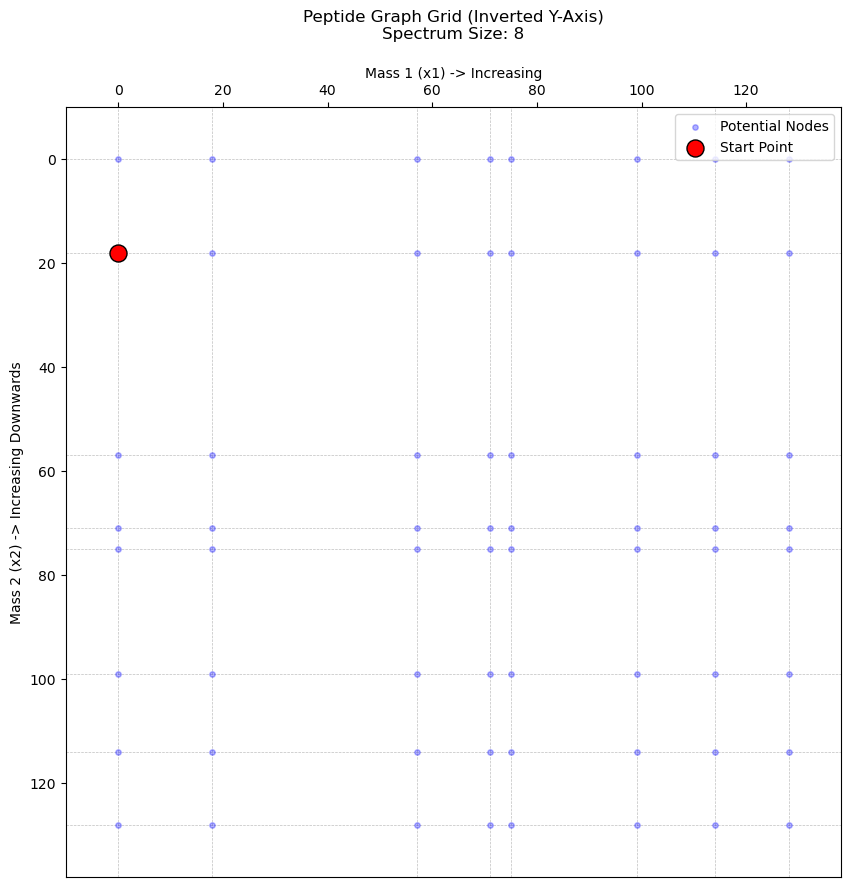

In [66]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_inverted_spectrum_grid(spectrum, start_point=(0.0, 18.01)):
    """
    Visualizes the N x N grid formed by the spectrum array.
    Y-axis is inverted (0 at top, max at bottom).
    X-axis is standard (0 at left, max at right).
    """
    # 1. Setup
    S = sorted(list(set(spectrum)))
    
    # Create the figure and get current axes
    fig, ax = plt.subplots(figsize=(10, 10))

    # 2. Draw Grid Lines
    for mass in S:
        # Vertical lines (constant X)
        ax.axvline(x=mass, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
        # Horizontal lines (constant Y)
        ax.axhline(y=mass, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # 3. Plot Intersections (Potential Nodes)
    X, Y = np.meshgrid(S, S)
    # Note on 'zorder': higher number means drawn on top of lower numbers
    ax.scatter(X, Y, s=15, c='blue', alpha=0.3, zorder=5, label='Potential Nodes')

    # 4. Highlight Start Point
    ax.scatter([start_point[0]], [start_point[1]], 
               color='red', s=150, edgecolors='black', zorder=10, label='Start Point')

    # --- 5. Key Changes for Inverted View ---
    
    # A. Define the limits with some padding so points aren't on the edge
    pad = 10
    ax.set_xlim(min(S) - pad, max(S) + pad)
    ax.set_ylim(min(S) - pad, max(S) + pad)

    # B. Invert the Y-axis so 0 is at the top
    ax.invert_yaxis()

    # C. Move X-axis ticks and label to the TOP for easier reading
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # --- Formatting ---
    ax.set_title(f"Peptide Graph Grid (Inverted Y-Axis)\nSpectrum Size: {len(S)}", pad=20)
    ax.set_xlabel("Mass 1 (x1) -> Increasing")
    ax.set_ylabel("Mass 2 (x2) -> Increasing Downwards")
    ax.legend(loc='upper right') # Move legend out of the way
    ax.grid(False)

    plt.show()

# --- Example Usage ---
dummy_spectrum = [0.0, 18.01, 57.02, 71.04, 75.03, 99.07, 114.1, 128.09]
visualize_inverted_spectrum_grid(dummy_spectrum)

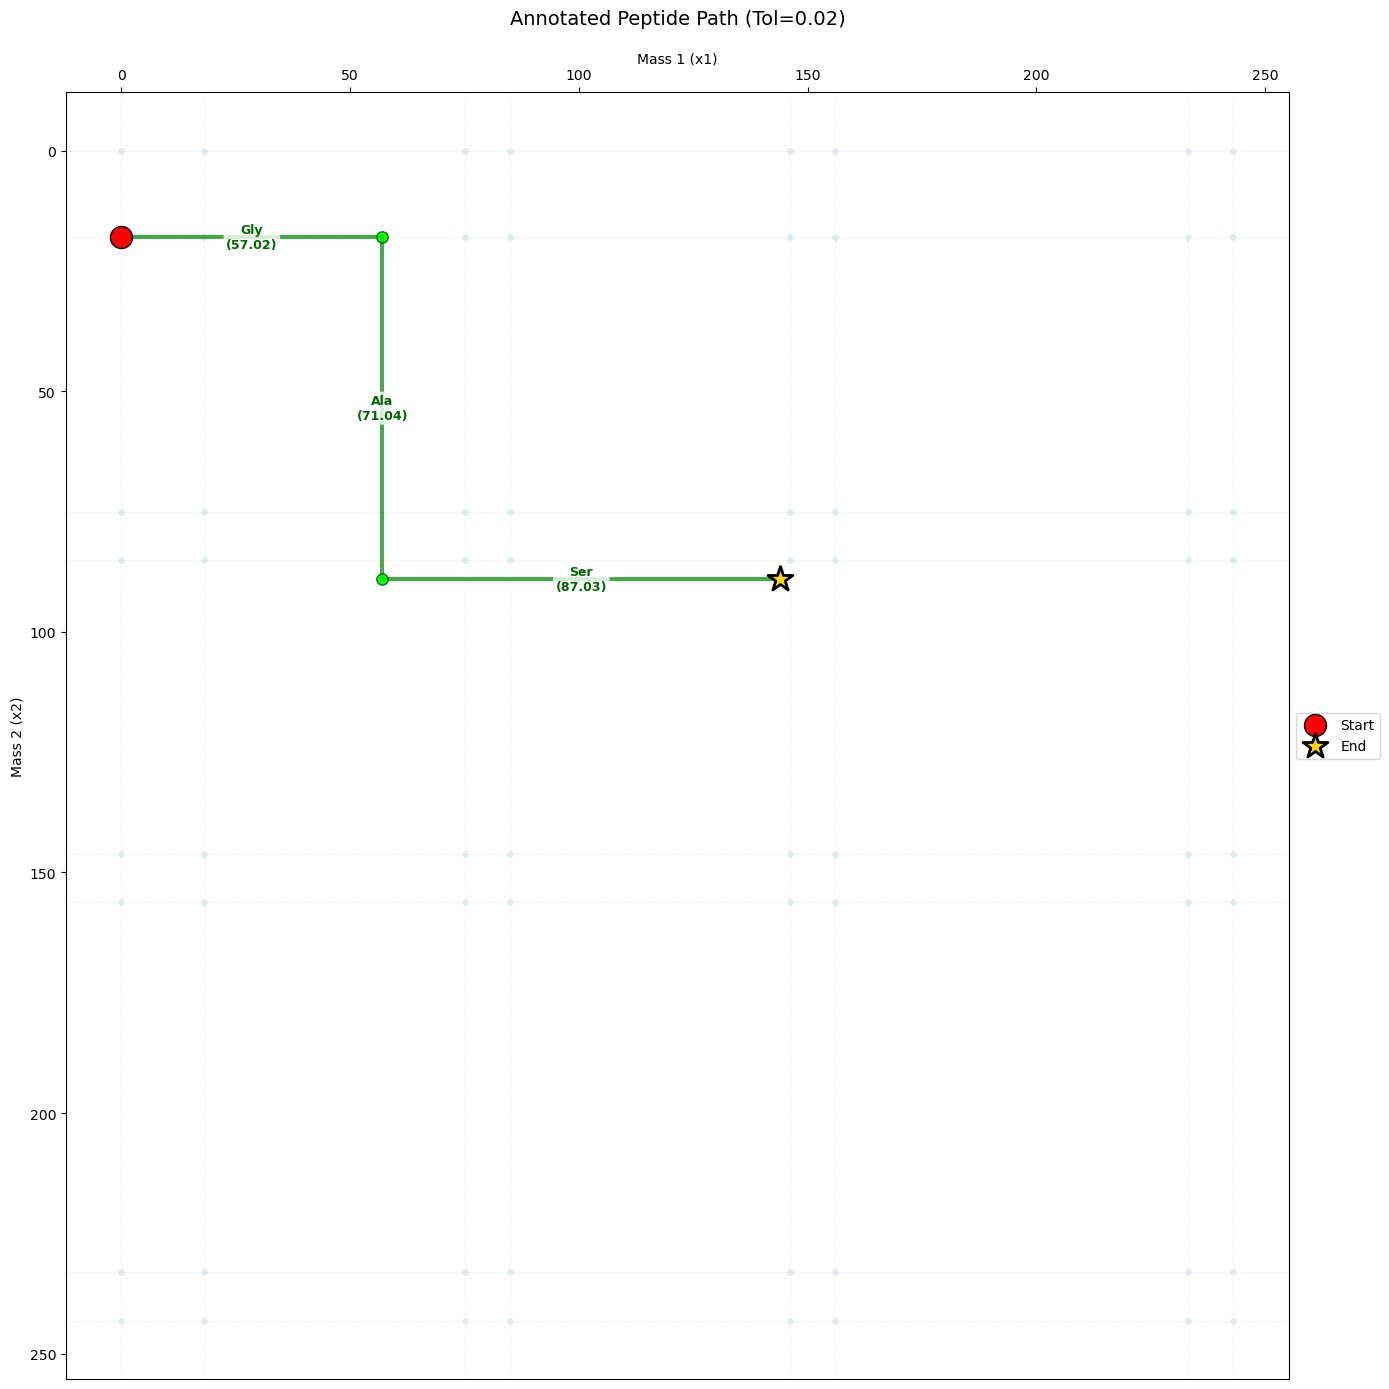

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_annotated_path(spectrum, path_list=None, tolerance=0.02, 
                             start_point=(0.0, 18.01), aa_map=None):
    """
    Visualizes the grid, snaps the path, and annotates edges with mass/AA names.
    
    Args:
        aa_map: A dictionary mapping mass floats to names strings. 
                e.g., {57.021: 'Gly', 71.037: 'Ala'}
    """
    # --- 1. Setup Grid & Snapping Helper (Same as before) ---
    S = sorted(list(set(spectrum)))
    S_arr = np.array(S)
    
    fig, ax = plt.subplots(figsize=(14, 14)) # Bigger figure for text space

    # Draw background grid
    for mass in S:
        ax.axvline(x=mass, color='gray', linestyle=':', linewidth=0.5, alpha=0.3)
        ax.axhline(y=mass, color='gray', linestyle=':', linewidth=0.5, alpha=0.3)
        
    # Background potential nodes
    X, Y = np.meshgrid(S, S)
    ax.scatter(X, Y, s=15, c='lightblue', alpha=0.3, zorder=1)

    def get_closest_in_spectrum(val):
        idx = (np.abs(S_arr - val)).argmin()
        closest = S_arr[idx]
        if abs(closest - val) <= tolerance:
            return closest
        return val # Return original if too far (shows issues visually)

    # Helper to get annotation text based on mass difference
    def get_anno_text(mass_diff):
        txt = f"{mass_diff:.2f}" # Default: just show the number
        if aa_map:
            # Find closest AA match within tolerance
            best_match_name = None
            min_diff = tolerance + 1e-9
            for aa_mass, name in aa_map.items():
                diff = abs(mass_diff - aa_mass)
                if diff <= tolerance and diff < min_diff:
                    min_diff = diff
                    best_match_name = name
            
            if best_match_name:
                 # Show Name AND Mass on two lines
                txt = f"{best_match_name}\n({mass_diff:.2f})"
        return txt

    # --- 2. Process Path and Draw Edges Individually ---
    if path_list and len(path_list) > 1:
        # First, snap all points
        snapped_points = []
        for (px, py) in path_list:
            snapped_points.append((get_closest_in_spectrum(px), get_closest_in_spectrum(py)))
            
        # Plot Start Point
        start_snapped = snapped_points[0]
        ax.scatter([start_snapped[0]], [start_snapped[1]], 
                   color='red', s=250, edgecolors='black', zorder=30, label='Start')

        # Iterate through pairs of points to define edges
        num_points = len(snapped_points)
        for i in range(num_points - 1):
            p_start = snapped_points[i]
            p_end = snapped_points[i+1]

            # A. Draw the line segment for this edge
            # We use 'marker' here to automatically draw the joints
            ax.plot([p_start[0], p_end[0]], [p_start[1], p_end[1]], 
                    color='green', linewidth=3, alpha=0.7, linestyle='-', 
                    marker='o', markersize=8, markerfacecolor='lime', markeredgecolor='darkgreen',
                    zorder=20)

            # B. Calculate Edge Properties for Annotation
            dx = p_end[0] - p_start[0]
            dy = p_end[1] - p_start[1]
            # The jump size is the larger difference (assuming horizontal/vertical moves)
            mass_jump = max(abs(dx), abs(dy))

            # C. Determine Annotation Text
            anno_text = get_anno_text(mass_jump)

            # D. Calculate Midpoint for placement
            mid_x = (p_start[0] + p_end[0]) / 2
            mid_y = (p_start[1] + p_end[1]) / 2

            # E. Place the Text Box
            # We use a semi-transparent white box (bbox) so text is readable 
            # even if it sits on top of grid lines.
            ax.text(mid_x, mid_y, anno_text, 
                    ha='center', va='center', fontsize=9, color='darkgreen', fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.8),
                    zorder=40) # zorder 40 puts text on top of everything else

        # Highlight Final Destination separately
        end_pt = snapped_points[-1]
        ax.scatter([end_pt[0]], [end_pt[1]], 
                   color='gold', marker='*', s=350, edgecolors='black', linewidth=2,
                   zorder=35, label='End')

    # --- Formatting ---
    pad = max(S) * 0.05 if S else 10
    ax.set_xlim(min(S) - pad, max(S) + pad)
    ax.set_ylim(min(S) - pad, max(S) + pad)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    ax.set_title(f"Annotated Peptide Path (Tol={tolerance})", pad=20, fontsize=14)
    ax.set_xlabel("Mass 1 (x1)")
    ax.set_ylabel("Mass 2 (x2)")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # ax.grid(False) # Grid is drawn manually

    plt.tight_layout()
    plt.show()

# --- Example Usage ---

# 1. Define standard Amino Acid masses
aa_masses = {
    57.02146: 'Gly',
    71.03711: 'Ala',
    87.03203: 'Ser',
    97.05276: 'Pro',
    113.08406: 'Ile/Leu',
    128.09496: 'Lys/Gln', # Close masses example
    147.06841: 'Phe'
}

# 2. Create a synthetic spectrum based on these masses + water
water = 18.01056
spec_vals = {0.0, water}
current_mass = water
# Create a path: H2O -> Gly -> Ala -> Ser
path_masses = [57.02146, 71.03711, 87.03203]
for m in path_masses:
    current_mass += m
    spec_vals.add(current_mass)
    # Add some noise peaks so the grid isn't too perfect
    spec_vals.add(current_mass + 10.0) 

spectrum_data = sorted(list(spec_vals))

# 3. Define a "noisy" path found by an algorithm
# Notice the values aren't exactly the theoretical ones in aa_masses
found_path = [
    (0.0, 18.0106),         # Start
    (57.022, 18.0106),      # Jump +57.0114 (approx Gly) horizontally
    (57.022, 89.048),       # Jump +71.0374 (approx Ala) vertically
    (144.055, 89.048)       # Jump +87.033 (approx Ser) horizontally
]

# 4. Visualize with the AA map
visualize_annotated_path(spectrum_data, 
                         path_list=found_path, 
                         tolerance=0.02, 
                         aa_map=aa_masses)

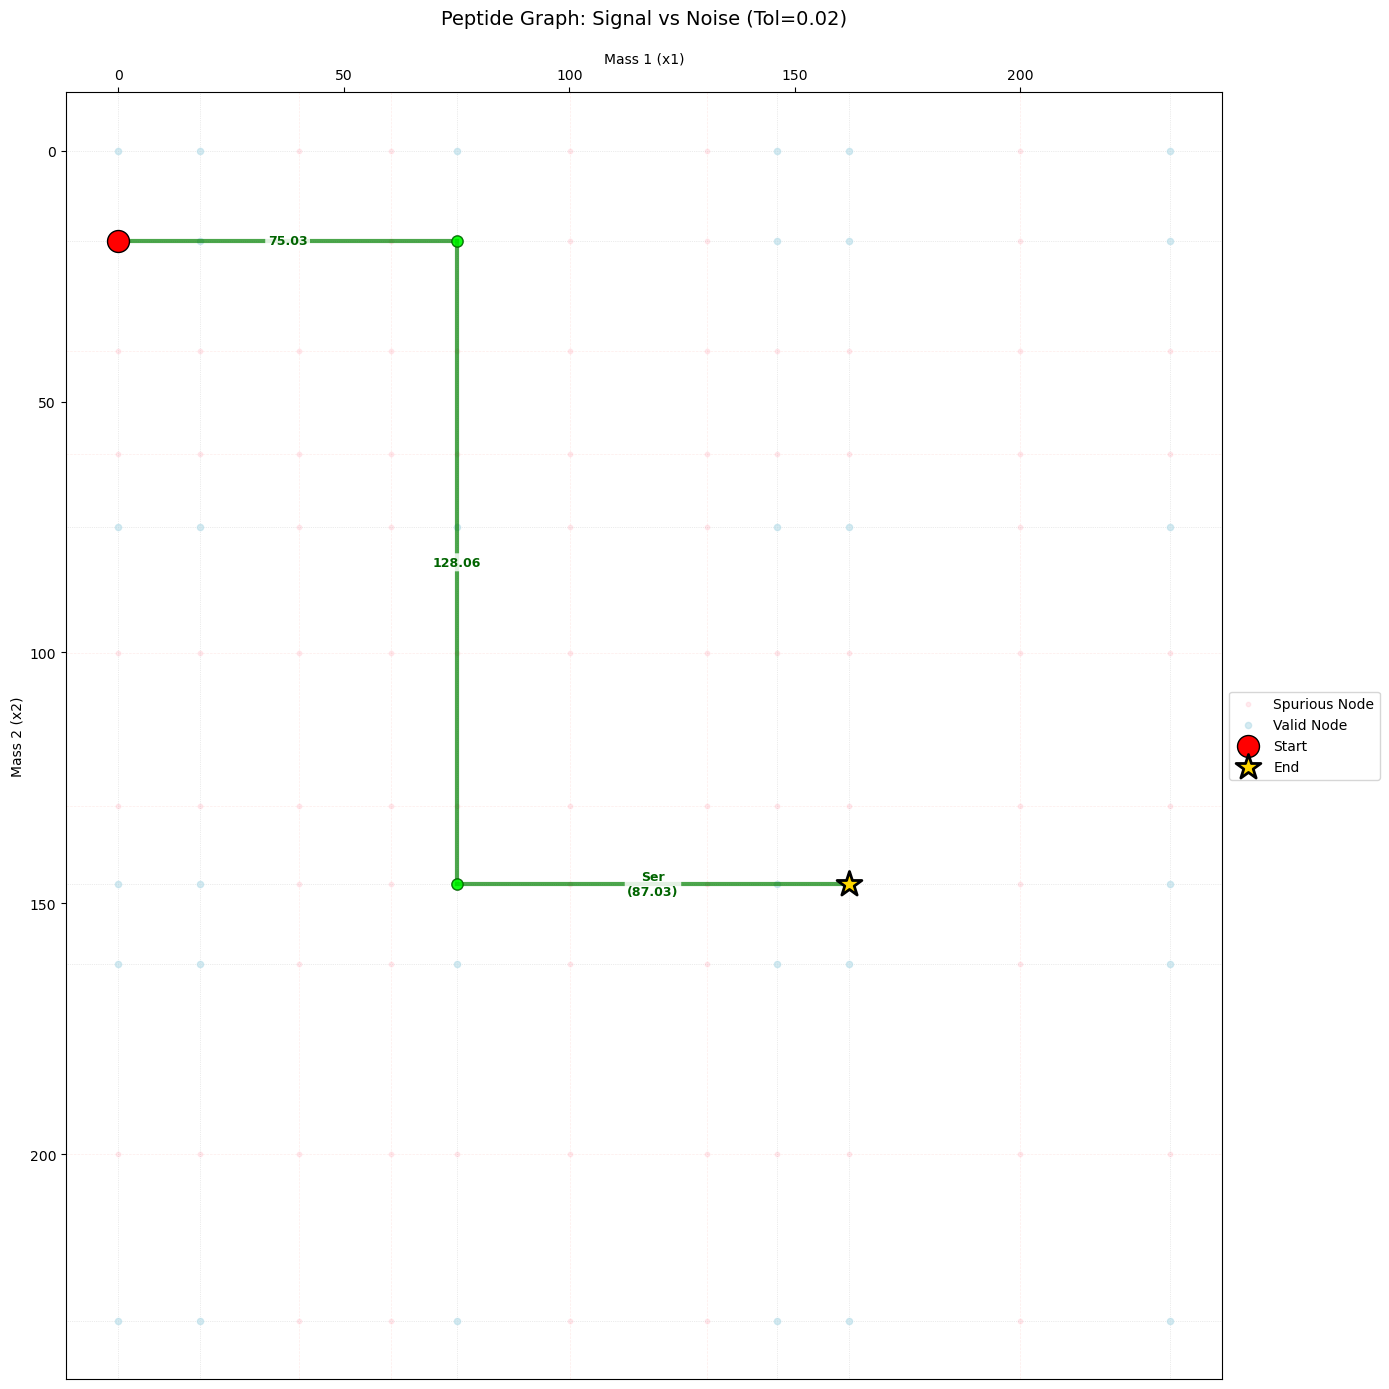

In [74]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_annotated_path_with_noise(spectrum, spurious_masses=None, path_list=None, 
                                        tolerance=0.02, start_point=(0.0, 18.01), aa_map=None):
    """
    Visualizes the grid, distinguishing between 'Correct' and 'Spurious' masses.
    
    Args:
        spectrum: Full list of masses (Correct + Spurious).
        spurious_masses: A list of masses known to be noise.
    """
    # 1. Setup & Classification
    S = sorted(list(set(spectrum)))
    S_arr = np.array(S)
    
    # Create a set for fast lookup of noise
    # We use a small epsilon for float comparison safety just in case
    spurious_set = set(spurious_masses) if spurious_masses else set()
    
    def is_spurious(val):
        # Check if val is in the spurious set (exact match assumed based on input description)
        return val in spurious_set

    fig, ax = plt.subplots(figsize=(14, 14))

    # --- 2. Draw The Grid Lines (Color-Coded) ---
    for mass in S:
        if is_spurious(mass):
            grid_color = 'salmon'   # Red-ish for noise
            grid_alpha = 0.15       # Very faint
            line_style = '--'
        else:
            grid_color = 'gray'     # Gray for signal
            grid_alpha = 0.3
            line_style = ':'
            
        ax.axvline(x=mass, color=grid_color, linestyle=line_style, linewidth=0.5, alpha=grid_alpha)
        ax.axhline(y=mass, color=grid_color, linestyle=line_style, linewidth=0.5, alpha=grid_alpha)

    # --- 3. Draw The Nodes (Intersections) ---
    # We use vectorization to separate "Good Nodes" from "Noisy Nodes"
    # A node (x, y) is noisy if X is spurious OR Y is spurious.
    
    # Create a boolean mask for the spectrum array
    is_noise_mask = np.array([is_spurious(m) for m in S])
    
    # Create 2D meshgrids
    X, Y = np.meshgrid(S, S)
    X_noise, Y_noise = np.meshgrid(is_noise_mask, is_noise_mask)
    
    # Combine masks: Node is noise if X is noise OR Y is noise
    node_is_noise = X_noise | Y_noise
    
    # Plot Spurious Nodes (Background, Pink)
    ax.scatter(X[node_is_noise], Y[node_is_noise], 
               s=10, c='pink', alpha=0.3, zorder=1, label='Spurious Node')
    
    # Plot Correct Nodes (Background, Blue)
    ax.scatter(X[~node_is_noise], Y[~node_is_noise], 
               s=20, c='lightblue', alpha=0.5, zorder=2, label='Valid Node')

    # --- 4. Snapping & Path Logic (Same as before) ---
    
    def get_closest_in_spectrum(val):
        idx = (np.abs(S_arr - val)).argmin()
        closest = S_arr[idx]
        if abs(closest - val) <= tolerance:
            return closest
        return val

    # Helper for annotation text
    def get_anno_text(mass_diff):
        txt = f"{mass_diff:.2f}"
        if aa_map:
            best_match_name = None
            min_diff = tolerance + 1e-9
            for aa_mass, name in aa_map.items():
                diff = abs(mass_diff - aa_mass)
                if diff <= tolerance and diff < min_diff:
                    min_diff = diff
                    best_match_name = name
            if best_match_name:
                txt = f"{best_match_name}\n({mass_diff:.2f})"
        return txt

    # Draw Path
    if path_list and len(path_list) > 1:
        snapped_points = []
        for (px, py) in path_list:
            snapped_points.append((get_closest_in_spectrum(px), get_closest_in_spectrum(py)))
            
        # Start Point
        start_snapped = snapped_points[0]
        ax.scatter([start_snapped[0]], [start_snapped[1]], 
                   color='red', s=250, edgecolors='black', zorder=30, label='Start')

        num_points = len(snapped_points)
        for i in range(num_points - 1):
            p_start = snapped_points[i]
            p_end = snapped_points[i+1]

            # Draw Line
            ax.plot([p_start[0], p_end[0]], [p_start[1], p_end[1]], 
                    color='green', linewidth=3, alpha=0.7, linestyle='-', 
                    marker='o', markersize=8, markerfacecolor='lime', markeredgecolor='darkgreen',
                    zorder=20)

            # Annotation
            dx, dy = p_end[0] - p_start[0], p_end[1] - p_start[1]
            mass_jump = max(abs(dx), abs(dy))
            anno_text = get_anno_text(mass_jump)
            mid_x, mid_y = (p_start[0] + p_end[0]) / 2, (p_start[1] + p_end[1]) / 2

            ax.text(mid_x, mid_y, anno_text, 
                    ha='center', va='center', fontsize=9, color='darkgreen', fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.85),
                    zorder=40)

        # End Point
        end_pt = snapped_points[-1]
        ax.scatter([end_pt[0]], [end_pt[1]], 
                   color='gold', marker='*', s=350, edgecolors='black', linewidth=2,
                   zorder=35, label='End')

    # --- 5. Final Formatting ---
    pad = max(S) * 0.05 if S else 10
    ax.set_xlim(min(S) - pad, max(S) + pad)
    ax.set_ylim(min(S) - pad, max(S) + pad)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    ax.set_title(f"Peptide Graph: Signal vs Noise (Tol={tolerance})", pad=20, fontsize=14)
    ax.set_xlabel("Mass 1 (x1)")
    ax.set_ylabel("Mass 2 (x2)")
    
    # Update legend to include Spurious types
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()

# --- Example Usage ---

# 1. Standard AAs
aa_masses = {57.02: 'Gly', 71.04: 'Ala', 87.03: 'Ser'}

# 2. Construct Data
# Real Signal: Water -> Gly -> Ala -> Ser
real_masses = [0.0, 18.01, 146.07, 162.06] 
current = 18.01
path_steps = [57.02, 71.04, 87.03]
for m in path_steps:
    current += m
    real_masses.append(current)

# Spurious Noise (Random points that don't fit the sequence)
noise_masses = [40.0, 60.5, 100.1, 130.5, 200.0]

# Combine into one spectrum
full_spectrum = real_masses + noise_masses

# 3. Define the Path found
found_path = [
    (0.0, 18.01),
    (75.03, 18.01),   # 18.01 + 57.02
    (75.03, 146.07),  # 75.03 + 71.04
    (162.06, 146.07)  # 75.03 + 87.03 (Horizontal move)
]

# 4. Visualize
# Notice we pass `spurious_masses=noise_masses`
visualize_annotated_path_with_noise(full_spectrum, 
                                    spurious_masses=noise_masses,
                                    path_list=found_path, 
                                    aa_map=aa_masses)

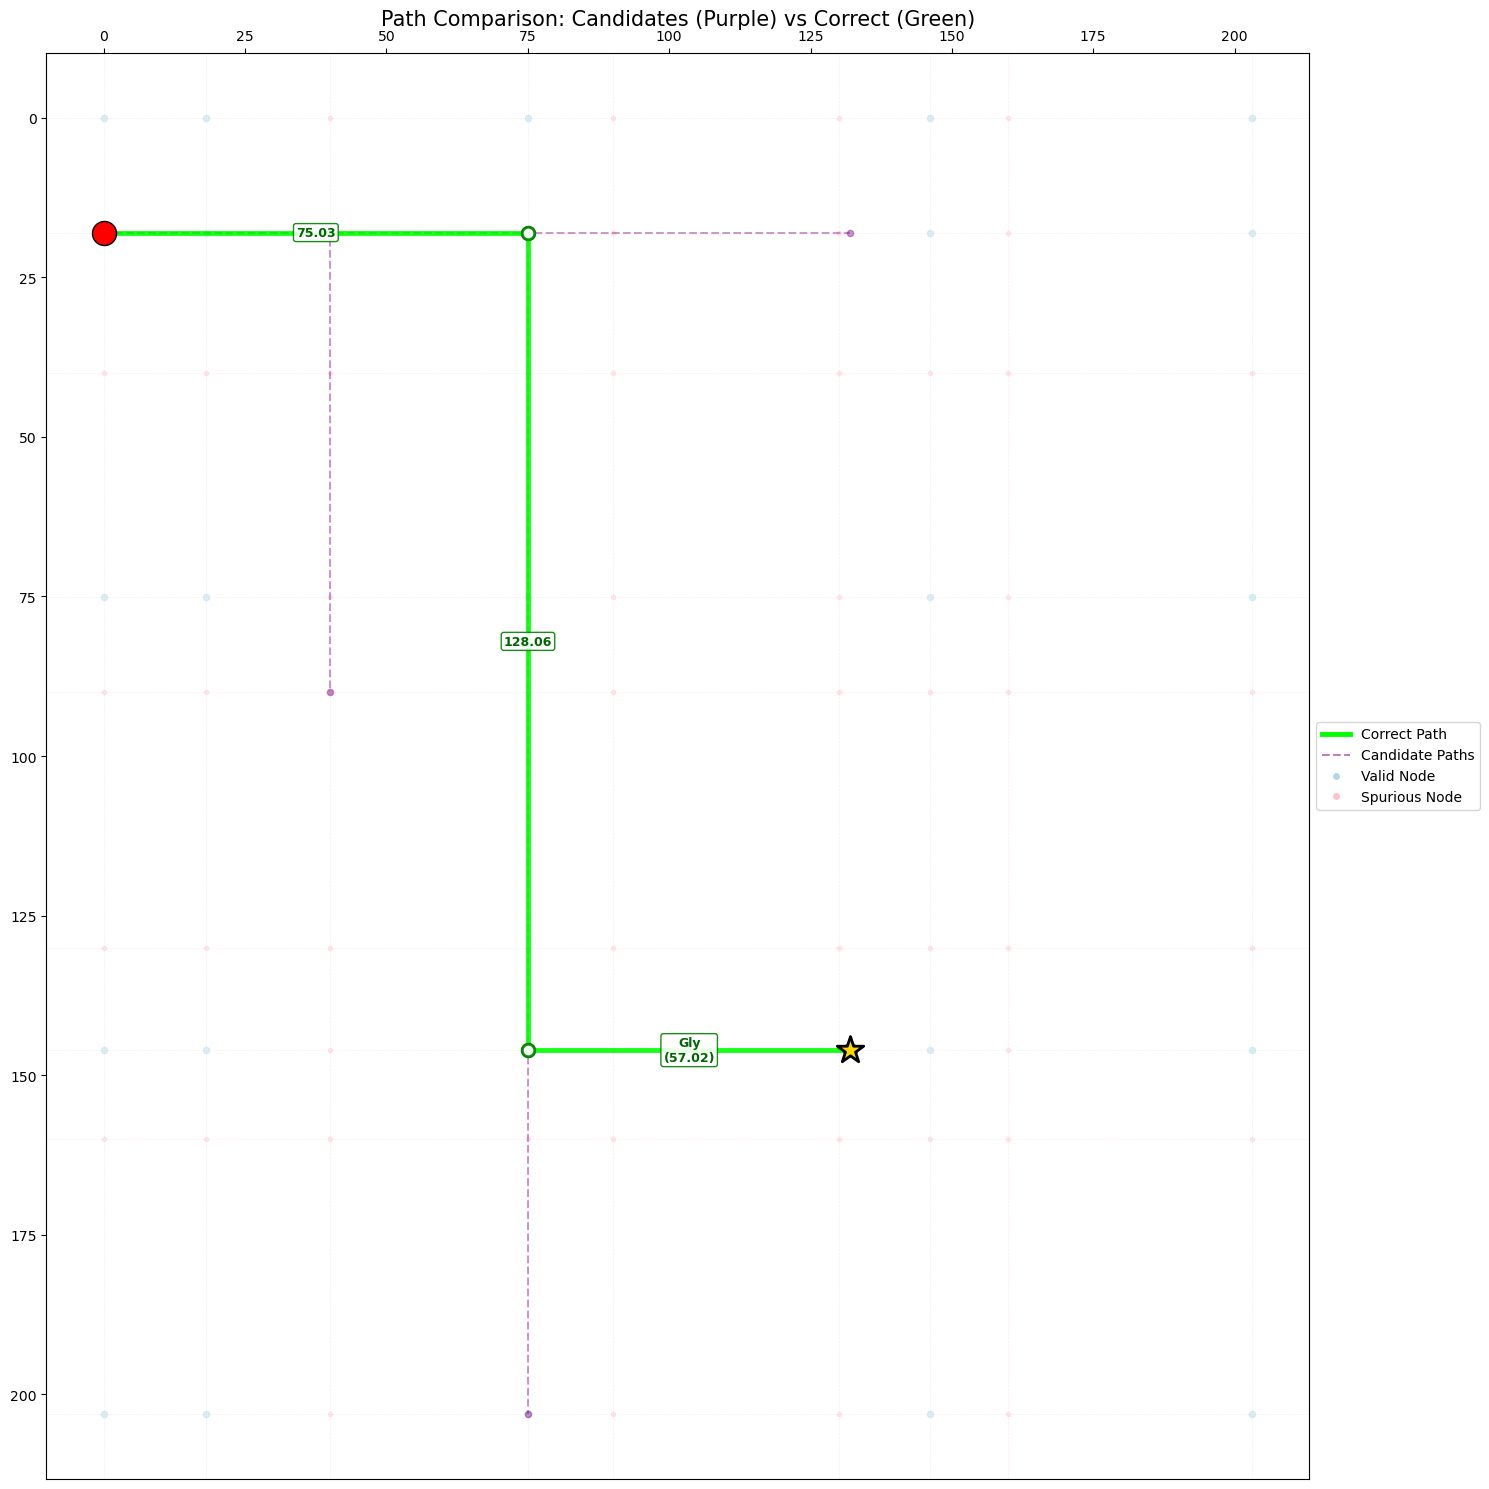

In [75]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_comparison_paths(spectrum, spurious_masses=None, 
                               candidate_paths=None, correct_path=None, 
                               tolerance=0.02, aa_map=None):
    """
    Visualizes multiple candidate paths in the background, 
    highlighting the single correct path in the foreground.
    
    Args:
        candidate_paths: A list of paths (list of lists of tuples).
        correct_path: A single list of tuples (the ground truth).
    """
    # --- 1. Setup Grid (Same as before) ---
    S = sorted(list(set(spectrum)))
    S_arr = np.array(S)
    
    spurious_set = set(spurious_masses) if spurious_masses else set()
    def is_spurious(val): return val in spurious_set

    fig, ax = plt.subplots(figsize=(15, 15))

    # Draw Grid Lines
    for mass in S:
        if is_spurious(mass):
            c, a, ls = 'salmon', 0.15, '--'
        else:
            c, a, ls = 'gray', 0.2, ':'
        ax.axvline(x=mass, color=c, linestyle=ls, linewidth=0.5, alpha=a)
        ax.axhline(y=mass, color=c, linestyle=ls, linewidth=0.5, alpha=a)

    # Draw Nodes
    X, Y = np.meshgrid(S, S)
    is_noise_mask = np.array([is_spurious(m) for m in S])
    X_noise, Y_noise = np.meshgrid(is_noise_mask, is_noise_mask)
    node_is_noise = X_noise | Y_noise
    
    ax.scatter(X[node_is_noise], Y[node_is_noise], s=10, c='pink', alpha=0.3, zorder=1)
    ax.scatter(X[~node_is_noise], Y[~node_is_noise], s=20, c='lightblue', alpha=0.4, zorder=2)

    # --- Snapping Helper ---
    def get_closest_in_spectrum(val):
        idx = (np.abs(S_arr - val)).argmin()
        closest = S_arr[idx]
        return closest if abs(closest - val) <= tolerance else val

    def get_snapped_path(raw_path):
        return [(get_closest_in_spectrum(px), get_closest_in_spectrum(py)) for px, py in raw_path]

    # --- 2. Draw CANDIDATE Paths ("Ghost Paths") ---
    # We draw these first (lower zorder) so they sit behind the correct path
    if candidate_paths:
        for i, path in enumerate(candidate_paths):
            if not path or len(path) < 2: continue
            
            snapped_path = get_snapped_path(path)
            p_xs, p_ys = zip(*snapped_path)
            
            # Draw Ghost Line: Purple, dashed, thin, semi-transparent
            ax.plot(p_xs, p_ys, 
                    color='purple', linewidth=1.5, alpha=0.4, linestyle='--', 
                    zorder=10) # Low zorder
            
            # Small dots for joints, but no text
            ax.scatter(p_xs, p_ys, s=20, color='purple', alpha=0.4, zorder=10)

    # --- 3. Draw CORRECT Path ("Hero Path") ---
    if correct_path and len(correct_path) > 1:
        snapped_correct = get_snapped_path(correct_path)
        
        # Start Point
        start = snapped_correct[0]
        ax.scatter([start[0]], [start[1]], color='red', s=300, edgecolors='black', zorder=50, label='Start')

        # Annotation Helper
        def get_anno_text(mass_diff):
            txt = f"{mass_diff:.2f}"
            if aa_map:
                min_diff = tolerance + 1e-9
                best_name = None
                for aa_mass, name in aa_map.items():
                    diff = abs(mass_diff - aa_mass)
                    if diff <= tolerance and diff < min_diff:
                        min_diff = diff
                        best_name = name
                if best_name: txt = f"{best_name}\n({mass_diff:.2f})"
            return txt

        # Loop through edges
        for i in range(len(snapped_correct) - 1):
            p_start = snapped_correct[i]
            p_end = snapped_correct[i+1]
            
            # Draw Hero Line: Green, thick, solid
            ax.plot([p_start[0], p_end[0]], [p_start[1], p_end[1]], 
                    color='lime', linewidth=3.5, alpha=0.9, linestyle='-', 
                    marker='o', markersize=9, markerfacecolor='white', markeredgecolor='green', markeredgewidth=2,
                    zorder=30) # High zorder

            # Annotate
            dx, dy = p_end[0] - p_start[0], p_end[1] - p_start[1]
            mass_jump = max(abs(dx), abs(dy))
            mid_x, mid_y = (p_start[0] + p_end[0]) / 2, (p_start[1] + p_end[1]) / 2
            
            ax.text(mid_x, mid_y, get_anno_text(mass_jump), 
                    ha='center', va='center', fontsize=9, color='darkgreen', fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='green', alpha=0.9, lw=1),
                    zorder=40)

        # End Point
        end = snapped_correct[-1]
        ax.scatter([end[0]], [end[1]], color='gold', marker='*', s=400, edgecolors='black', linewidth=2, zorder=55, label='Correct End')

    # --- Formatting ---
    pad = max(S) * 0.05 if S else 10
    ax.set_xlim(min(S) - pad, max(S) + pad)
    ax.set_ylim(min(S) - pad, max(S) + pad)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_title("Path Comparison: Candidates (Purple) vs Correct (Green)", pad=20, fontsize=15)
    
    # Custom Legend for clarity
    from matplotlib.lines import Line2D
    custom_lines = [
        Line2D([0], [0], color='lime', lw=3.5, label='Correct Path'),
        Line2D([0], [0], color='purple', lw=1.5, linestyle='--', alpha=0.5, label='Candidate Paths'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', label='Valid Node'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', label='Spurious Node'),
    ]
    ax.legend(handles=custom_lines, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()

# --- Example Usage ---

# 1. Setup Data
aa_masses = {57.02: 'Gly', 71.04: 'Ala'}
real_spectrum = [0.0, 18.01, 75.03, 146.07, 203.09] # Water -> Gly -> Ala -> Gly
noise = [40.0, 90.0, 130.0, 160.0]
full_spec = sorted(real_spectrum + noise)

# 2. Define Correct Path (Gly -> Ala -> Gly)
correct = [
    (0.0, 18.01),
    (75.03, 18.01),   # +Gly (Right)
    (75.03, 146.07),  # +Ala (Down)
    (132.05, 146.07)  # +Gly (Right) - Oops, intentional theoretical mismatch for snapping demo
]

# 3. Define Candidate Paths (Wrong turns the algorithm might have taken)
candidates = [
    # Candidate 1: Took a noise peak early
    [(0.0, 18.01), (40.0, 18.01), (40.0, 90.0)],
    # Candidate 2: Started right, but went wrong direction
    [(0.0, 18.01), (75.03, 18.01), (132.05, 18.01)],
    # Candidate 3: Matches correct path halfway, then diverges
    [(0.0, 18.01), (75.03, 18.01), (75.03, 146.07), (75.03, 203.09)]
]

visualize_comparison_paths(full_spec, spurious_masses=noise, 
                           candidate_paths=candidates, 
                           correct_path=correct, 
                           aa_map=aa_masses)

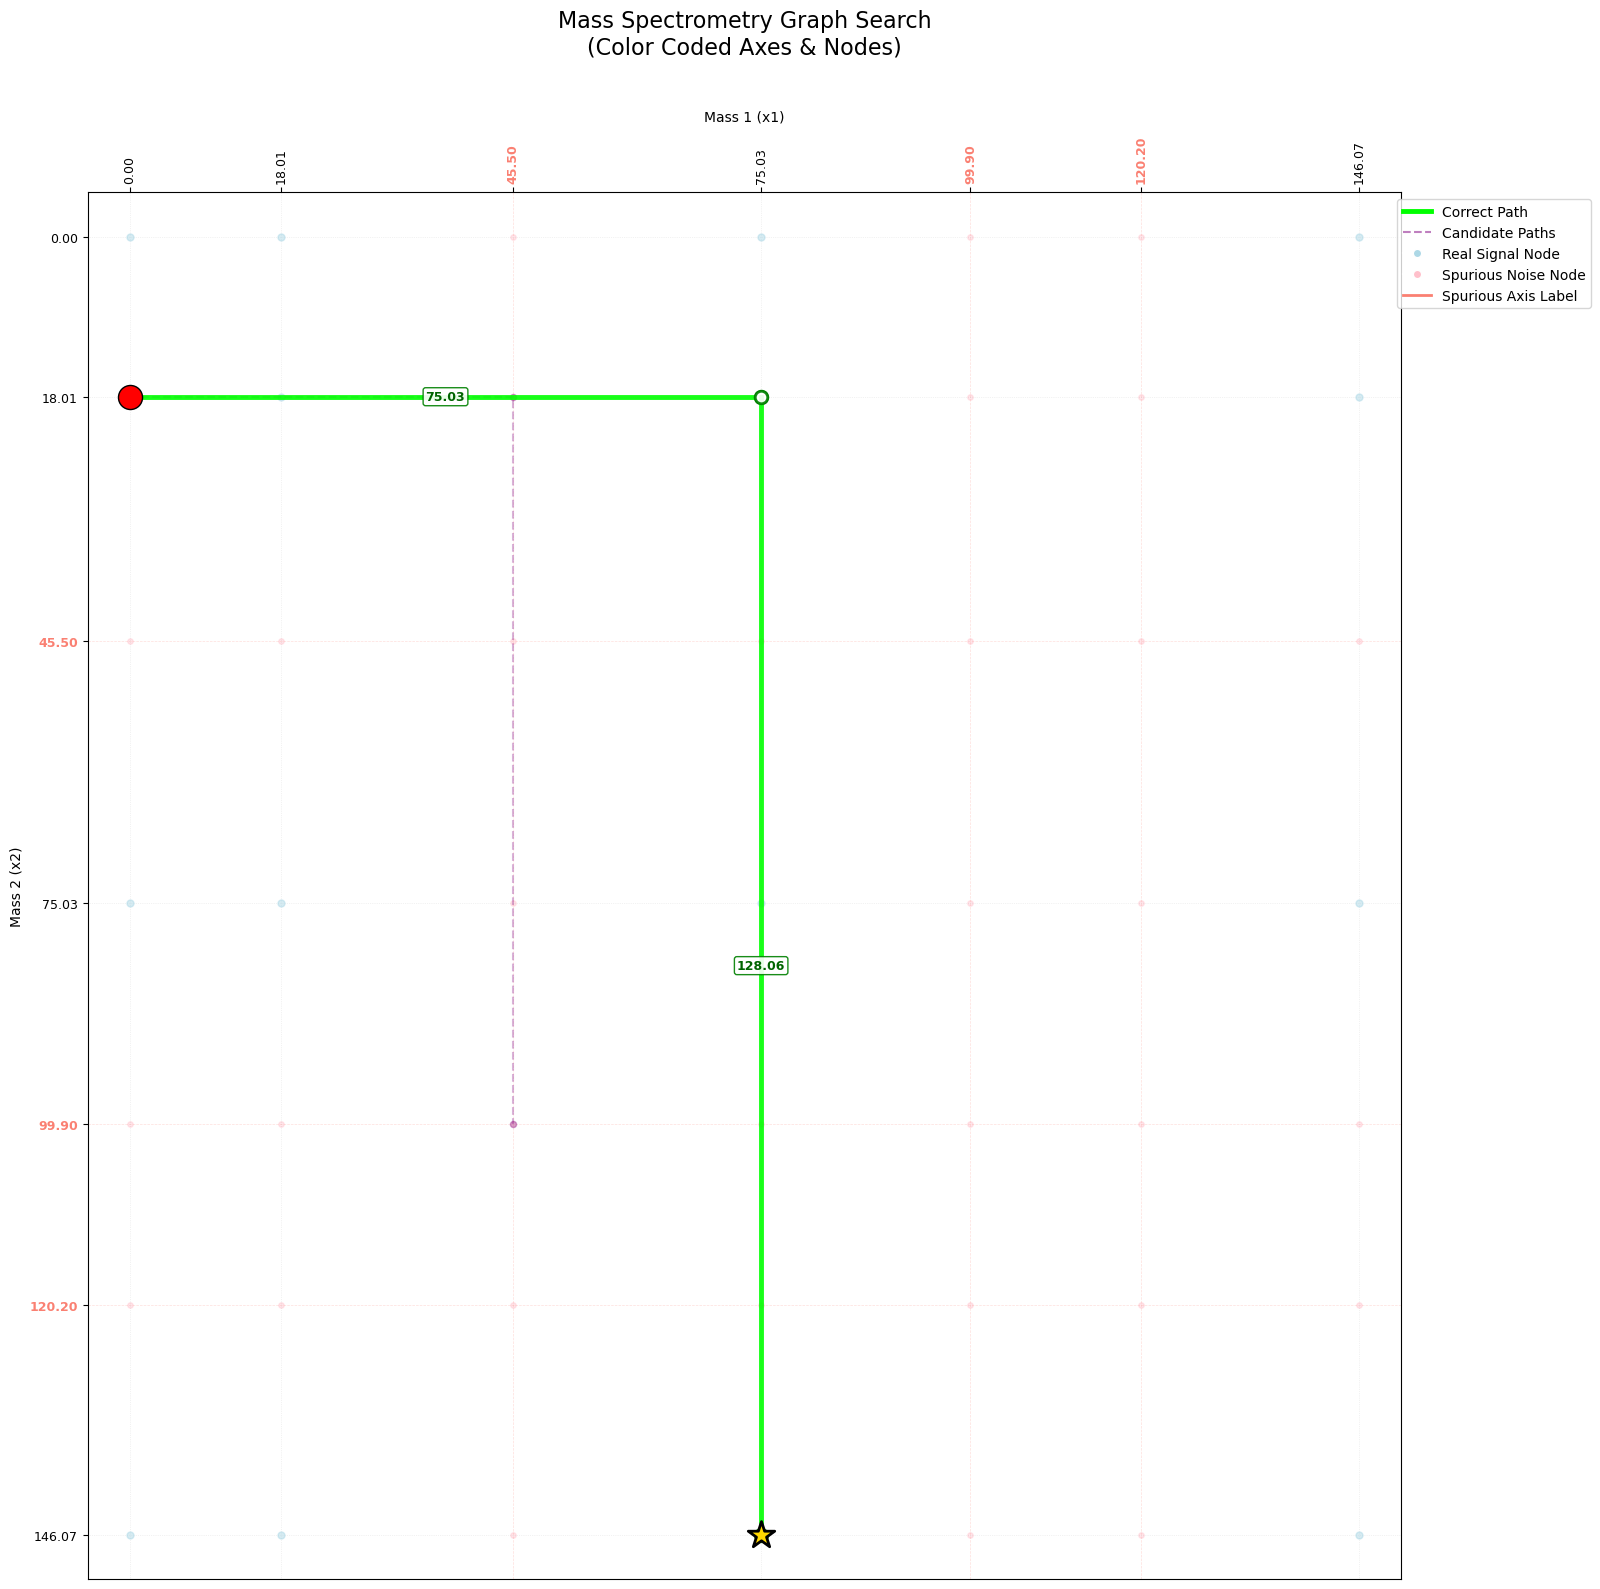

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

def visualize_complete_graph(spectrum, spurious_masses=None, 
                             candidate_paths=None, correct_path=None, 
                             tolerance=0.02, aa_map=None):
    
    # 1. Setup & Classification
    S = sorted(list(set(spectrum)))
    S_arr = np.array(S)
    
    spurious_set = set(spurious_masses) if spurious_masses else set()
    def is_spurious(val): return val in spurious_set

    fig, ax = plt.subplots(figsize=(16, 16))

    # 2. Draw Grid Lines
    for mass in S:
        if is_spurious(mass):
            c, a, ls = 'salmon', 0.25, '--'
        else:
            c, a, ls = 'gray', 0.2, ':'
        ax.axvline(x=mass, color=c, linestyle=ls, linewidth=0.5, alpha=a)
        ax.axhline(y=mass, color=c, linestyle=ls, linewidth=0.5, alpha=a)

    # 3. Draw Nodes
    X, Y = np.meshgrid(S, S)
    is_noise_mask = np.array([is_spurious(m) for m in S])
    X_noise, Y_noise = np.meshgrid(is_noise_mask, is_noise_mask)
    node_is_noise = X_noise | Y_noise
    
    ax.scatter(X[node_is_noise], Y[node_is_noise], s=15, c='pink', alpha=0.4, zorder=1)
    ax.scatter(X[~node_is_noise], Y[~node_is_noise], s=25, c='lightblue', alpha=0.5, zorder=2)

    # 4. Helpers (Snapping & Annotation)
    def get_closest_in_spectrum(val):
        idx = (np.abs(S_arr - val)).argmin()
        closest = S_arr[idx]
        return closest if abs(closest - val) <= tolerance else val

    def get_snapped_path(raw_path):
        return [(get_closest_in_spectrum(px), get_closest_in_spectrum(py)) for px, py in raw_path]

    def get_anno_text(mass_diff):
        txt = f"{mass_diff:.2f}"
        if aa_map:
            min_diff = tolerance + 1e-9
            best_name = None
            for aa_mass, name in aa_map.items():
                diff = abs(mass_diff - aa_mass)
                if diff <= tolerance and diff < min_diff:
                    min_diff = diff
                    best_name = name
            if best_name: txt = f"{best_name}\n({mass_diff:.2f})"
        return txt

    # 5. Draw Candidate Paths
    if candidate_paths:
        for path in candidate_paths:
            if not path or len(path) < 2: continue
            snapped_path = get_snapped_path(path)
            p_xs, p_ys = zip(*snapped_path)
            ax.plot(p_xs, p_ys, color='purple', linewidth=1.5, alpha=0.3, linestyle='--', zorder=10)
            ax.scatter(p_xs, p_ys, s=20, color='purple', alpha=0.3, zorder=10)

    # 6. Draw Correct Path
    if correct_path and len(correct_path) > 1:
        snapped_correct = get_snapped_path(correct_path)
        start = snapped_correct[0]
        ax.scatter([start[0]], [start[1]], color='red', s=300, edgecolors='black', zorder=50)

        for i in range(len(snapped_correct) - 1):
            p_start = snapped_correct[i]
            p_end = snapped_correct[i+1]
            
            ax.plot([p_start[0], p_end[0]], [p_start[1], p_end[1]], 
                    color='lime', linewidth=3.5, alpha=0.9, linestyle='-', 
                    marker='o', markersize=9, markerfacecolor='white', markeredgecolor='green', markeredgewidth=2,
                    zorder=30)

            dx, dy = p_end[0] - p_start[0], p_end[1] - p_start[1]
            mass_jump = max(abs(dx), abs(dy))
            mid_x, mid_y = (p_start[0] + p_end[0]) / 2, (p_start[1] + p_end[1]) / 2
            
            ax.text(mid_x, mid_y, get_anno_text(mass_jump), 
                    ha='center', va='center', fontsize=9, color='darkgreen', fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='green', alpha=0.9, lw=1),
                    zorder=40)
        
        end = snapped_correct[-1]
        ax.scatter([end[0]], [end[1]], color='gold', marker='*', s=400, edgecolors='black', linewidth=2, zorder=55)

    # --- 7. AXIS FORMATTING & COLORING FIX ---
    
    # Set tick locations explicitly
    ax.set_xticks(S)
    ax.set_yticks(S)
    
    # Set text labels
    x_labels_text = [f"{val:.2f}" for val in S]
    y_labels_text = [f"{val:.2f}" for val in S]
    ax.set_xticklabels(x_labels_text, rotation=90, fontsize=9)
    ax.set_yticklabels(y_labels_text, fontsize=9)
    
    # Move X Axis to top
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # --- THE FIX IS HERE ---
    # We iterate over the 'major ticks' directly to access label2 (top label)
    
    # X-Axis Coloring
    x_ticks = ax.xaxis.get_major_ticks()
    for tick, val in zip(x_ticks, S):
        if is_spurious(val):
            # Because tick_top() is on, the visible label is 'label2'
            tick.label2.set_color('salmon')
            tick.label2.set_fontweight('bold')
        else:
            tick.label2.set_color('black')

    # Y-Axis Coloring
    y_ticks = ax.yaxis.get_major_ticks()
    for tick, val in zip(y_ticks, S):
        if is_spurious(val):
            # Y-axis is standard (left), so visible label is 'label1'
            tick.label1.set_color('salmon')
            tick.label1.set_fontweight('bold')
        else:
            tick.label1.set_color('black')

    # Standard Axis Config
    pad = 5
    ax.set_xlim(min(S) - pad, max(S) + pad)
    ax.set_ylim(min(S) - pad, max(S) + pad)
    ax.invert_yaxis()
    ax.set_xlabel("Mass 1 (x1)", labelpad=10)
    ax.set_ylabel("Mass 2 (x2)")

    # Legend
    custom_lines = [
        Line2D([0], [0], color='lime', lw=3.5, label='Correct Path'),
        Line2D([0], [0], color='purple', lw=1.5, linestyle='--', alpha=0.5, label='Candidate Paths'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', label='Real Signal Node'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', label='Spurious Noise Node'),
        Line2D([0], [0], color='salmon', lw=2, label='Spurious Axis Label')
    ]
    ax.legend(handles=custom_lines, loc='upper right', bbox_to_anchor=(1.15, 1))
    
    plt.title("Mass Spectrometry Graph Search\n(Color Coded Axes & Nodes)", pad=40, fontsize=16)
    plt.tight_layout()
    plt.show()

# --- Example Usage ---
aa_masses = {57.02: 'Gly', 71.04: 'Ala'}
real_spectrum = [0.0, 18.01, 75.03, 146.07]
noise = [45.5, 99.9, 120.2]
full_spec = sorted(real_spectrum + noise)

correct = [(0.0, 18.01), (75.03, 18.01), (75.03, 146.07)]
candidates = [[(0.0, 18.01), (45.5, 18.01), (45.5, 99.9)]]

visualize_complete_graph(full_spec, spurious_masses=noise, 
                         candidate_paths=candidates, 
                         correct_path=correct, 
                         aa_map=aa_masses)

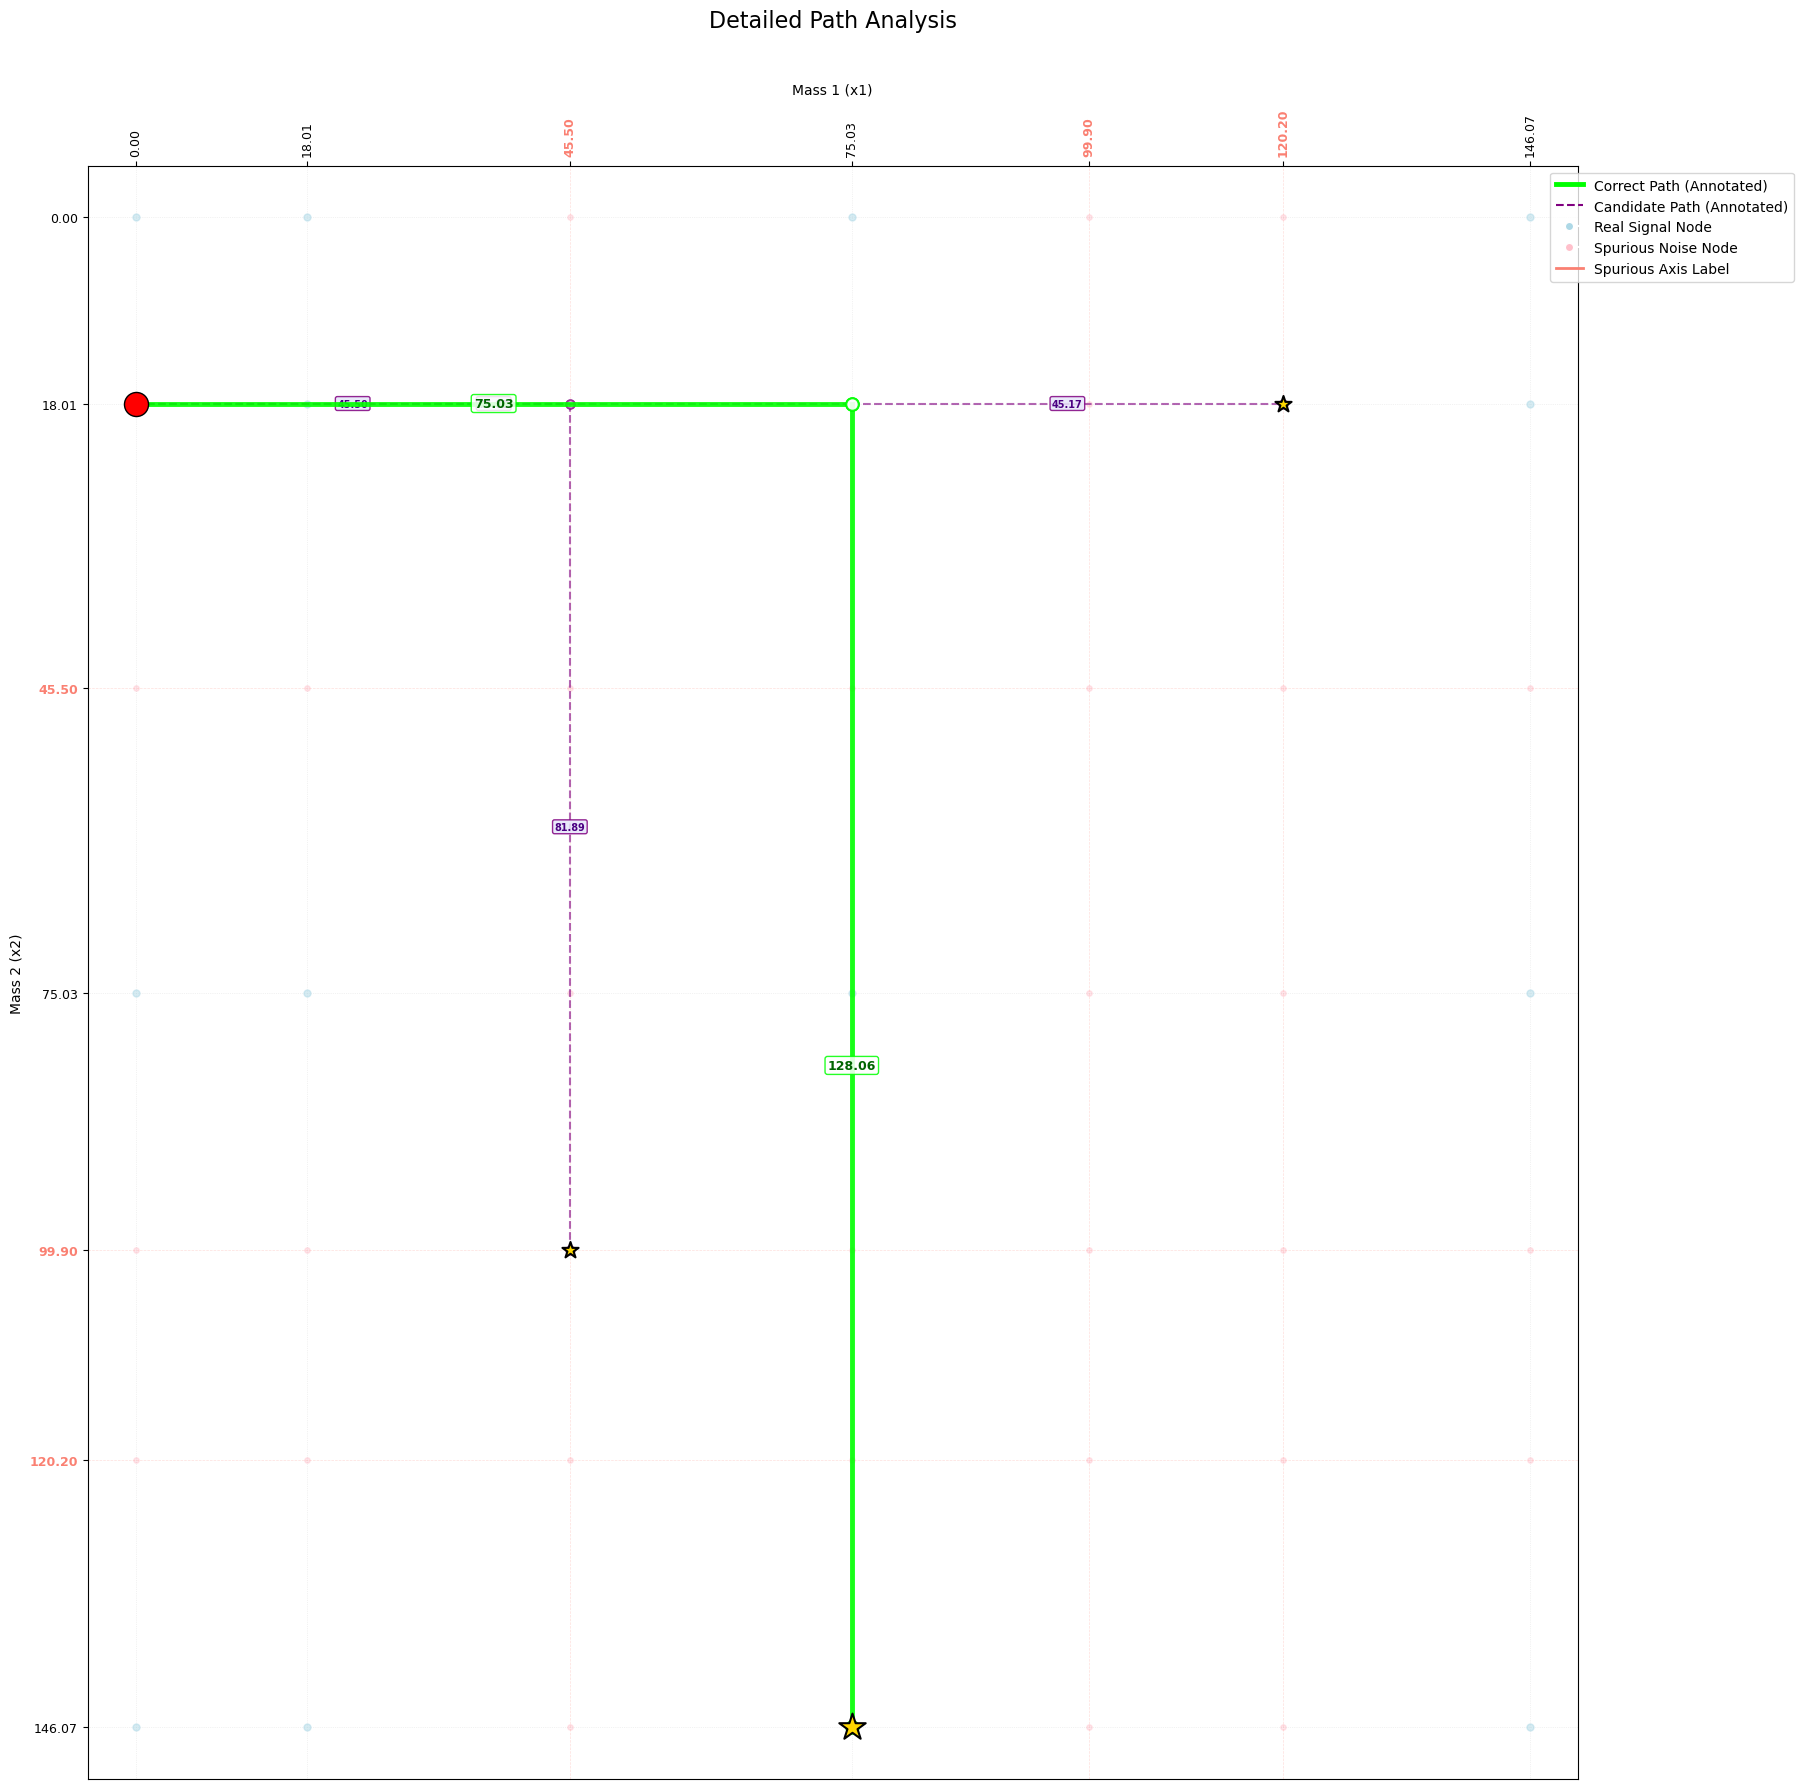

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import os

def visualize_all_paths_annotated(spectrum, spurious_masses=None, 
                                  candidate_paths=None, correct_path=None, 
                                  tolerance=0.02, aa_map=None,
                                  title="Peptide Spectrum Graph",
                                  save_path=None):
    """
    Visualizes the graph where BOTH candidate and correct paths are fully annotated.
    """
    
    # --- 1. Setup & Classification ---
    S = sorted(list(set(spectrum)))
    S_arr = np.array(S)
    
    spurious_set = set(spurious_masses) if spurious_masses else set()
    def is_spurious(val): return val in spurious_set

    # Create Figure
    fig, ax = plt.subplots(figsize=(18, 18)) # Increased size for readability

    # --- 2. Draw Grid Lines ---
    for mass in S:
        if is_spurious(mass):
            c, a, ls = 'salmon', 0.25, '--'
        else:
            c, a, ls = 'gray', 0.2, ':'
        ax.axvline(x=mass, color=c, linestyle=ls, linewidth=0.5, alpha=a)
        ax.axhline(y=mass, color=c, linestyle=ls, linewidth=0.5, alpha=a)

    # --- 3. Draw Nodes ---
    X, Y = np.meshgrid(S, S)
    is_noise_mask = np.array([is_spurious(m) for m in S])
    X_noise, Y_noise = np.meshgrid(is_noise_mask, is_noise_mask)
    node_is_noise = X_noise | Y_noise
    
    ax.scatter(X[node_is_noise], Y[node_is_noise], s=15, c='pink', alpha=0.4, zorder=1)
    ax.scatter(X[~node_is_noise], Y[~node_is_noise], s=25, c='lightblue', alpha=0.5, zorder=2)

    # --- 4. Helpers ---
    def get_closest_in_spectrum(val):
        idx = (np.abs(S_arr - val)).argmin()
        closest = S_arr[idx]
        return closest if abs(closest - val) <= tolerance else val

    def get_snapped_path(raw_path):
        return [(get_closest_in_spectrum(px), get_closest_in_spectrum(py)) for px, py in raw_path]

    def get_anno_text(mass_diff):
        txt = f"{mass_diff:.2f}"
        if aa_map:
            min_diff = tolerance + 1e-9
            best_name = None
            for aa_mass, name in aa_map.items():
                diff = abs(mass_diff - aa_mass)
                if diff <= tolerance and diff < min_diff:
                    min_diff = diff
                    best_name = name
            if best_name: txt = f"{best_name}\n({mass_diff:.2f})"
        return txt

    # --- 5. Unified Drawing Function ---
    def draw_path_logic(path_data, line_color, box_color, text_color, z_order, is_hero=False):
        """
        Draws a path with full annotations.
        """
        if not path_data or len(path_data) < 2: return

        snapped = get_snapped_path(path_data)
        
        # Style settings based on whether it's the "Hero" (Correct) path or a Candidate
        lw = 3.5 if is_hero else 1.5
        ls = '-' if is_hero else '--'
        alpha = 0.9 if is_hero else 0.6
        marker_size = 9 if is_hero else 6
        font_size = 9 if is_hero else 7 # Candidates get smaller text
        
        # Draw Start Node
        start = snapped[0]
        s_size = 300 if is_hero else 100
        ax.scatter([start[0]], [start[1]], color='red', s=s_size, edgecolors='black', zorder=z_order+5)

        # Iterate Segments
        for i in range(len(snapped) - 1):
            p_start = snapped[i]
            p_end = snapped[i+1]
            
            # Draw Line Segment
            ax.plot([p_start[0], p_end[0]], [p_start[1], p_end[1]], 
                    color=line_color, linewidth=lw, alpha=alpha, linestyle=ls, 
                    marker='o', markersize=marker_size, markerfacecolor='white', 
                    markeredgecolor=line_color, markeredgewidth=1.5,
                    zorder=z_order)

            # Draw Annotation
            dx, dy = p_end[0] - p_start[0], p_end[1] - p_start[1]
            mass_jump = max(abs(dx), abs(dy))
            
            # Text Position (Midpoint)
            mid_x, mid_y = (p_start[0] + p_end[0]) / 2, (p_start[1] + p_end[1]) / 2
            
            ax.text(mid_x, mid_y, get_anno_text(mass_jump), 
                    ha='center', va='center', fontsize=font_size, 
                    color=text_color, fontweight='bold',
                    # Box style
                    bbox=dict(boxstyle='round,pad=0.2', fc=box_color, ec=line_color, alpha=0.85, lw=1),
                    zorder=z_order+10) # Text sits on top of line

        # Draw End Node
        end = snapped[-1]
        e_size = 400 if is_hero else 150
        ax.scatter([end[0]], [end[1]], color='gold', marker='*', s=e_size, edgecolors='black', linewidth=1.5, zorder=z_order+15)

    # --- 6. Draw Paths ---
    
    # A. Draw Candidates (Purple, Lower Z-Order)
    if candidate_paths:
        for path in candidate_paths:
            draw_path_logic(path, 
                            line_color='purple', 
                            box_color='lavender', # Light purple background for text
                            text_color='indigo',
                            z_order=20, 
                            is_hero=False)

    # B. Draw Correct Path (Green, Higher Z-Order)
    if correct_path:
        draw_path_logic(correct_path, 
                        line_color='lime', 
                        box_color='white', 
                        text_color='darkgreen',
                        z_order=50, 
                        is_hero=True)

    # --- 7. Axis Formatting & Colors ---
    ax.set_xticks(S)
    ax.set_yticks(S)
    
    ax.set_xticklabels([f"{val:.2f}" for val in S], rotation=90, fontsize=9)
    ax.set_yticklabels([f"{val:.2f}" for val in S], fontsize=9)
    
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # Color X Axis (Top)
    x_ticks = ax.xaxis.get_major_ticks()
    for tick, val in zip(x_ticks, S):
        if is_spurious(val):
            tick.label2.set_color('salmon')
            tick.label2.set_fontweight('bold')
        else:
            tick.label2.set_color('black')

    # Color Y Axis (Left)
    y_ticks = ax.yaxis.get_major_ticks()
    for tick, val in zip(y_ticks, S):
        if is_spurious(val):
            tick.label1.set_color('salmon')
            tick.label1.set_fontweight('bold')
        else:
            tick.label1.set_color('black')

    pad = 5
    ax.set_xlim(min(S) - pad, max(S) + pad)
    ax.set_ylim(min(S) - pad, max(S) + pad)
    ax.invert_yaxis()
    ax.set_xlabel("Mass 1 (x1)", labelpad=10)
    ax.set_ylabel("Mass 2 (x2)")

    # Legend
    custom_lines = [
        Line2D([0], [0], color='lime', lw=3.5, label='Correct Path (Annotated)'),
        Line2D([0], [0], color='purple', lw=1.5, linestyle='--', label='Candidate Path (Annotated)'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', label='Real Signal Node'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', label='Spurious Noise Node'),
        Line2D([0], [0], color='salmon', lw=2, label='Spurious Axis Label')
    ]
    ax.legend(handles=custom_lines, loc='upper right', bbox_to_anchor=(1.15, 1))
    
    ax.set_title(title, pad=40, fontsize=16)
    
    # 8. Save vs Show
    if save_path:
        directory = os.path.dirname(save_path)
        if directory and not os.path.exists(directory):
            os.makedirs(directory)
        plt.tight_layout()
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        plt.close(fig)
        print(f"Graph saved successfully to: {save_path}")
    else:
        plt.tight_layout()
        plt.show()

# --- Example Usage ---

aa_masses = {57.02: 'Gly', 71.04: 'Ala'}
real_spectrum = [0.0, 18.01, 75.03, 146.07]
noise = [45.5, 99.9, 120.2]
full_spec = sorted(real_spectrum + noise)

correct = [(0.0, 18.01), (75.03, 18.01), (75.03, 146.07)]

# Two candidates: One takes a noise path, one goes a different valid direction
candidates = [
    [(0.0, 18.01), (45.5, 18.01), (45.5, 99.9)], # Candidate 1 (Noise)
    [(0.0, 18.01), (75.03, 18.01), (120.2, 18.01)] # Candidate 2 (Wrong turn)
]

visualize_all_paths_annotated(full_spec, spurious_masses=noise, 
                              candidate_paths=candidates, 
                              correct_path=correct, 
                              aa_map=aa_masses,
                              title="Detailed Path Analysis")

In [139]:
from collections import defaultdict

def find_conserved_numbers(list_of_arrays, all_numbers):
    """
    Identifies which numbers have identical connections across all provided arrays.
    
    Args:
    list_of_arrays (list): A list containing lists of tuples. 
                           Example: [[(1,2)], [(2,1)]]
    all_numbers (set): A set containing all numbers to analyze.

    Returns:
    tuple: (set of conserved numbers, set of non-conserved numbers)
    """
    
    # Step 1: Parse each array into an "Adjacency Map"
    # This converts the list of tuples into a format that is easy to compare.
    # Structure: { 1: {2, 5}, 2: {1, 3} } -> Number 1 is connected to 2 and 5.
    parsed_maps = []

    for current_array in list_of_arrays:
        # We use a default dict so we don't get errors if a number has no pairs
        adj_map = defaultdict(set)
        
        for num1, num2 in current_array:
            # Add relationships both ways so order (x,y) vs (y,x) doesn't matter
            adj_map[num1].add(num2)
            adj_map[num2].add(num1)
            
        parsed_maps.append(adj_map)

    # Step 2: Check for conservation
    conserved = set()
    not_conserved = set()

    for num in all_numbers:
        # Get the partners of this number in the first array (reference)
        # If the number isn't in the array, it returns an empty set due to defaultdict
        reference_partners = parsed_maps[0][num]
        
        is_conserved = True
        
        # Compare against all other arrays
        for i in range(1, len(parsed_maps)):
            current_partners = parsed_maps[i][num]
            
            # If the set of partners is not exactly the same, it's not conserved
            if reference_partners != current_partners:
                is_conserved = False
                break
        
        if is_conserved:
            conserved.add(num)
        else:
            not_conserved.add(num)

    return conserved, not_conserved

# --- Example Usage ---

if __name__ == "__main__":
    # Example 1: Simple swapped order
    # 1 is connected to 2 in both (order doesn't matter)
    # 3 is connected to 4 in the first, but 3 is connected to 5 in the second
    array1 = [(1, 2), (3, 4)]
    array2 = [(2, 1), (3, 5)] 
    
    universe_set = {1, 2, 3, 4, 5}
    
    cons, non_cons = find_conserved_numbers([array1, array2], universe_set)
    
    print("--- Test Case 1 ---")
    print(f"Array 1: {array1}")
    print(f"Array 2: {array2}")
    print(f"Conserved: {cons}")       # Should be {1, 2}
    print(f"Not Conserved: {non_cons}") # Should be {3, 4, 5}

    print("\n")

    # Example 2: Complex multiple connections
    # 10 is connected to 11 AND 12 in both lists.
    # 99 is connected to 100 in list A, but 101 in list B.
    list_a = [(0.0, 18.01056),(10, 11), (10, 12), (99, 100),(0,100)]
    list_b = [(0.0, 18.01056),(12, 10), (11, 10), (99, 101)]
    
    universe_set_2 = {10, 11, 12, 99, 100, 101, 0.0, 18.01056}
    
    cons2, non_cons2 = find_conserved_numbers([list_a, list_b], universe_set_2)

    print("--- Test Case 2 ---")
    print(f"Conserved: {cons2}")       # Should be {10, 11, 12}
    print(f"Not Conserved: {non_cons2}") # Should be {99, 100, 101}

--- Test Case 1 ---
Array 1: [(1, 2), (3, 4)]
Array 2: [(2, 1), (3, 5)]
Conserved: {1, 2}
Not Conserved: {3, 4, 5}


--- Test Case 2 ---
Conserved: {18.01056, 10, 11, 12}
Not Conserved: {0.0, 99, 100, 101}


In [136]:
universe_set = set([0.0, 18.01056, 332.184804, 419.216834, 484.254614, 566.285244, 613.297204, 679.369304, 742.339794])

list_a = [(0.0, 18.01056), (0.0, 332.184804), (0.0, 419.216834), (484.254614, 419.216834), (484.254614, 566.285244), (613.297204, 566.285244), (613.297204, 679.369304), (742.339794, 679.369304)]
list_b = [(0.0, 18.01056), (332.184804, 18.01056), (419.216834, 18.01056), (419.216834, 484.254614), (566.285244, 484.254614), (566.285244, 613.297204), (679.369304, 613.297204), (679.369304, 742.339794)]

cons, non_cons = find_conserved_numbers([list_a, list_b], universe_set)




In [137]:
cons

{484.254614, 566.285244, 613.297204, 679.369304, 742.339794}

In [138]:
non_cons

{0.0, 18.01056, 332.184804, 419.216834}

In [98]:
universe_set = ([0.0, 18.01056, 243.100744, 300.122204, 332.184804, 419.15931663218004, 460.17931546636, 557.2572246963999, 566.285218, 566.285244, 613.2971779999999, 613.3376099479101, 679.369278, 679.369304])

list_a = [(0.0, 18.01056), (243.100744, 18.01056), (300.122204, 18.01056), (300.122204, 332.184804), (557.2572246963999, 332.184804), (557.2572246963999, 566.285244), (557.2572246963999, 679.369304)]
list_b = [(0.0, 18.01056), (243.100744, 18.01056), (300.122204, 18.01056), (300.122204, 332.184804), (300.122204, 566.285244), (613.2971779999999, 566.285244), (613.2971779999999, 679.369304)]


cons, non_cons = find_conserved_numbers([list_a, list_b], universe_set)

In [99]:
cons, non_cons

({0.0,
  18.01056,
  243.100744,
  419.15931663218004,
  460.17931546636,
  566.285218,
  613.3376099479101,
  679.369278},
 {300.122204,
  332.184804,
  557.2572246963999,
  566.285244,
  613.2971779999999,
  679.369304})

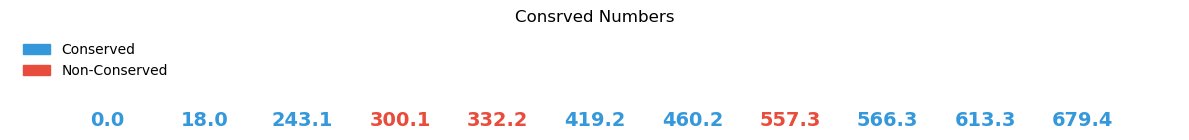

In [123]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def visualize_sets(universal_set, set_one, set_two):
    """
    Visualizes elements of a universal set, coloring them based on membership 
    in set_one or set_two.
    """
    
    # 0. Round all numbers to 1 decimal digit as requested
    # We update the sets themselves so the membership checks match the rounded values
    universal_set = {round(x, 1) for x in universal_set}
    set_one = {round(x, 1) for x in set_one}
    set_two = {round(x, 1) for x in set_two}

    # 1. Sort the universal set to arrange numbers from smallest to largest
    sorted_universe = sorted(list(universal_set))
    
    # 2. Prepare lists for plotting
    x_vals = []
    colors = []
    
    # Define colors
    color_set_1 = '#3498db'  # Blue
    color_set_2 = '#e74c3c'  # Red
    
    #print(f"{'Number':<10} | {'Category'}")
    #print("-" * 25)

    # 3. Iterate through the sorted universe and determine category
    # We use 'enumerate' to get a simple index (0, 1, 2...) for the x-position
    
    for i, number in enumerate(sorted_universe):
        x_vals.append(i)
        
        if number in set_one:
            colors.append(color_set_1)
            #print(f"{number:<10} | Set 1")
        elif number in set_two:
            colors.append(color_set_2)
            #print(f"{number:<10} | Set 2")
        else:
            # Fallback in case of unexpected data, though user noted this won't happen
            colors.append('black') 
            #print(f"{number:<10} | Unknown")
    
    # 4. Create the Graph
    # Adjusted figsize height to 1.5 to make it very compact
    plt.figure(figsize=(12, 1.5))
    
    # Plot the main number line (subtle)
    plt.axhline(y=0, color='gray', linewidth=0.5, zorder=1)
    
    # Add labels (the numbers themselves) directly on the line
    for x, label, color in zip(x_vals, sorted_universe, colors):
        plt.text(x, 0, str(label), 
                 ha='center', va='center', 
                 fontsize=14, fontweight='bold', color=color,
                 bbox=dict(facecolor='white', edgecolor='none', pad=3.0))

    # 5. Add Legend and Labels
    patch1 = mpatches.Patch(color=color_set_1, label='Conserved')
    patch2 = mpatches.Patch(color=color_set_2, label='Non-Conserved')
    
    # Place legend outside or compactly
    plt.legend(handles=[patch1, patch2], loc='upper left', frameon=False, fontsize=10)
    
    plt.title("Consrved Numbers")
    
    # Hide both axes
    plt.axis('off')
    
    # Add some padding to the x-axis limits
    if len(x_vals) > 0:
        plt.xlim(min(x_vals) - 1, max(x_vals) + 1)
        
    plt.tight_layout()
    plt.show()
    

# Run the function
visualize_sets(universe_set, cons, non_cons)

In [128]:
import img2pdf

In [141]:
ord('b')

98

In [148]:
p = 'abcz'
the_dict = [0 for i in range(26)]
for i in p:
    the_dict[ord(i) - ord('a')] += 1
the_dict

[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [149]:
import heapq
my_list = [21, 1, 45, 78, 3, 5]
heapq.heapify(my_list)
print(f"Heapified list: {my_list}")
    

Heapified list: [1, 3, 5, 78, 21, 45]


In [174]:
def ion_simplify(the_input):
    if the_input is None:
        return 'spurious'
    elif the_input[0] == 'y':
        return 'y'
    elif the_input[0] == 'b'and len(the_input) > 1 and the_input[1] != 'i':
        return 'b'
    elif the_input == 'b':
        return 'b'
    else:
        return 'spurious'

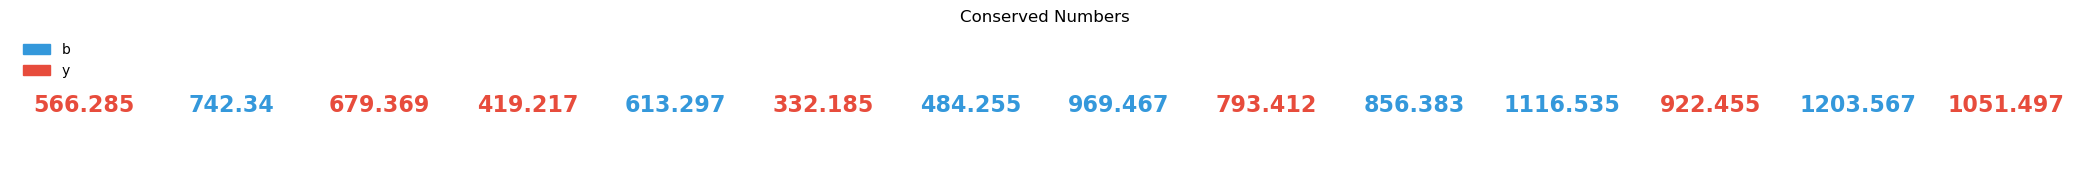

In [175]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def draw_colored_numbers(data_list):
    """
    Draws a horizontal strip of numbers where the text color is determined by the category.
    
    Args:
        data_list (list): A list of tuples, e.g., [(18.0, 'Conserved'), (300.1, 'Non-Conserved')]
    """
    # 1. Setup the figure (Wide and short, since it's a single row)
    fig, ax = plt.subplots(figsize=(len(data_list) * 1.5, 2)) # Adjust width based on number of items
    
    # 2. Turn off the axes (removes the box, ticks, and background grid)
    ax.axis('off')
    
    # 3. Define Colors (Blue, Red, Green for the 3 possibilities)
    colors = ['#3498db', '#e74c3c', '#2ecc71'] 
    
    # Map categories to colors
    categories = [ion_simplify(item[1]) for item in data_list]
    unique_cats = sorted(list(set(categories)))
    cat_to_color = {cat: colors[i % len(colors)] for i, cat in enumerate(unique_cats)}

    # 4. Draw the numbers as Text
    # We iterate through the list and place text at x=0, x=1, x=2, etc.
    for i, (value, cat) in enumerate(data_list):
        ax.text(
            x=i,              # Horizontal position
            y=0.5,            # Vertical center
            s=str(round(value, 3)),     # The text to display
            color=cat_to_color[ion_simplify(cat)], 
            fontsize=16, 
            fontweight='bold',
            ha='center',      # Horizontal alignment
            va='center'       # Vertical alignment
        )

    # 5. Set limits to ensure all text is visible
    ax.set_xlim(-0.5, len(data_list) - 0.5)
    ax.set_ylim(0, 1)

    # 6. Add a Legend
    # We create custom colored patches for the legend
    legend_handles = [
        mpatches.Patch(color=cat_to_color[cat], label=cat) 
        for cat in unique_cats
    ]
    plt.legend(handles=legend_handles, loc='upper left', frameon=False)
    
    plt.title("Conserved Numbers") # Optional title
    plt.tight_layout()
    plt.show()

# --- Example Usage ---
# Using data similar to your provided image
data = [(566.285244, 'y4'), (742.339794, 'b6'), (679.369304, 'y5'), (419.216834, 'y3'), (613.297204, 'b5'), (332.184804, 'y2'), (484.254614, 'b4'), (969.466784, 'b8'), (793.412234, 'y6'), (856.3827239999999, 'b7'), (1116.535194, 'b9'), (922.454824, 'y7'), (1203.5672240000001, 'b10'), (1051.497414, 'y8')]

draw_colored_numbers(data)

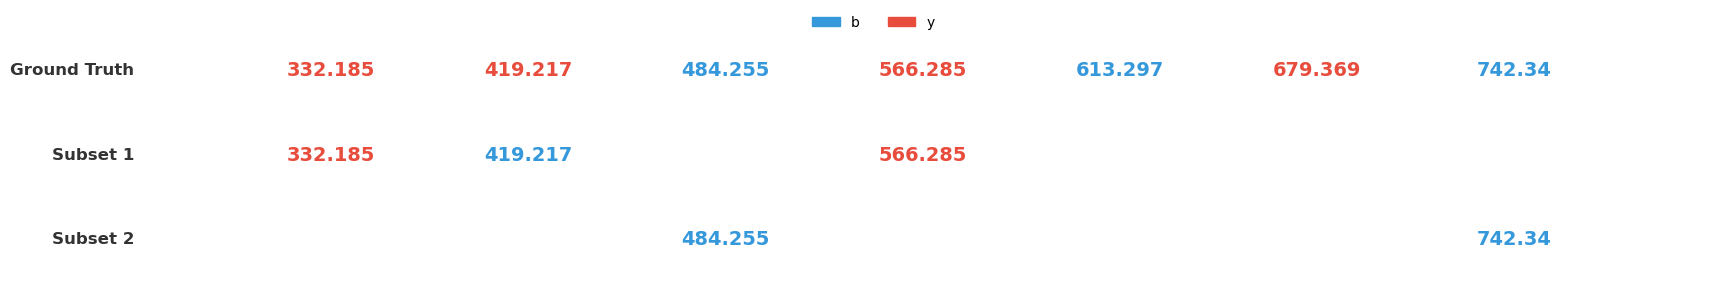

In [176]:
def draw_aligned_comparison(ground_truth, other_lists):
    """
    Draws a comparison of mass spec lists.
    - Ground Truth is on top.
    - Subsets are below.
    - Numbers align vertically based on the Ground Truth value.
    - Vertical lines removed.
    - Increased spacing between numbers.
    """
    
    # 1. PRE-PROCESSING
    # Sort Ground Truth by value so the graph flows naturally from low to high
    ground_truth.sort(key=lambda x: x[0])
    
    # Create a map to ensure vertical alignment: { rounded_value : x_index }
    # We use round(val, 3) to avoid floating point mismatch issues
    val_to_x_map = {round(item[0], 3): i for i, item in enumerate(ground_truth)}
    
    # Combine all lists to find all unique categories for the legend
    all_items = ground_truth + [item for sublist in other_lists for item in sublist]
    all_categories = sorted(list(set([ion_simplify(x[1]) for x in all_items])))
    
    # 2. SETUP FIGURE
    # Height = (Number of subsets + 1 for GT) * spacing
    # CHANGE: Increased width multiplier from 1.2 to 2.5 to separate numbers
    total_rows = 1 + len(other_lists)
    fig, ax = plt.subplots(figsize=(len(ground_truth) * 2.5, total_rows * 1.0))
    
    ax.axis('off')
    
    # 3. DEFINE COLORS
    palette = ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f', '#9b59b6', '#e67e22', '#1abc9c', '#34495e']
    cat_to_color = {cat: palette[i % len(palette)] for i, cat in enumerate(all_categories)}

    # 4. DRAWING FUNCTION
    def plot_row(data, row_index, label):
        """Helper to plot a single row of numbers"""
        y_pos = row_index
        
        # Add a label for the row (e.g., "Ground Truth", "List 1")
        ax.text(-1.0, y_pos, label, fontsize=12, fontweight='bold', ha='right', va='center', color='#333')
        
        for value, cat in data:
            val_key = round(value, 3)
            
            # Only plot if this value exists in our Ground Truth Map
            if val_key in val_to_x_map:
                x_pos = val_to_x_map[val_key]
                
                # Draw the number
                ax.text(
                    x=x_pos,
                    y=y_pos,
                    s=str(val_key),
                    color=cat_to_color[ion_simplify(cat)],
                    fontsize=14,
                    fontweight='bold',
                    ha='center',
                    va='center'
                )

    # 5. EXECUTE PLOTTING
    
    # Plot Ground Truth (Top Row)
    plot_row(ground_truth, total_rows - 1, "Ground Truth")
    
    # Plot Subsets (Iterate downwards)
    for i, subset in enumerate(other_lists):
        row_y = (total_rows - 2) - i
        plot_row(subset, row_y, f"Subset {i+1}")

    # 6. VISUAL POLISH
    # CHANGE: Removed ax.axvline loop (Vertical lines are gone)

    # Set limits
    ax.set_xlim(-1.5, len(ground_truth)) 
    ax.set_ylim(-0.5, total_rows - 0.5)

    # Legend
    legend_handles = [mpatches.Patch(color=cat_to_color[cat], label=cat) for cat in all_categories]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(all_categories), frameon=False)
    
    plt.tight_layout()
    plt.show()

# --- Example Usage ---

ground_truth_data = [
    (566.285244, 'y4'), (742.339794, 'b6'), (679.369304, 'y5'), 
    (419.216834, 'y3'), (613.297204, 'b5'), (332.184804, 'y2'), 
    (484.254614, 'b4')
]

subset_1 = [
    (566.285244, 'y4'), 
    (419.216834, 'b3_mod'),
    (332.184804, 'y2')
]

subset_2 = [
    (742.339794, 'b6'), 
    (484.254614, 'b4')
]

draw_aligned_comparison(ground_truth_data, [subset_1, subset_2])

In [177]:
def mass_b_y_indentification(input_list):
    
    result = []
    b_ion_mass = set([input_list[0][0]])
    y_ion_mass = set([input_list[0][1]])
    for i in input_list:
        b_ion_mass.add(i[0])
        y_ion_mass.add(i[1])
    b_ion_mass.remove(input_list[0][0])
    y_ion_mass.remove(input_list[0][1])
    b_ion_mass = list(b_ion_mass)
    y_ion_mass = list(y_ion_mass)
    
    for i in b_ion_mass:
        result.append((i, 'b'))
    for j in y_ion_mass:
        result.append((j, 'y'))
    return result
    
    

In [178]:
a = [(0.0, 18.01056), (0.0, 332.184804), (0.0, 419.216834), (484.254614, 419.216834), (484.254614, 566.285244), (613.297204, 566.285244), (613.297204, 679.369304), (742.339794, 679.369304)]
mass_b_y_indentification(a)

[(484.254614, 'b'),
 (613.297204, 'b'),
 (742.339794, 'b'),
 (419.216834, 'y'),
 (679.369304, 'y'),
 (332.184804, 'y'),
 (566.285244, 'y')]

In [179]:
graound_truth = [(566.285244, 'y4'), (742.339794, 'b6'), (679.369304, 'y5'), (419.216834, 'y3'), (613.297204, 'b5'), (332.184804, 'y2'), (484.254614, 'b4'), (969.466784, 'b8'), (793.412234, 'y6'), (856.3827239999999, 'b7'), (1116.535194, 'b9'), (922.454824, 'y7'), (1203.5672240000001, 'b10'), (1051.497414, 'y8')]
candidates = [[(0.0, 18.01056), (0.0, 332.184804), (0.0, 419.216834), (484.254614, 419.216834), (484.254614, 566.285244), (613.297204, 566.285244), (613.297204, 679.369304), (742.339794, 679.369304)], [(0.0, 18.01056), (332.184804, 18.01056), (419.216834, 18.01056), (419.216834, 484.254614), (566.285244, 484.254614), (566.285244, 613.297204), (679.369304, 613.297204), (679.369304, 742.339794)]]
candidates = [mass_b_y_indentification(i) for i in candidates]
candidates


[[(484.254614, 'b'),
  (613.297204, 'b'),
  (742.339794, 'b'),
  (419.216834, 'y'),
  (679.369304, 'y'),
  (332.184804, 'y'),
  (566.285244, 'y')],
 [(419.216834, 'b'),
  (679.369304, 'b'),
  (332.184804, 'b'),
  (566.285244, 'b'),
  (484.254614, 'y'),
  (613.297204, 'y'),
  (742.339794, 'y')]]

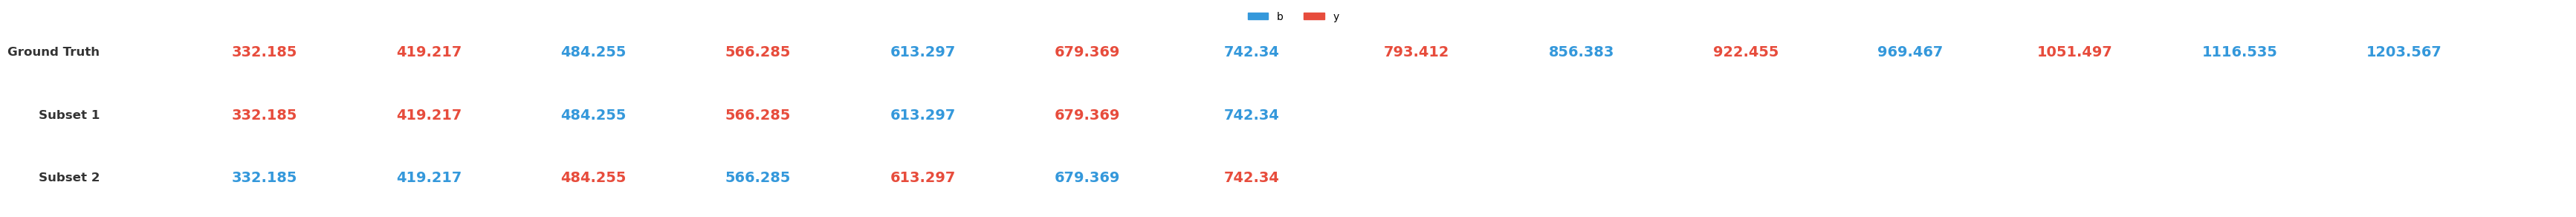

In [180]:
draw_aligned_comparison(graound_truth, candidates)

In [181]:
def draw_aligned_comparison(ground_truth, other_lists):
    """
    Draws a comparison of mass spec lists with fixed colors for b, y, and spurious.
    """
    
    # 1. DEFINE FIXED COLORS
    # Map the simplified categories to specific colors
    FIXED_COLORS = {
        'b': '#3498db',        # Blue
        'y': '#e74c3c',        # Red
        'spurious': '#95a5a6', # Gray
        'unknown': '#000000'   # Black (fallback)
    }

    # 2. PRE-PROCESSING
    # Sort Ground Truth by value
    ground_truth.sort(key=lambda x: x[0])
    
    # Create a map to ensure vertical alignment: { rounded_value : x_index }
    val_to_x_map = {round(item[0], 3): i for i, item in enumerate(ground_truth)}
    
    # 3. SETUP FIGURE
    total_rows = 1 + len(other_lists)
    fig, ax = plt.subplots(figsize=(len(ground_truth) * 2.5, total_rows * 1.0))
    ax.axis('off')
    
    # 4. DRAWING FUNCTION
    def plot_row(data, row_index, label):
        """Helper to plot a single row of numbers"""
        y_pos = row_index
        
        # Row Label
        ax.text(-1.0, y_pos, label, fontsize=12, fontweight='bold', ha='right', va='center', color='#333')
        
        for value, raw_cat in data:
            val_key = round(value, 3)
            
            # Only plot if this value exists in our Ground Truth Map
            if val_key in val_to_x_map:
                x_pos = val_to_x_map[val_key]
                
                # Determine color based on simplified category
                simple_cat = ion_simplify(raw_cat)
                text_color = FIXED_COLORS.get(simple_cat, FIXED_COLORS['unknown'])
                
                # Draw the number
                ax.text(
                    x=x_pos,
                    y=y_pos,
                    s=str(val_key),
                    color=text_color,
                    fontsize=14,
                    fontweight='bold',
                    ha='center',
                    va='center'
                )

    # 5. EXECUTE PLOTTING
    # Plot Ground Truth (Top Row)
    plot_row(ground_truth, total_rows - 1, "Ground Truth")
    
    # Plot Subsets (Iterate downwards)
    for i, subset in enumerate(other_lists):
        row_y = (total_rows - 2) - i
        plot_row(subset, row_y, f"Subset {i+1}")

    # 6. VISUAL POLISH
    ax.set_xlim(-1.5, len(ground_truth)) 
    ax.set_ylim(-0.5, total_rows - 0.5)

    # Manual Legend for the 3 fixed categories
    legend_handles = [
        mpatches.Patch(color=FIXED_COLORS['b'], label='b-ion'),
        mpatches.Patch(color=FIXED_COLORS['y'], label='y-ion'),
        mpatches.Patch(color=FIXED_COLORS['spurious'], label='Spurious')
    ]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False)
    
    plt.tight_layout()
    plt.show()

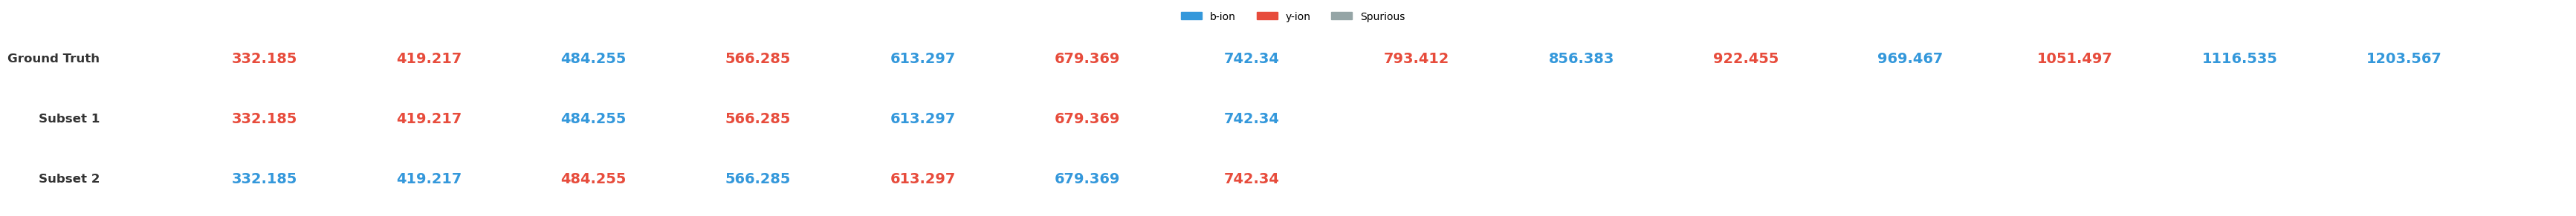

In [182]:
draw_aligned_comparison(graound_truth, candidates)

In [183]:
def mass_b_y_indentification_with_middle(input_list):
    result = []
    b_ion_mass = set([input_list[0][0]])
    y_ion_mass = set([input_list[0][1]])
    for i in input_list:
        b_ion_mass.add(i[0])
        y_ion_mass.add(i[1])
    b_ion_mass.remove(input_list[0][0])
    y_ion_mass.remove(input_list[0][1])
    b_ion_mass = list(b_ion_mass)
    y_ion_mass = list(y_ion_mass)
    
    for i in b_ion_mass:
        result.append((i, 'b'))
    for j in y_ion_mass:
        result.append((j, 'y'))
    
    return result, [input_list[-1][0], input_list[-1][1]]

In [184]:
mass_b_y_indentification_with_middle(a)

([(484.254614, 'b'),
  (613.297204, 'b'),
  (742.339794, 'b'),
  (419.216834, 'y'),
  (679.369304, 'y'),
  (332.184804, 'y'),
  (566.285244, 'y')],
 [742.339794, 679.369304])

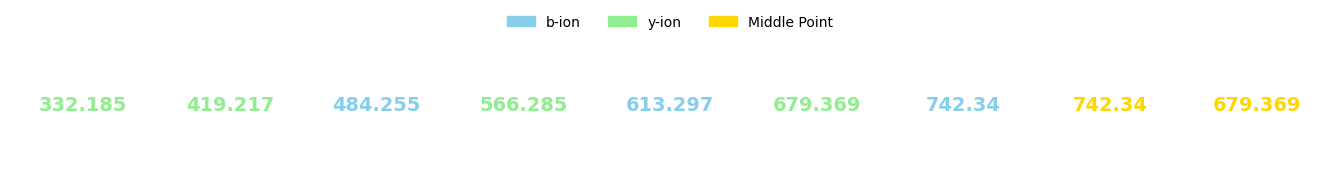

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def draw_sequence_with_middle_points(data_tuple):
    """
    Draws a sequence of numbers where:
    1. The main list (b/y ions) is sorted and displayed first.
    2. The 'middle points' are appended to the end of the visualization.
    3. Colors are assigned strictly to 'b', 'y', and 'middle point'.
    
    Args:
        data_tuple (tuple): (main_list, middle_points_list)
            e.g. ([(484.2, 'b'), ...], [742.3, 679.3])
    """
    # 1. Unpack the data
    main_data, middle_points_values = data_tuple
    
    # 2. Prepare the Data
    # Sort the main data by value (standard for mass spec visualization)
    main_data_sorted = sorted(main_data, key=lambda x: x[0])
    
    # Create tuples for the middle points with the specific category
    middle_data = [(val, 'middle point') for val in middle_points_values]
    
    # Combine: Main data first, then Middle points appended at the end
    full_sequence = main_data_sorted + middle_data
    
    # 3. Define Fixed Colors
    # b = Blue, y = Red, middle point = Green (or Purple/Orange as preferred)
    COLORS = {
        'b': '#87CEEB',         # Blue
        'y': '#90EE90',         # Red
        'middle point': '#FFD700' # Green (Distinct)
    }

    # 4. Setup Figure
    # Width depends on total number of items
    fig, ax = plt.subplots(figsize=(len(full_sequence) * 1.5, 2))
    ax.axis('off')
    
    # 5. Draw the Numbers
    for i, (value, category) in enumerate(full_sequence):
        # Round for display
        display_text = str(round(value, 3))
        
        # Determine Color
        # We simplify category to handle potential whitespace or casing, though inputs seem clean
        cat_key = category.strip() 
        text_color = COLORS.get(cat_key, '#000000') # Default to black if unknown
        
        # Plot Text
        ax.text(
            x=i, 
            y=0.5, 
            s=display_text, 
            color=text_color, 
            fontsize=14, 
            fontweight='bold', 
            ha='center', 
            va='center'
        )

    # 6. Visual Polish
    ax.set_xlim(-0.5, len(full_sequence) - 0.5)
    ax.set_ylim(0, 1)
    
    # Add Legend
    legend_handles = [
        mpatches.Patch(color=COLORS['b'], label='b-ion'),
        mpatches.Patch(color=COLORS['y'], label='y-ion'),
        mpatches.Patch(color=COLORS['middle point'], label='Middle Point')
    ]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, frameon=False)
    
    plt.tight_layout()
    plt.show()


In [193]:
def get_ion_segment(peptide, ion_list, target_ion):
    """
    Returns the amino acid sequence segment between the previous ion 
    in the list and the target ion.
    """
    # 1. Extract the numeric positions from the ion strings (e.g., 'b2' -> 2)
    # We use a set to remove duplicates, then sort them to find order
    # Format: dictionary mapping {position: 'ion_name'}
    ion_map = {int(ion[1:]): ion for ion in ion_list}
    
    # Get the sorted list of positions (e.g., [2, 4])
    sorted_positions = sorted(ion_map.keys())
    
    # 2. Parse the target position
    target_pos = int(target_ion[1:])
    
    # Check if target is actually in the list provided
    if target_pos not in sorted_positions:
        return f"Error: {target_ion} is not in the ion list."

    # 3. Find the index of the target in our sorted list
    current_index_in_list = sorted_positions.index(target_pos)

    # 4. Determine Start and End indices for slicing the peptide
    # The end of the slice is always the target ion's position
    end_slice = target_pos
    
    if current_index_in_list == 0:
        # If it's the first ion (e.g., b2), start from the beginning (0)
        start_slice = 0
    else:
        # If there is a previous ion (e.g., b2 comes before b4), 
        # start where the previous ion ended.
        previous_pos = sorted_positions[current_index_in_list - 1]
        start_slice = previous_pos

    # 5. Extract the segment from the peptide list
    # Python slicing is [start:end], where start is inclusive and end is exclusive
    segment_list = peptide[start_slice : end_slice]
    
    return "".join(segment_list)

# --- Test Case ---
peptide_seq = ['L', 'I', 'G', 'M', 'N', 'E']
my_ions = ['b2', 'b4', 'b5'] # Duplicate b4 included to show it handles it

# Test 1: Ask for b2 (Nothing before it)
result1 = get_ion_segment(peptide_seq, my_ions, 'b2')
print(f"Input: b2 -> Output: {result1}") 

# Test 2: Ask for b4 (b2 is before it)
result2 = get_ion_segment(peptide_seq, my_ions, 'b4')
print(f"Input: b4 -> Output: {result2}")

Input: b2 -> Output: LI
Input: b4 -> Output: GM


In [198]:
get_ion_segment(pep.AA_array, my_ions, 'b5')

TypeError: sequence item 0: expected str instance, AA found

In [199]:
aa_array = [str(i) for i in pep.AA_array]
get_ion_segment(aa_array, my_ions, 'b5')

'G'

In [10]:
import peptide
peptide.Pep('[YLEFISDAIIHVLHSK+3H]3+').pep_mass / 3

629.0120799999999

In [244]:
import pandas as pd
data = pd.read_excel('data/Covariance Scoring Tables 10000 Scans.xlsx', sheet_name='YLEFISDAIIHVLHSK-mz629-3_cov')

In [245]:
data = data[['m/z fragment 1', 'm/z fragment 2', 'Covariance', 'Partial Cov.', 'Score', 'Ranking']]

In [246]:
data = data.sort_values('Ranking', ascending=True)
data = data[data['Ranking'] != -1]


In [247]:
# create a canonical (order-independent) pair
data["pair_key"] = data.apply(
    lambda row: tuple(sorted([row["m/z fragment 1"], row["m/z fragment 2"]])),
    axis=1
)

# drop duplicated pairs, keep first occurrence
data = data.drop_duplicates(subset="pair_key").drop(columns="pair_key")

In [253]:
import interpreter_modify

In [254]:
data.head()
data.columns = ['m/z A', 'm/z B', 'Covariance', 'Partial Cov.', 'Score', 'Ranking']
data['each_original_data'] = data['m/z A'].astype('str')+ ' / ' + data['m/z B'].astype('str')
pep_seq = 'YLEFISDAIIHVLHSK'
charge = 3
data.set_index('Ranking', inplace=True)


In [255]:

data = data.head(50)

In [256]:
df_result = interpreter_modify.report_data(data, pep_seq, charge, tolerance_input=0.4, merge_original=True)
df_result.head(30)

,each_original_data,m/z A,m/z B,Interpretation A,Interpretation B,CorrelationScore,NormalisedScore,MassDeviation
0,234.145596 / 826.449145,234.145596,826.449145,y2(1+),b14(2+),1.0,1.0,0.021
1,234.145596 / 826.950621,234.145596,826.950621,,,1.0,1.0,
2,234.145596 / 1376.74755,234.145596,1376.747550,,,1.0,1.0,
3,371.204938 / 1109.641372,371.204938,1109.641372,y3(1+),bi(4-13)(1+),1.0,1.0,0.031
4,371.204938 / 1238.685321,371.204938,1238.685321,y3(1+),a11-2(H2O)(1+),1.0,1.0,0.026
5,371.204938 / 1238.685321,371.204938,1238.685321,y3(1+),bi(3-13)(1+),1.0,1.0,0.029
6,371.204938 / 1238.685321,371.204938,1238.685321,bi(12-15)-2(H2O)-(HCOH)(1+),a11-2(H2O)(1+),1.0,1.0,0.035
7,371.204938 / 1238.685321,371.204938,1238.685321,y3(1+),b11-2(NH3)-(HCOH)(1+),1.0,1.0,0.061
8,371.204938 / 1238.685321,371.204938,1238.685321,bi(12-15)-2(H2O)-(HCOH)(1+),b11-2(NH3)-(HCOH)(1+),1.0,1.0,0.065
9,406.198635 / 667.389099,406.198635,667.389099,b3(1+),bi(4-15)(2+),1.0,1.0,0.002


In [257]:
df_result.to_csv('/Users/kevinmbp/Desktop/2D_spec_dict/data/Top_Correlations_At_Full_Num_Scans_PCov/annotated/test1_3+.csv', index_label="Index")

## data2

In [104]:
data = pd.read_excel('data/Covariance Scoring Tables 10000 Scans.xlsx', sheet_name='HGTVVLTALGGILK-ADIAGHGQEVLIR-mz')
data = data[['m/z fragment 1', 'm/z fragment 2', 'Covariance', 'Partial Cov.', 'Score', 'Ranking']]
data = data.sort_values('Ranking', ascending=True)
data = data[data['Ranking'] != -1]


In [105]:
data.head()

,m/z fragment 1,m/z fragment 2,Covariance,Partial Cov.,Score,Ranking
55544,1008.563941,300.156393,81426246.0,67988692.0,1314.41970,1
11222,300.156393,1008.563941,81426246.0,67988692.0,1314.41970,1
59761,1184.768366,195.088376,59693552.0,51423676.0,1112.73040,2
2989,195.088376,1184.768366,59693552.0,51423676.0,1112.73040,2
2987,195.088376,1166.758114,26848318.0,23232062.0,883.27559,3


In [106]:
data.head()

,m/z fragment 1,m/z fragment 2,Covariance,Partial Cov.,Score,Ranking
55544,1008.563941,300.156393,81426246.0,67988692.0,1314.41970,1
11222,300.156393,1008.563941,81426246.0,67988692.0,1314.41970,1
59761,1184.768366,195.088376,59693552.0,51423676.0,1112.73040,2
2989,195.088376,1184.768366,59693552.0,51423676.0,1112.73040,2
2987,195.088376,1166.758114,26848318.0,23232062.0,883.27559,3


In [107]:
pep1 = peptide.Pep('[HGTVVLTALGGILK+2H]2+')
pep2 = peptide.Pep('[ADIAGHGQEVLIR+2H]2+')

In [108]:
pep1.pep_mass

1379.8488399999999

In [109]:
pep2.pep_mass

1379.75092

In [110]:
(pep1.pep_mass - pep2.pep_mass)/2

0.048959999999965476

In [111]:
def distinguish(row):
    if abs(row['sum'] - pep1.pep_mass) < 0.048959999999965476:
        return 'pep1'
    elif abs(row['sum'] - pep2.pep_mass) < 0.048959999999965476:
        return 'pep2'
    else:
        return 'either'
data['sum'] = data['m/z fragment 1'] + data['m/z fragment 2']
data['class'] = data.apply(distinguish, axis=1)

In [112]:
data2 = data[data['class'] == 'pep1']
data3 = data[data['class'] == 'pep2']
data2["pair_key"] = data2.apply(
    lambda row: tuple(sorted([row["m/z fragment 1"], row["m/z fragment 2"]])),
    axis=1
)

# drop duplicated pairs, keep first occurrence
data2 = data2.drop_duplicates(subset="pair_key").drop(columns="pair_key")
data3["pair_key"] = data3.apply(
    lambda row: tuple(sorted([row["m/z fragment 1"], row["m/z fragment 2"]])),
    axis=1
)

# drop duplicated pairs, keep first occurrence
data3 = data3.drop_duplicates(subset="pair_key").drop(columns="pair_key")

/var/folders/rn/8krws_b93vv3ckfsgwjhq5z80000gn/T/ipykernel_89239/2131485748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["pair_key"] = data2.apply(
/var/folders/rn/8krws_b93vv3ckfsgwjhq5z80000gn/T/ipykernel_89239/2131485748.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["pair_key"] = data3.apply(


In [113]:
pep2_seq = 'HGTVVLTALGGILK'
data2.columns = ['m/z A', 'm/z B', 'Covariance', 'Partial Cov.', 'Score', 'Ranking', 'sum', 'class']
data2['each_original_data'] = data2['m/z A'].astype('str')+ ' / ' + data2['m/z B'].astype('str')
data2_result = interpreter_modify.report_data_with_ranking(data2, pep2_seq, 2, tolerance_input=1, merge_original=True)

In [114]:
data2_result

,each_original_data,m/z A,m/z B,Interpretation A,Interpretation B,CorrelationScore,NormalisedScore,MassDeviation,Ranking
0,213.098966 / 1166.758114,213.098966,1166.758114,,,1.0,1.0,,164
1,260.197797 / 1119.658134,260.197797,1119.658134,y2(1+),b12(1+),1.0,1.0,0.022,23
2,288.203931 / 1091.662596,288.203931,1091.662596,,,1.0,1.0,,20448
3,373.282227 / 1006.57324,373.282227,1006.573240,y3(1+),b11(1+),1.0,1.0,0.017,508
4,430.304119 / 949.550299,430.304119,949.550299,y4(1+),b10(1+),1.0,1.0,0.02,99
5,448.268351 / 931.539968,448.268351,931.539968,,,1.0,1.0,,13976
6,494.274079 / 885.581292,494.274079,885.581292,b5(1+),y9(1+),1.0,1.0,0.026,5
7,505.285924 / 874.518543,505.285924,874.518543,,,1.0,1.0,,29074
8,607.358754 / 772.496326,607.358754,772.496326,b6(1+),y8(1+),1.0,1.0,0.022,25
9,624.373941 / 755.470211,624.373941,755.470211,,,1.0,1.0,,1900


In [115]:
df_result_filtered = data2_result[
    pd.to_numeric(df_result['MassDeviation'], errors='coerce') < 0.1
]

/var/folders/rn/8krws_b93vv3ckfsgwjhq5z80000gn/T/ipykernel_89239/2159081090.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_result_filtered = data2_result[


In [116]:
df_result_filtered = df_result_filtered.sort_values('Ranking')

In [117]:
lens = (
    df_result_filtered["Interpretation A"].astype(str).str.len()
    + df_result_filtered["Interpretation B"].astype(str).str.len()
)

idx = lens.groupby([df_result_filtered["m/z A"], df_result_filtered["m/z B"]]).idxmin()

df_one_per_pair = df_result_filtered.loc[idx].sort_values(["m/z A", "m/z B"]).reset_index(drop=True)

In [118]:
df_one_per_pair = df_one_per_pair.sort_values('Ranking')
df_one_per_pair.reset_index(inplace=True, drop=True)
df_one_per_pair.index = df_one_per_pair.index + 1
df_one_per_pair.head()

,each_original_data,m/z A,m/z B,Interpretation A,Interpretation B,CorrelationScore,NormalisedScore,MassDeviation,Ranking
1,1184.768366 / 195.088376,1184.768366,195.088376,y12(1+),b2(1+),1.0,1.0,0.023,2
2,494.274079 / 885.581292,494.274079,885.581292,b5(1+),y9(1+),1.0,1.0,0.026,5
3,1083.719942 / 296.136324,1083.719942,296.136324,y11(1+),b3(1+),1.0,1.0,0.026,7
4,260.197797 / 1119.658134,260.197797,1119.658134,y2(1+),b12(1+),1.0,1.0,0.022,23
5,607.358754 / 772.496326,607.358754,772.496326,b6(1+),y8(1+),1.0,1.0,0.022,25


In [119]:
df_one_per_pair.set_index('Ranking', inplace=True)

In [120]:
df_one_per_pair = df_one_per_pair[['m/z A', 'Interpretation A', 'm/z B', 'Interpretation B', 'MassDeviation']]

In [121]:
df_one_per_pair.to_csv(f'/Users/kevinmbp/Desktop/2D_spec_dict/paper/{pep2_seq}_2+.csv', index_label='Intensity Ranking')

In [122]:
pep3_seq = 'ADIAGHGQEVLIR'
data3.columns = ['m/z A', 'm/z B', 'Covariance', 'Partial Cov.', 'Score', 'Ranking', 'sum', 'class']
data3['each_original_data'] = data3['m/z A'].astype('str')+ ' / ' + data3['m/z B'].astype('str')
data3_result = interpreter_modify.report_data_with_ranking(data3, pep3_seq, 2, tolerance_input=1, merge_original=True)

In [123]:
data3_result

,each_original_data,m/z A,m/z B,Interpretation A,Interpretation B,CorrelationScore,NormalisedScore,MassDeviation,Ranking
0,175.119619 / 1204.638778,175.119619,1204.638778,y1(1+),b12(1+),1.0,1.0,0.021,10
1,187.07207 / 1192.687406,187.072070,1192.687406,b2(1+),y11(1+),1.0,1.0,0.023,120
2,278.125671 / 1101.647466,278.125671,1101.647466,,,1.0,1.0,,21605
3,428.21552 / 951.542184,428.215520,951.542184,b5(1+),y8(1+),1.0,1.0,0.019,50
4,545.29526 / 834.450797,545.295260,834.450797,,,1.0,1.0,,18195
5,565.275177 / 814.481907,565.275177,814.481907,b6(1+),y7(1+),1.0,1.0,0.025,14
6,622.296892 / 757.459964,622.296892,757.459964,b7(1+),y6(1+),1.0,1.0,0.023,13
7,629.400798 / 750.356579,629.400798,750.356579,y5(1+),b8(1+),1.0,1.0,0.023,21
8,690.381323 / 689.378148,690.381323,689.378148,NaN,NaN,NaN,NaN,NaN,6536
9,740.43566 / 639.323502,740.435660,639.323502,,,1.0,1.0,,6276


In [124]:
df_result_filtered = data3_result[
    pd.to_numeric(df_result['MassDeviation'], errors='coerce') < 0.1
]
df_result_filtered = df_result_filtered.sort_values('Ranking')
lens = (
    df_result_filtered["Interpretation A"].astype(str).str.len()
    + df_result_filtered["Interpretation B"].astype(str).str.len()
)

idx = lens.groupby([df_result_filtered["m/z A"], df_result_filtered["m/z B"]]).idxmin()

df_one_per_pair = df_result_filtered.loc[idx].sort_values(["m/z A", "m/z B"]).reset_index(drop=True)
df_one_per_pair = df_one_per_pair.sort_values('Ranking')
df_one_per_pair.reset_index(inplace=True, drop=True)
df_one_per_pair.index = df_one_per_pair.index + 1
df_one_per_pair.head()

/var/folders/rn/8krws_b93vv3ckfsgwjhq5z80000gn/T/ipykernel_89239/1437257308.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_result_filtered = data3_result[


,each_original_data,m/z A,m/z B,Interpretation A,Interpretation B,CorrelationScore,NormalisedScore,MassDeviation,Ranking
1,879.400284 / 500.35751,879.400284,500.357510,b9(1+),y4(1+),1.0,1.0,0.02,9
2,622.296892 / 757.459964,622.296892,757.459964,b7(1+),y6(1+),1.0,1.0,0.023,13
3,629.400798 / 750.356579,629.400798,750.356579,y5(1+),b8(1+),1.0,1.0,0.023,21
4,978.468532 / 401.288606,978.468532,401.288606,b10(1+),y3(1+),1.0,1.0,0.022,40
5,428.21552 / 951.542184,428.215520,951.542184,b5(1+),y8(1+),1.0,1.0,0.019,50


In [125]:
df_one_per_pair.set_index('Ranking', inplace=True)
df_one_per_pair = df_one_per_pair[['m/z A', 'Interpretation A', 'm/z B', 'Interpretation B', 'MassDeviation']]
df_one_per_pair.to_csv(f'/Users/kevinmbp/Desktop/2D_spec_dict/paper/{pep3_seq}_2+.csv', index_label='Intensity Ranking')

In [197]:
data2_result.to_csv('/Users/kevinmbp/Desktop/2D_spec_dict/data/Top_Correlations_At_Full_Num_Scans_PCov/annotated/test2_2+.csv', index_label="Index")
data3_result.to_csv('/Users/kevinmbp/Desktop/2D_spec_dict/data/Top_Correlations_At_Full_Num_Scans_PCov/annotated/test3_2+.csv', index_label="Index")



## test

In [199]:
import peptide
peptide.Pep('[YLEFISDAIIHVLHSK+3H]3+').pep_mass

1887.0362399999997

In [201]:
the_pep = peptide.Pep('[YLEFISDAIIHVLHSK+3H]3+')
the_pep.ion_mass('y2')

234.14479999999998

In [202]:
the_pep.ion_mass('b14')

1651.8841899999998

In [203]:
the_pep.ion_charge_mass('b14', 2)

826.4457199999998

In [204]:
the_pep.ion_charge_mass('y9', 2)

509.313785

In [206]:
the_pep.ion_charge_mass('b7', 1)

868.4086699999999

In [401]:
the_pep = peptide.Pep('[AGVSTK+2H]2+')

In [404]:
[(the_pep.ion_mass(f'b{i}') - 1.00725, the_pep.ion_mass(f'y{6 - i}') - 19.01781) for i in range(7)]

[(0.0, 543.30165),
 (71.03711, 472.26453999999995),
 (128.05857, 415.24307999999996),
 (227.12698, 316.17467),
 (314.15901, 229.14263999999997),
 (415.20669000000004, 128.09496),
 (543.30165, 0.0)]

In [415]:
import anti_symmetric_real_data as AS

amino_acid_masses_switch = {v: k for k, v in AS.amino_acid_masses_merge.items()}
sequence = 'AGVSTK'
pep = peptide.Pep('[AGVSTK+2H]2+')

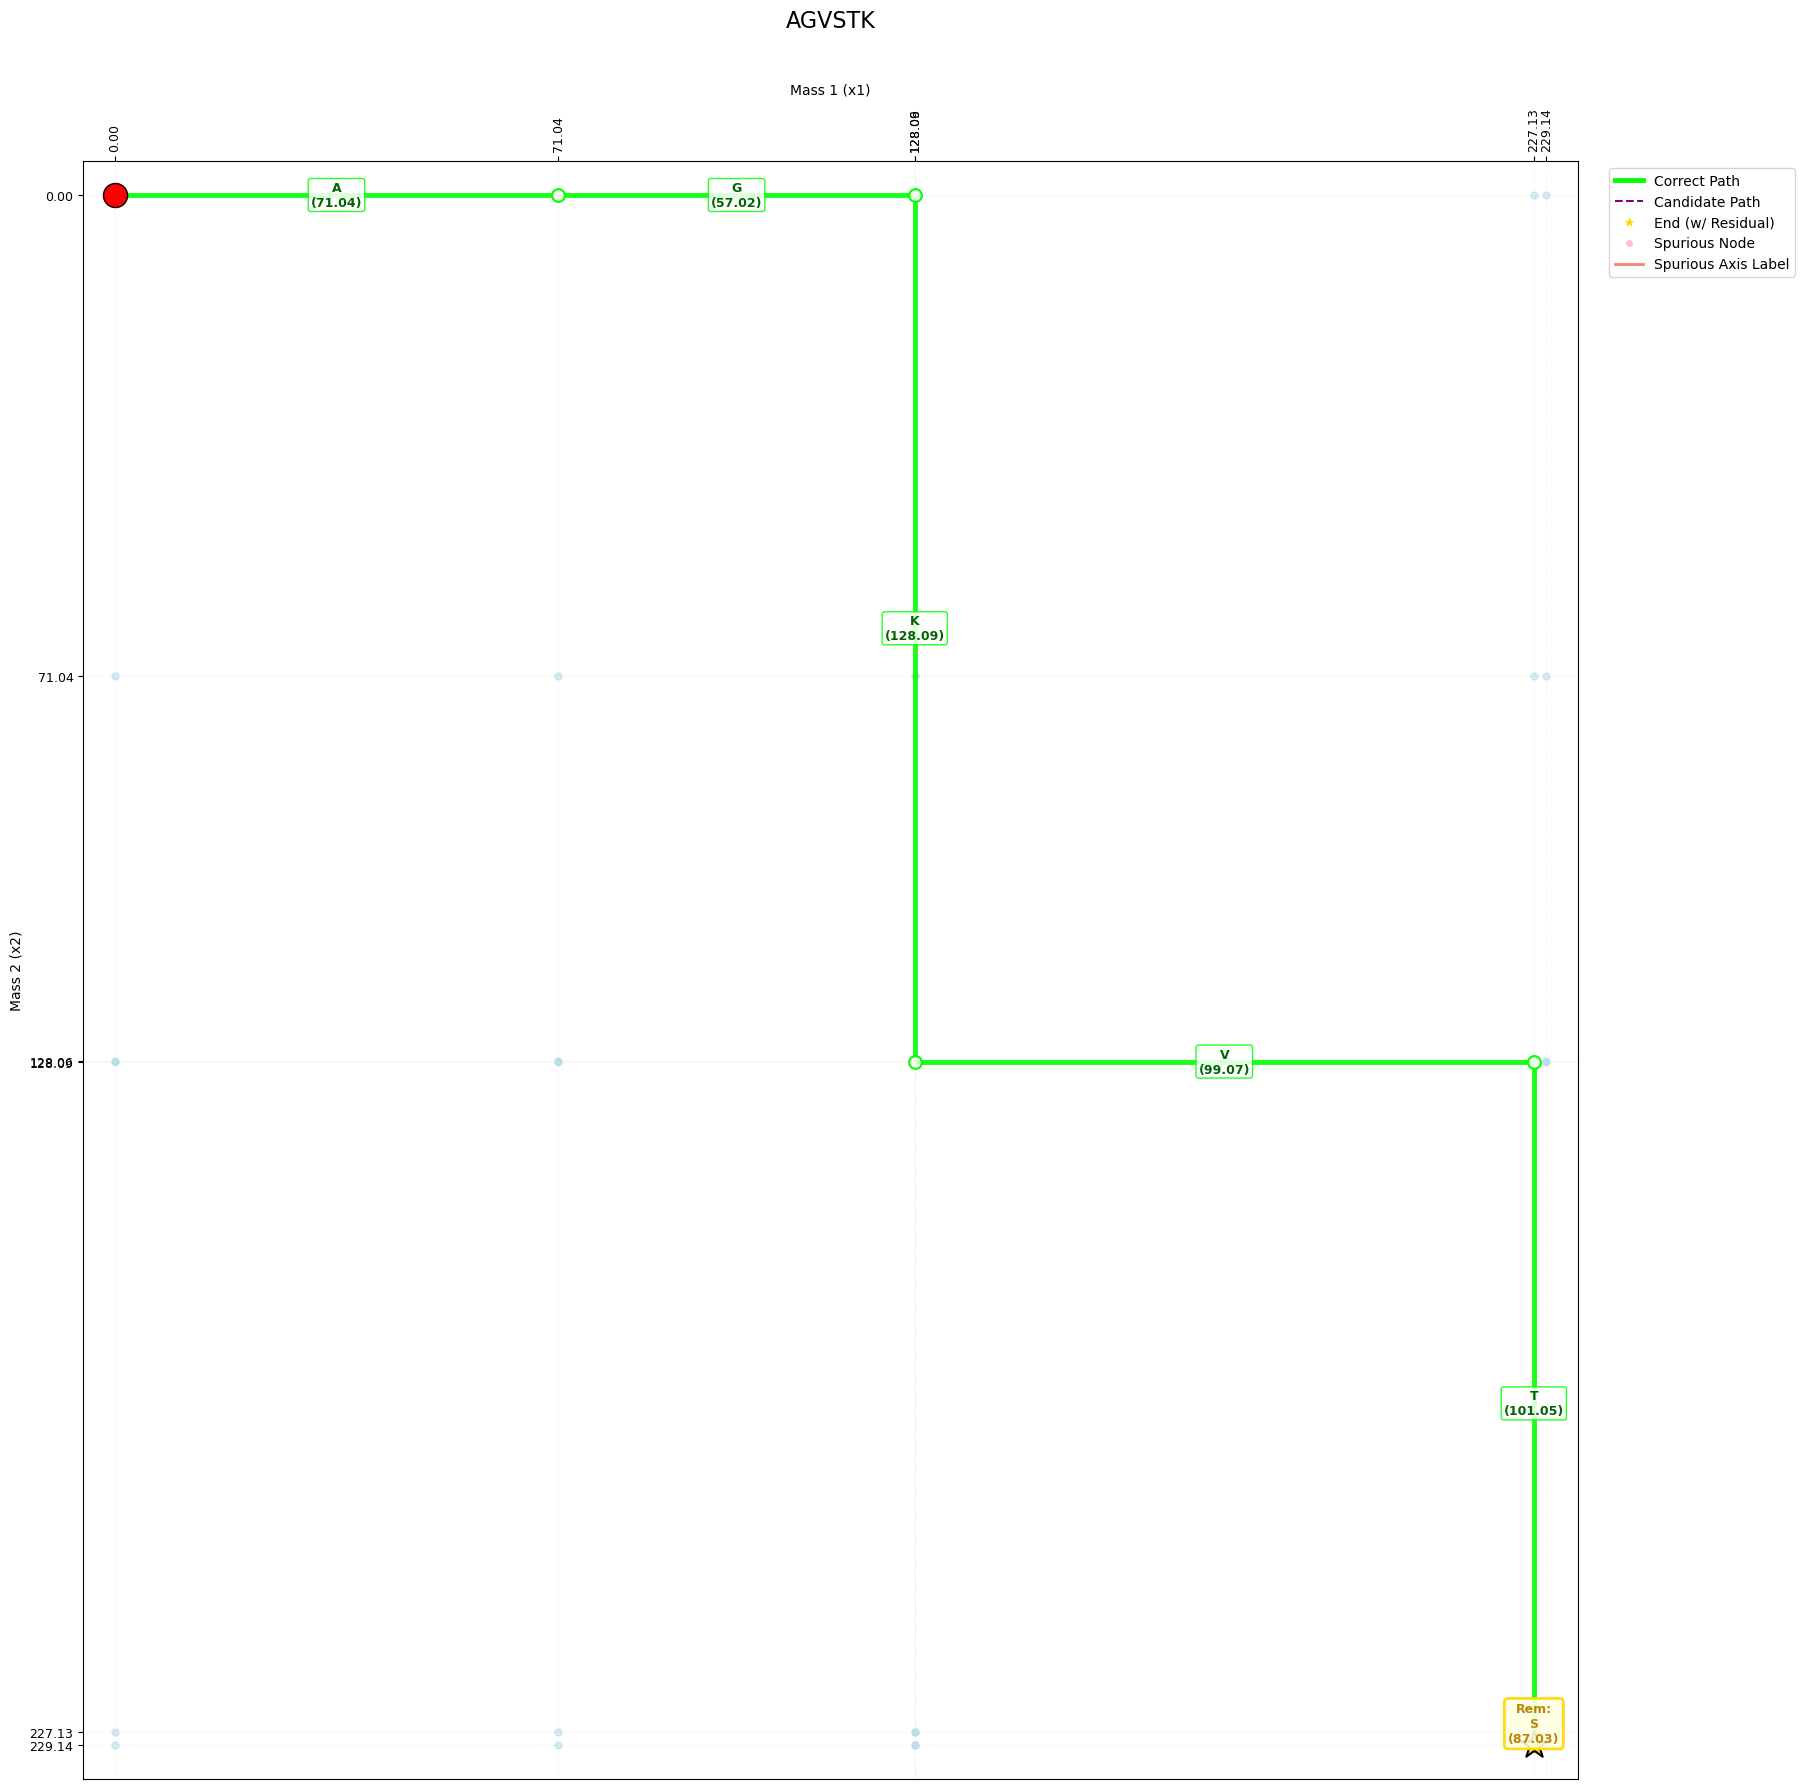

In [421]:
noise = []
full_spec = [0, 71.037, 128.058, 128.095, 227.126, 229.143]

correct = [(0.0,0.0), (71.037,0.0), (128.058, 0.0), (128.058, 128.095), (227.126, 128.095), (227.126, 229.143)]
candidates = []

AS.visualize_all_paths(full_spec, spurious_masses=noise, 
                         candidate_paths=candidates, 
                         correct_path=correct, 
                         aa_map=amino_acid_masses_switch,
                         title = sequence,
                         pep_mass=543.301,
                         save_path=None
                         )

In [ ]:
data = pd.read_excel('data/Covariance Scoring Tables 10000 Scans.xlsx', sheet_name='YLEFISDAIIHVLHSK-mz629-3_cov')
data = data[['m/z fragment 1', 'm/z fragment 2', 'Covariance', 'Partial Cov.', 'Score', 'Ranking']]

data = data.sort_values('Ranking', ascending=True)
data = data[data['Ranking'] != -1]

# create a canonical (order-independent) pair
data["pair_key"] = data.apply(
    lambda row: tuple(sorted([row["m/z fragment 1"], row["m/z fragment 2"]])),
    axis=1
)

# drop duplicated pairs, keep first occurrence
data = data.drop_duplicates(subset="pair_key").drop(columns="pair_key")
data.columns = ['m/z A', 'm/z B', 'Covariance', 'Partial Cov.', 'Score', 'Ranking']
data['each_original_data'] = data['m/z A'].astype('str')+ ' / ' + data['m/z B'].astype('str')
pep_seq = 'YLEFISDAIIHVLHSK'
charge = 3

In [239]:
data['m1+2m2'] = data['m/z A'] + 2*data['m/z B']
data['2m1+m2'] = 2*data['m/z A'] + data['m/z B']

In [240]:
data.head()

,m/z A,m/z B,Covariance,Partial Cov.,Score,Ranking,each_original_data,m1+2m2,2m1+m2
44162,666.352264,610.345257,90357137.0,88063889.0,854.57937,1,666.352264 / 610.345257,1887.042778,1943.049785
7482,371.204938,1238.685321,7026833.4,6909494.7,801.65673,2,371.204938 / 1238.685321,2848.575580,1981.095197
10264,406.198635,740.422212,397586840.0,236505820.0,794.82419,3,406.198635 / 740.422212,1887.043059,1552.819482
79251,1125.600158,484.289815,6995331.2,6918129.7,752.84789,4,1125.600158 / 484.289815,2094.179788,2735.490131
53603,740.923736,406.198635,330396660.0,196674270.0,738.46967,5,740.923736 / 406.198635,1553.321006,1888.046107


In [241]:
data_parent = data[(abs(data['m1+2m2'] - 1887.0362399999997) < 0.9) | (abs(data['2m1+m2'] - 1887.0362399999997) < 0.9)]

In [242]:
data_parent

,m/z A,m/z B,Covariance,Partial Cov.,Score,Ranking,each_original_data,m1+2m2,2m1+m2
44162,666.352264,610.345257,9.035714e+07,8.806389e+07,854.57937,1,666.352264 / 610.345257,1887.042778,1943.049785
10264,406.198635,740.422212,3.975868e+08,2.365058e+08,794.82419,3,406.198635 / 740.422212,1887.043059,1552.819482
54797,753.384857,566.829179,1.060415e+07,1.035357e+07,585.32687,14,753.384857 / 566.829179,1887.043215,2073.598893
44426,666.887673,553.267801,9.983514e+07,6.978027e+07,534.07049,20,666.887673 / 553.267801,1773.423275,1887.043147
39554,638.358436,610.345257,3.773457e+07,3.610404e+07,500.48045,27,638.358436 / 610.345257,1859.048950,1887.062129
...,...,...,...,...,...,...,...,...,...
32975,619.673653,647.342401,-2.137361e+05,-2.257245e+05,-553.97087,39158,619.673653 / 647.342401,1914.358455,1886.689707
36704,629.286152,629.302431,-2.861245e+05,-2.961210e+05,-581.35556,39413,629.286152 / 629.302431,1887.891014,1887.874735
32113,617.672476,651.842229,-2.542585e+05,-2.607335e+05,-582.35813,39428,617.672476 / 651.842229,1921.356934,1887.187181
39289,637.333082,624.678066,-1.838349e+05,-1.930124e+05,-616.96056,39810,637.333082 / 624.678066,1886.689214,1899.344230


In [243]:
df_parent_result = interpreter_modify.report_data(data_parent, pep_seq, charge, tolerance_input=1, merge_original=True)
df_parent_result.head(30)

,each_original_data,m/z A,m/z B,Interpretation A,Interpretation B,CorrelationScore,NormalisedScore,MassDeviation
0,215.139625 / 835.508886,215.139625,835.508886,bi(9-12)-2(NH3)(2+),a8-(HCOOH)-(HCOH)(1+),1.0,1.0,0.079
1,215.139625 / 835.508886,215.139625,835.508886,bi(9-12)-(H20)-(NH3)(2+),a8-(HCOOH)-(HCOH)(1+),1.0,1.0,0.496
2,215.139625 / 835.508886,215.139625,835.508886,bi(9-12)-2(H2O)(2+),a8-(HCOOH)-(HCOH)(1+),1.0,1.0,0.983
3,215.139625 / 835.508886,215.139625,835.508886,y2-(H2O)(1+),bi(7-14)-2(NH3)-(HCOH)(1+),1.0,1.0,0.99
4,215.139625 / 835.508886,215.139625,835.508886,y2-(H2O)(1+),bi(7-14)-(H2O)-(HCOOH)(1+),1.0,1.0,0.991
5,215.139625 / 835.508886,215.139625,835.508886,y2-(H2O)(1+),ai(7-14)-2(H2O)(1+),1.0,1.0,0.991
6,215.139625 / 835.508886,215.139625,835.508886,y2-(H2O)(1+),a8-(HCOOH)-(HCOH)(1+),1.0,1.0,0.994
7,234.145596 / 826.449145,234.145596,826.449145,y2(1+),b14(2+),1.0,1.0,0.021
8,234.145596 / 826.449145,234.145596,826.449145,y2(1+),ai(7-14)-(HCOOH)(1+),1.0,1.0,0.889
9,277.119219 / 804.943757,277.119219,804.943757,b2(1+),y14(2+),1.0,1.0,0.048


In [236]:
df_parent_result

,each_original_data,m/z A,m/z B,Interpretation A,Interpretation B,CorrelationScore,NormalisedScore,MassDeviation
0,234.145596 / 826.449145,234.145596,826.449145,y2(1+),b14(2+),1.0,1.0,0.021
1,234.145596 / 826.449145,234.145596,826.449145,y2(1+),ai(7-14)-(HCOOH)(1+),1.0,1.0,0.889
2,277.119219 / 804.943757,277.119219,804.943757,b2(1+),y14(2+),1.0,1.0,0.048
3,277.119219 / 804.943757,277.119219,804.943757,b4(2+),ai(5-12)-(NH3)(1+),1.0,1.0,0.464
4,277.119219 / 804.943757,277.119219,804.943757,y5-(HCOH)(2+),ai(4-11)-2(NH3)-(HCOH)(1+),1.0,1.0,0.501
...,...,...,...,...,...,...,...,...
145,1332.771603 / 277.119219,1332.771603,277.119219,y12(1+),b4(2+),1.0,1.0,0.044
146,1332.771603 / 277.119219,1332.771603,277.119219,y12(1+),b2(1+),1.0,1.0,0.056
147,1332.771603 / 277.155512,1332.771603,277.155512,y12(1+),b2(1+),1.0,1.0,0.039
148,1332.771603 / 277.155512,1332.771603,277.155512,y12(1+),b4(2+),1.0,1.0,0.041


In [237]:
df_parent_result.to_csv('/Users/kevinmbp/Desktop/2D_spec_dict/data/Top_Correlations_At_Full_Num_Scans_PCov/annotated/test1_3+.csv', index_label="Index")

## Data4

In [387]:
data = pd.read_excel('data/Covariance Scoring Tables 10000 Scans.xlsx', sheet_name='HGTVVLTALGGILK-mz460-3_cov')
data = data[['m/z fragment 1', 'm/z fragment 2', 'Covariance', 'Partial Cov.', 'Score', 'Ranking']]
data = data.sort_values('Ranking', ascending=True)
data = data[data['Ranking'] != -1]
# create a canonical (order-independent) pair
data["pair_key"] = data.apply(
    lambda row: tuple(sorted([row["m/z fragment 1"], row["m/z fragment 2"]])),
    axis=1
)

# drop duplicated pairs, keep first occurrence
data = data.drop_duplicates(subset="pair_key").drop(columns="pair_key")

In [388]:
data.head()

,m/z fragment 1,m/z fragment 2,Covariance,Partial Cov.,Score,Ranking
32773,475.278316,430.303981,323116860.0,293646250.0,2316.0349,1
39735,607.358544,386.751007,749287870.0,597678070.0,2091.1507,2
9131,354.706474,671.447690,746203800.0,579846960.0,1853.8540,3
35303,494.273984,772.495939,538804670.0,424434350.0,1812.7874,4
6738,336.226953,708.406805,178106290.0,165727450.0,1638.6766,5


In [389]:
import interpreter_modify
data.head()
data.columns = ['m/z A', 'm/z B', 'Covariance', 'Partial Cov.', 'Score', 'Ranking']
data['each_original_data'] = data['m/z A'].astype('str')+ ' / ' + data['m/z B'].astype('str')
pep_seq = 'HGTVVLTALGGILK'
charge = 3
data.set_index('Ranking', inplace=True)

In [390]:
data = data.head(100)
df_result = interpreter_modify.report_data(data, pep_seq, charge, tolerance_input=0.3, merge_original=True)
df_result

,each_original_data,m/z A,m/z B,Interpretation A,Interpretation B,CorrelationScore,NormalisedScore,MassDeviation
0,157.133877 / 709.409885,157.133877,709.409885,,,1.0,1.0,
1,173.092624 / 600.410172,173.092624,600.410172,bi(7-8)(1+),y6(1+),1.0,1.0,0.003
2,173.092624 / 601.413444,173.092624,601.413444,,,1.0,1.0,
3,185.129108 / 708.406805,185.129108,708.406805,bi(8-9)(1+),b7(1+),1.0,1.0,0.023
4,185.129108 / 708.406805,185.129108,708.406805,ai(5-6)(1+),y8-2(NH3)-(HCOH)(1+),1.0,1.0,0.039
...,...,...,...,...,...,...,...,...
112,885.581175 / 248.141995,885.581175,248.141995,y9(1+),b3-(H2O)-(HCOH)(1+),1.0,1.0,0.002
113,885.581175 / 248.141995,885.581175,248.141995,a10-2(H2O)(1+),bi(11-13)-2(H2O)(1+),1.0,1.0,0.049
114,885.581175 / 248.141995,885.581175,248.141995,b10-2(NH3)-(HCOH)(1+),bi(11-13)-2(H2O)(1+),1.0,1.0,0.081
115,885.581175 / 395.205158,885.581175,395.205158,y9(1+),b4(1+),1.0,1.0,0.025


In [391]:
mask = pd.to_numeric(df_result['MassDeviation'], errors='coerce') < 0.1
df_filtered = df_result[mask]

In [392]:
df_filtered

,each_original_data,m/z A,m/z B,Interpretation A,Interpretation B,CorrelationScore,NormalisedScore,MassDeviation
1,173.092624 / 600.410172,173.092624,600.410172,bi(7-8)(1+),y6(1+),1.0,1.0,0.003
3,185.129108 / 708.406805,185.129108,708.406805,bi(8-9)(1+),b7(1+),1.0,1.0,0.023
4,185.129108 / 708.406805,185.129108,708.406805,ai(5-6)(1+),y8-2(NH3)-(HCOH)(1+),1.0,1.0,0.039
6,215.139591 / 494.273984,215.139591,494.273984,bi(6-7)(1+),b5(1+),1.0,1.0,0.026
7,242.150678 / 430.303981,242.150678,430.303981,bi(8-10)(1+),y4(1+),1.0,1.0,0.004
...,...,...,...,...,...,...,...,...
111,885.581175 / 247.640337,885.581175,247.640337,y9(1+),b5(2+),1.0,1.0,0.01
112,885.581175 / 248.141995,885.581175,248.141995,y9(1+),b3-(H2O)-(HCOH)(1+),1.0,1.0,0.002
113,885.581175 / 248.141995,885.581175,248.141995,a10-2(H2O)(1+),bi(11-13)-2(H2O)(1+),1.0,1.0,0.049
114,885.581175 / 248.141995,885.581175,248.141995,b10-2(NH3)-(HCOH)(1+),bi(11-13)-2(H2O)(1+),1.0,1.0,0.081


In [393]:
df_result.to_csv('/Users/kevinmbp/Desktop/2D_spec_dict/data/Top_Correlations_At_Full_Num_Scans_PCov/annotated/test4_3+.csv', index_label="Index")

In [318]:
import peptide
peptide.Pep('[VEADIAGHGQEVLIR+3H]3+').pep_mass / 3

536.2897233333333

In [13]:
import pandas as pd
import numpy as np

In [3]:
pep =peptide.Pep('[VEADIAGHGQEVLIR+3H]3+')

In [4]:
pep.pep_mass

1608.86917

In [7]:
data = pd.read_excel('data/Covariance Scoring Tables 10000 Scans.xlsx', sheet_name='VEADIAGHGQEVLIR-mz536-3_cov')
data = data[['m/z fragment 1', 'm/z fragment 2', 'Covariance', 'Partial Cov.', 'Score', 'Ranking']]

data = data.sort_values('Ranking', ascending=True)
data = data[data['Ranking'] != -1]

# create a canonical (order-independent) pair
data["pair_key"] = data.apply(
    lambda row: tuple(sorted([row["m/z fragment 1"], row["m/z fragment 2"]])),
    axis=1
)

# drop duplicated pairs, keep first occurrence
data = data.drop_duplicates(subset="pair_key").drop(columns="pair_key")

In [25]:
data_100 = data.head(100)

In [26]:
data_100.head()

,m/z fragment 1,m/z fragment 2,Covariance,Partial Cov.,Score,Ranking
346,175.119605,1204.639002,25244833.0,25084756.0,1273.92260,1
15298,565.275177,814.482029,58626208.0,56005207.0,1164.35940,2
18634,654.359227,300.156407,355823770.0,262187790.0,1054.34040,3
8862,500.357482,879.399748,19982228.0,19730374.0,1001.39590,4
26373,750.356517,629.400750,15557810.0,15374329.0,938.70762,5


In [27]:

def find_closest_mz_combo(df, target, threshold):
    # compute both combinations
    combo_1 = df["m/z fragment 1"] + 2 * df["m/z fragment 2"]
    combo_2 = df["m/z fragment 2"] + 2 * df["m/z fragment 1"]

    # distance to target
    dist_1 = (combo_1 - target).abs()
    dist_2 = (combo_2 - target).abs()

    # best distance and which combo was used
    best_dist = np.minimum(dist_1, dist_2)
    best_combo = np.where(dist_1 <= dist_2, combo_1, combo_2)
    best_formula = np.where(
        dist_1 <= dist_2,
        "mz1 + 2*mz2",
        "mz2 + 2*mz1"
    )

    # attach results
    result = df.copy()
    result["best_value"] = best_combo
    result["distance"] = best_dist
    result["formula"] = best_formula

    # filter by threshold
    result = result[result["distance"] <= threshold]

    # sort by closeness
    result = result.sort_values("distance")

    return result

In [30]:
find_closest_mz_combo(data_100, 1608.86917, 1)

,m/z fragment 1,m/z fragment 2,Covariance,Partial Cov.,Score,Ranking,best_value,distance,formula
16556,603.793117,401.288604,4666969.1,4393455.1,340.37291,61,1608.874838,0.005668,mz2 + 2*mz1
18634,654.359227,300.156407,355823770.0,262187790.0,1054.34040,3,1608.874861,0.005691,mz2 + 2*mz1
9490,504.784561,599.305830,35258126.0,34052411.0,855.57282,10,1608.874952,0.005782,mz2 + 2*mz1
7755,489.737110,629.400750,12210012.0,11947537.0,680.04937,18,1608.874970,0.005800,mz2 + 2*mz1
14840,554.258768,500.357482,12599756.0,12131174.0,509.88637,34,1608.875018,0.005848,mz2 + 2*mz1
15863,596.845575,415.183883,140359140.0,117995480.0,856.04609,9,1608.875033,0.005863,mz2 + 2*mz1
14332,540.303260,528.268562,82621553.0,72492860.0,769.61895,12,1608.875082,0.005912,mz2 + 2*mz1
27175,757.460091,425.707564,5494036.1,5480694.2,504.10249,36,1608.875219,0.006049,mz1 + 2*mz2
3988,397.196620,814.482029,23986377.0,22596088.0,587.54630,24,1608.875269,0.006099,mz2 + 2*mz1
2950,300.156407,1008.563901,29964863.0,23470978.0,417.00460,45,1608.876715,0.007545,mz2 + 2*mz1


In [35]:
find_closest_mz_combo(data, 1608.86917-17.03, 0.5)

,m/z fragment 1,m/z fragment 2,Covariance,Partial Cov.,Score,Ranking,best_value,distance,formula
14152,537.279979,517.276486,4.025929e+05,340455.36,41.938110,4051,1591.836444,0.002726,mz2 + 2*mz1
12071,531.286332,529.270973,-7.649487e+05,-846701.85,-131.171890,12286,1591.843637,0.004467,mz2 + 2*mz1
11208,528.268562,531.794223,2.412366e+06,2123206.00,155.454610,529,1591.857008,0.017838,mz1 + 2*mz2
17764,645.850301,300.156407,8.128034e+06,5124685.40,153.702380,546,1591.857009,0.017839,mz2 + 2*mz1
15689,588.337358,415.183883,3.473198e+06,3277501.70,175.806580,332,1591.858599,0.019429,mz2 + 2*mz1
1691,229.119049,681.370686,7.646798e+07,3331630.20,16.753948,5348,1591.860421,0.021251,mz1 + 2*mz2
1864,230.116129,680.872829,-9.822613e+05,-1236093.10,-95.484323,11137,1591.861787,0.022617,mz1 + 2*mz2
11553,530.287900,531.286332,-4.026265e+06,-4214669.30,-123.624550,12070,1591.862132,0.022962,mz2 + 2*mz1
11380,529.270973,531.297907,-2.156179e+05,-233185.99,-41.780686,8764,1591.866787,0.027617,mz1 + 2*mz2
10001,510.257830,540.804661,1.945959e+06,1100781.50,54.169668,3447,1591.867152,0.027982,mz1 + 2*mz2


In [34]:
find_closest_mz_combo(data, 1608.86917-18.016, 0.5)

,m/z fragment 1,m/z fragment 2,Covariance,Partial Cov.,Score,Ranking,best_value,distance,formula
18111,646.372715,298.104311,-1.853030e+03,-3.005731e+04,-7.073215,6994,1590.849741,0.003429,mz2 + 2*mz1
16402,599.305830,495.779102,2.619998e+05,2.285957e+05,44.633254,3927,1590.864034,0.010864,mz1 + 2*mz2
15515,587.840184,415.183883,1.870428e+06,1.487720e+06,75.857269,2502,1590.864251,0.011081,mz2 + 2*mz1
3745,397.173179,596.845575,1.034032e+06,-2.967895e+05,-8.841572,7104,1590.864329,0.011159,mz1 + 2*mz2
10000,510.257830,540.303260,1.219723e+07,1.012620e+07,265.459340,88,1590.864350,0.011180,mz1 + 2*mz2
12244,531.297907,528.268562,4.868309e+06,4.770648e+06,260.535260,93,1590.864376,0.011206,mz2 + 2*mz1
21585,680.872829,229.119049,5.700166e+07,-3.163194e+07,-141.299030,12574,1590.864707,0.011537,mz2 + 2*mz1
2885,300.156407,645.354248,8.856010e+06,7.193754e+06,209.112040,171,1590.864903,0.011733,mz1 + 2*mz2
12070,531.286332,528.268562,7.470285e+05,2.925606e+05,17.851595,5299,1590.841226,0.011944,mz2 + 2*mz1
19153,659.353388,272.161442,1.679415e+05,1.528675e+05,44.605961,3930,1590.868218,0.015048,mz2 + 2*mz1


In [36]:
from typing import Dict

# Monoisotopic residue masses (no H2O, no proton) — just AA residues summed.
AA_MASS: Dict[str, float] = {
    "A": 71.03711,
    "R": 156.10111,
    "N": 114.04293,
    "D": 115.02694,
    "C": 103.00919,
    "E": 129.04259,
    "Q": 128.05858,
    "G": 57.02146,
    "H": 137.05891,
    "I": 113.08406,
    "L": 113.08406,
    "K": 128.09496,
    "M": 131.04049,
    "F": 147.06841,
    "P": 97.05276,
    "S": 87.03203,
    "T": 101.04768,
    "W": 186.07931,
    "Y": 163.06333,
    "V": 99.06841,
}

def fragment_mass(seq: str, ion: str, aa_mass: Dict[str, float] = AA_MASS) -> float:
    """
    seq: peptide sequence, e.g. "ABCD" (must use letters in aa_mass)
    ion: string like "b2" or "y2" (number must be 1..len(seq)-1)
    returns: sum of residue masses for that fragment only
    """
    seq = seq.strip().upper()
    ion = ion.strip().lower()

    if len(ion) < 2 or ion[0] not in ("b", "y") or not ion[1:].isdigit():
        raise ValueError("ion must look like 'b2' or 'y3'")

    k = int(ion[1:])
    n = len(seq)
    if not (1 <= k <= n - 1):
        raise ValueError(f"ion index must be between 1 and {n-1} for length {n}")

    frag = seq[:k] if ion[0] == "b" else seq[n - k:]
    try:
        return sum(aa_mass[aa] for aa in frag)
    except KeyError as e:
        raise ValueError(f"Unknown amino acid: {e.args[0]}") from None

In [52]:
fragment_mass('PEPTIDE', 'y3')

357.15359

In [55]:
(fragment_mass('PEPTIDE', 'b4')) / 2

212.097895

In [39]:
sum([AA_MASS[i] for i in 'PEPTIDE'])

781.34938

In [61]:
357.153 + 220.095*2


797.3430000000001

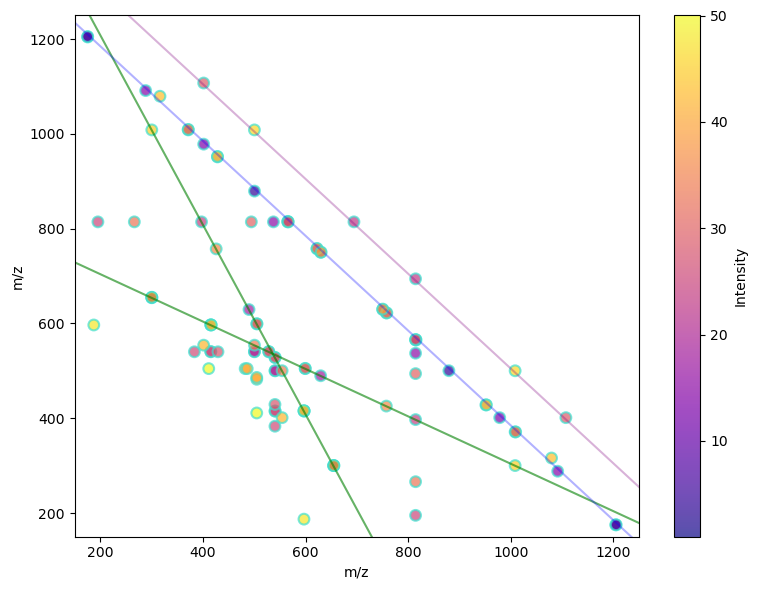

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- 1. Generate Dummy Data (Replace this with your actual data loading) ---
# We are creating random data to simulate your 'm/z x', 'm/z y', and 'intensity' columns
data = pd.read_excel('data/Covariance Scoring Tables 10000 Scans.xlsx', sheet_name='VEADIAGHGQEVLIR-mz536-3_cov')
data = data[['m/z fragment 1', 'm/z fragment 2', 'Covariance', 'Partial Cov.', 'Score', 'Ranking']]

data = data.sort_values('Ranking', ascending=True)
data = data[data['Ranking'] != -1]
data = data.head(100)

data = {
    'mz_x': data['m/z fragment 1'],
    'mz_y': data['m/z fragment 2'],
    'intensity': data['Ranking']
}
df = pd.DataFrame(data)

# --- 2. Setup the Plot ---
plt.figure(figsize=(8, 6), dpi=100)

# --- 3. Create the Scatter Plot ---
# c: maps the 'intensity' column to color
# cmap: 'plasma' matches the purple-to-yellow gradient in your image
# edgecolors: sets the teal/green outline around each dot
# linewidths: makes that outline visible
# alpha: adds slight transparency so overlapping points are visible
scatter = plt.scatter(
    df['mz_x'], 
    df['mz_y'], 
    c=df['intensity'], 
    cmap='plasma',      
    s=60,               # Size of dots
    alpha=0.7,          # Transparency
    edgecolors='#40E0D0', # A teal hex color (Turquoise)
    linewidths=1.5      # Thickness of the ring
)

# --- 4. Add the Diagonal Lines ---
# Your image shows lines with negative slope (y = -x + C).
# We generate x-values to plot these lines across the graph.
# 4. Add the Custom Lines
x_line = np.linspace(0, 1400, 100) # Extend range slightly to cover full view

# Line 1: 2x + y = 1608 -> y = 1608 - 2x
plt.plot(x_line, 1608 - 2*x_line, 
         color='green', alpha=0.6, label='2x + y = 1608')

# Line 2: x + 2y = 1608 -> y = 804 - 0.5x
plt.plot(x_line, 804 - 0.5*x_line, 
         color='green', alpha=0.6, label='x + 2y = 1608')

plt.plot(x_line, -1*x_line + 1505, color='purple', alpha=0.3)
plt.plot(x_line, -1*x_line + 1385, color='blue', alpha=0.3)
#plt.plot(x_line, -1*x_line + 1608.86917, linestyle='--', color='grey', alpha=0.3)

# If you actually needed 'Neutral Loss' lines (slope +1), you would use:
# plt.plot(x_line, x_line - 200, ...)

# --- 5. Formatting & Labels ---
plt.colorbar(scatter, label='Intensity') # Adds the color scale bar on the right
plt.xlabel('m/z')
plt.ylabel('m/z')

# Set limits to match your example
plt.xlim(150, 1250)
plt.ylim(150, 1250)

# Clean up layout
plt.grid(False) # The example image does not use a grid
plt.tight_layout()

plt.show()

In [19]:
pep =peptide.Pep('[VEADIAGHGQEVLIR+3H]3+')

In [20]:
pep.pep_mass

1608.86917

In [200]:
data = pd.read_excel('data/Covariance Scoring Tables 10000 Scans.xlsx', sheet_name='HGTVVLTALGGILK-mz460-3_cov')
data = data[['m/z fragment 1', 'm/z fragment 2', 'Covariance', 'Partial Cov.', 'Score', 'Ranking']]

data = data.sort_values('Ranking', ascending=True)
data = data[data['Ranking'] != -1]

# create a canonical (order-independent) pair
data["pair_key"] = data.apply(
    lambda row: tuple(sorted([row["m/z fragment 1"], row["m/z fragment 2"]])),
    axis=1
)

# drop duplicated pairs, keep first occurrence
data = data.drop_duplicates(subset="pair_key").drop(columns="pair_key")

In [201]:
import interpreter_modify
data.head()
data = data.head(150)
data.columns = ['m/z A', 'm/z B', 'Covariance', 'Partial Cov.', 'Score', 'Ranking']
data['each_original_data'] = data['m/z A'].astype('str')+ ' / ' + data['m/z B'].astype('str')
pep_seq = 'HGTVVLTALGGILK'
charge = 3


In [202]:
df_result = interpreter_modify.report_data_with_ranking(data, pep_seq, charge, tolerance_input=0.3, merge_original=True)

In [203]:
df_result_filtered = df_result[
    pd.to_numeric(df_result['MassDeviation'], errors='coerce') < 0.1
]

In [204]:
df_result_filtered = df_result_filtered.sort_values('Ranking')

In [205]:
df_result_filtered

,each_original_data,m/z A,m/z B,Interpretation A,Interpretation B,CorrelationScore,NormalisedScore,MassDeviation,Ranking
81,475.278316 / 430.303981,475.278316,430.303981,b10(2+),y4(1+),1.0,1.0,0.012,1
121,607.358544 / 386.751007,607.358544,386.751007,b6(1+),y8(2+),1.0,1.0,0.021,2
51,354.706474 / 671.44769,354.706474,671.447690,b7(2+),y7(1+),1.0,1.0,0.014,3
98,494.273984 / 772.495939,494.273984,772.495939,b5(1+),y8(1+),1.0,1.0,0.027,4
39,336.226953 / 708.406805,336.226953,708.406805,y7(2+),b7(1+),1.0,1.0,0.023,5
...,...,...,...,...,...,...,...,...,...
5,171.11336 / 430.303981,171.113360,430.303981,ai(6-9)-(HCOH)(2+),b5-2(NH3)-(HCOH)(1+),1.0,1.0,0.076,129
138,672.450793 / 396.208461,672.450793,396.208461,b7-2(H2O)(1+),y4-2(NH3)(1+),1.0,1.0,0.058,132
129,649.522866 / 260.197727,649.522866,260.197727,ai(5-12)-(H2O)-(HCOH)(1+),y2(1+),1.0,1.0,0.093,141
93,494.273984 / 187.14471,494.273984,187.144710,b5(1+),ai(6-7)(1+),1.0,1.0,0.026,146


In [206]:
# total interpretation string length = len(A) + len(B)
lens = (
    df_result_filtered["Interpretation A"].astype(str).str.len()
    + df_result_filtered["Interpretation B"].astype(str).str.len()
)

idx = lens.groupby([df_result_filtered["m/z A"], df_result_filtered["m/z B"]]).idxmin()

df_one_per_pair = df_result_filtered.loc[idx].sort_values(["m/z A", "m/z B"]).reset_index(drop=True)

In [207]:
df_one_per_pair = df_one_per_pair.sort_values('Ranking')
df_one_per_pair.reset_index(inplace=True, drop=True)
df_one_per_pair.index = df_one_per_pair.index + 1
df_one_per_pair.head()

,each_original_data,m/z A,m/z B,Interpretation A,Interpretation B,CorrelationScore,NormalisedScore,MassDeviation,Ranking
1,475.278316 / 430.303981,475.278316,430.303981,b10(2+),y4(1+),1.0,1.0,0.012,1
2,607.358544 / 386.751007,607.358544,386.751007,b6(1+),y8(2+),1.0,1.0,0.021,2
3,354.706474 / 671.44769,354.706474,671.447690,b7(2+),y7(1+),1.0,1.0,0.014,3
4,494.273984 / 772.495939,494.273984,772.495939,b5(1+),y8(1+),1.0,1.0,0.027,4
5,336.226953 / 708.406805,336.226953,708.406805,y7(2+),b7(1+),1.0,1.0,0.023,5


In [208]:
df_one_per_pair = df_one_per_pair[['m/z A', 'Interpretation A', 'm/z B', 'Interpretation B', 'MassDeviation']].head(50)
df_one_per_pair.to_csv(f'/Users/kevinmbp/Desktop/2D_spec_dict/paper/{pep_seq}_3+.csv', index_label='Intensity Ranking')

In [209]:
data = pd.read_excel('data/Covariance Scoring Tables 10000 Scans.xlsx', sheet_name='VEADIAGHGQEVLIR-mz536-3_cov')
data = data[['m/z fragment 1', 'm/z fragment 2', 'Covariance', 'Partial Cov.', 'Score', 'Ranking']]

data = data.sort_values('Ranking', ascending=True)
data = data[data['Ranking'] != -1]

# create a canonical (order-independent) pair
data["pair_key"] = data.apply(
    lambda row: tuple(sorted([row["m/z fragment 1"], row["m/z fragment 2"]])),
    axis=1
)

# drop duplicated pairs, keep first occurrence
data = data.drop_duplicates(subset="pair_key").drop(columns="pair_key")


In [212]:
data_50 = data.head(50)

In [213]:

def find_closest_mz_combo(df, target, threshold):
    # compute both combinations
    combo_1 = df["m/z fragment 1"] + 2 * df["m/z fragment 2"]
    combo_2 = df["m/z fragment 2"] + 2 * df["m/z fragment 1"]

    # distance to target
    dist_1 = (combo_1 - target).abs()
    dist_2 = (combo_2 - target).abs()

    # best distance and which combo was used
    best_dist = np.minimum(dist_1, dist_2)
    best_combo = np.where(dist_1 <= dist_2, combo_1, combo_2)
    best_formula = np.where(
        dist_1 <= dist_2,
        "mz1 + 2*mz2",
        "mz2 + 2*mz1"
    )

    # attach results
    result = df.copy()
    result["best_value"] = best_combo
    result["distance"] = best_dist
    result["formula"] = best_formula

    # filter by threshold
    result = result[result["distance"] <= threshold]

    # sort by closeness
    result = result.sort_values("distance")

    return result

In [219]:
find_closest_mz_combo(data_50, 1608.86917-17.01, 2)

,m/z fragment 1,m/z fragment 2,Covariance,Partial Cov.,Score,Ranking,best_value,distance,formula


In [229]:
# --- 1. Generate Dummy Data (Replace this with your actual data loading) ---
# We are creating random data to simulate your 'm/z x', 'm/z y', and 'intensity' columns
data = pd.read_csv('/Users/kevinmbp/Desktop/2D_spec_dict/paper/VEADIAGHGQEVLIR_3+.csv')



data = {
    'mz_x': data['m/z A'],
    'mz_y': data['m/z B'],
    'intensity': data['Intensity Ranking']
}
df = pd.DataFrame(data)
df = pd.concat(
    [
        df.rename(columns={'mz_x': 'mz_a', 'mz_y': 'mz_b'}),
        df.rename(columns={'mz_x': 'mz_b', 'mz_y': 'mz_a'})
    ],
    ignore_index=True
)

df.rename(columns={'mz_a': 'mz_x', 'mz_b': 'mz_y'})

,mz_x,mz_y,intensity
0,175.119605,1204.639002,1
1,565.275177,814.482029,2
2,654.359227,300.156407,3
3,500.357482,879.399748,4
4,750.356517,629.400750,5
...,...,...,...
95,500.273383,681.370686,46
96,540.303260,510.257830,47
97,815.484834,266.125697,48
98,689.877751,201.124072,49


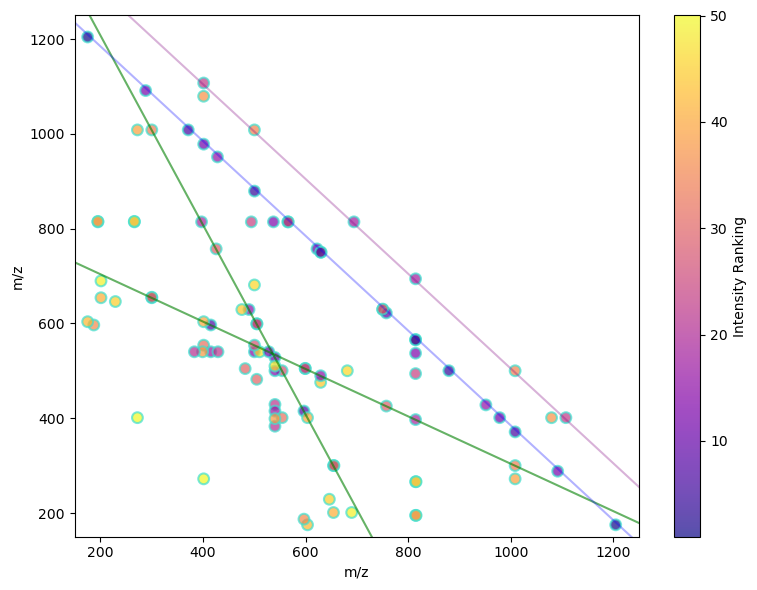

In [262]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- 1. Generate Dummy Data (Replace this with your actual data loading) ---
# We are creating random data to simulate your 'm/z x', 'm/z y', and 'intensity' columns
data = pd.read_csv('/Users/kevinmbp/Desktop/2D_spec_dict/paper/VEADIAGHGQEVLIR_3+.csv')



data = {
    'mz_x': data['m/z A'],
    'mz_y': data['m/z B'],
    'intensity': data['Intensity Ranking']
}
df = pd.DataFrame(data)
df = pd.concat(
    [
        df.rename(columns={'mz_x': 'mz_a', 'mz_y': 'mz_b'}),
        df.rename(columns={'mz_x': 'mz_b', 'mz_y': 'mz_a'})
    ],
    ignore_index=True
)

df = df.rename(columns={'mz_a': 'mz_x', 'mz_b': 'mz_y'})
plt.figure(figsize=(8, 6), dpi=100)

# --- 3. Create the Scatter Plot ---
# c: maps the 'intensity' column to color
# cmap: 'plasma' matches the purple-to-yellow gradient in your image
# edgecolors: sets the teal/green outline around each dot
# linewidths: makes that outline visible
# alpha: adds slight transparency so overlapping points are visible
scatter = plt.scatter(
    df['mz_x'], 
    df['mz_y'], 
    c=df['intensity'], 
    cmap='plasma',      
    s=60,               # Size of dots
    alpha=0.7,          # Transparency
    edgecolors='#40E0D0', # A teal hex color (Turquoise)
    linewidths=1.5      # Thickness of the ring
)

# --- 4. Add the Diagonal Lines ---
# Your image shows lines with negative slope (y = -x + C).
# We generate x-values to plot these lines across the graph.
# 4. Add the Custom Lines
x_line = np.linspace(0, 1400, 100) # Extend range slightly to cover full view

# Line 1: 2x + y = 1608 -> y = 1608 - 2x
plt.plot(x_line, 1608 - 2*x_line, 
         color='green', alpha=0.6, label='2x + y = 1608')

# Line 2: x + 2y = 1608 -> y = 804 - 0.5x
plt.plot(x_line, 804 - 0.5*x_line, 
         color='green', alpha=0.6, label='x + 2y = 1608')

plt.plot(x_line, -1*x_line + 1505, color='purple', alpha=0.3)
plt.plot(x_line, -1*x_line + 1385, color='blue', alpha=0.3)
#plt.plot(x_line, -1*x_line + 1608.86917, linestyle='--', color='grey', alpha=0.3)

# If you actually needed 'Neutral Loss' lines (slope +1), you would use:
# plt.plot(x_line, x_line - 200, ...)

# --- 5. Formatting & Labels ---
plt.colorbar(scatter, label='Intensity Ranking') # Adds the color scale bar on the right
plt.xlabel('m/z')
plt.ylabel('m/z')

# Set limits to match your example
plt.xlim(150, 1250)
plt.ylim(150, 1250)

# Clean up layout
plt.grid(False) # The example image does not use a grid
plt.tight_layout()

plt.show()

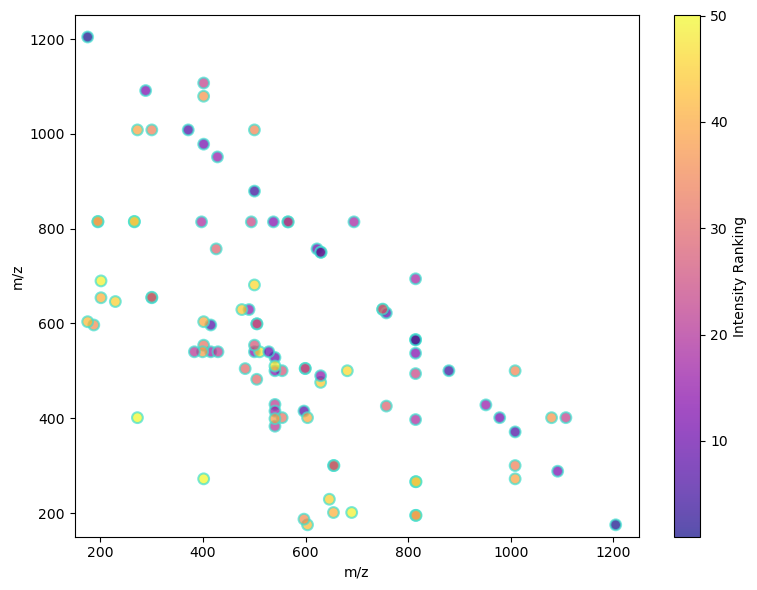

In [263]:
# --- 1. Generate Dummy Data (Replace this with your actual data loading) ---
# We are creating random data to simulate your 'm/z x', 'm/z y', and 'intensity' columns
data = pd.read_csv('/Users/kevinmbp/Desktop/2D_spec_dict/paper/VEADIAGHGQEVLIR_3+.csv')



data = {
    'mz_x': data['m/z A'],
    'mz_y': data['m/z B'],
    'intensity': data['Intensity Ranking']
}
df = pd.DataFrame(data)
df = pd.concat(
    [
        df.rename(columns={'mz_x': 'mz_a', 'mz_y': 'mz_b'}),
        df.rename(columns={'mz_x': 'mz_b', 'mz_y': 'mz_a'})
    ],
    ignore_index=True
)

df = df.rename(columns={'mz_a': 'mz_x', 'mz_b': 'mz_y'})
plt.figure(figsize=(8, 6), dpi=100)

# --- 3. Create the Scatter Plot ---
# c: maps the 'intensity' column to color
# cmap: 'plasma' matches the purple-to-yellow gradient in your image
# edgecolors: sets the teal/green outline around each dot
# linewidths: makes that outline visible
# alpha: adds slight transparency so overlapping points are visible
scatter = plt.scatter(
    df['mz_x'], 
    df['mz_y'], 
    c=df['intensity'], 
    cmap='plasma',      
    s=60,               # Size of dots
    alpha=0.7,          # Transparency
    edgecolors='#40E0D0', # A teal hex color (Turquoise)
    linewidths=1.5      # Thickness of the ring
)

# --- 4. Add the Diagonal Lines ---
# Your image shows lines with negative slope (y = -x + C).
# We generate x-values to plot these lines across the graph.
# 4. Add the Custom Lines
x_line = np.linspace(0, 1400, 100) # Extend range slightly to cover full view

#plt.plot(x_line, -1*x_line + 1608.86917, linestyle='--', color='grey', alpha=0.3)

# If you actually needed 'Neutral Loss' lines (slope +1), you would use:
# plt.plot(x_line, x_line - 200, ...)

# --- 5. Formatting & Labels ---
plt.colorbar(scatter, label='Intensity Ranking') # Adds the color scale bar on the right
plt.xlabel('m/z')
plt.ylabel('m/z')

# Set limits to match your example
plt.xlim(150, 1250)
plt.ylim(150, 1250)

# Clean up layout
plt.grid(False) # The example image does not use a grid
plt.tight_layout()

plt.show()

In [234]:
1608.86917 - 99.06841

1509.8007599999999

In [235]:
data = pd.read_csv('/Users/kevinmbp/Desktop/2D_spec_dict/paper/VEADIAGHGQEVLIR_3+.csv')


In [241]:
data['sum'] = data['m/z A'] + data['m/z B']
data[(data['sum'] < 1509.8007599999999 + 4) & (data['sum'] > 1509.8007599999999 -4)]

,Intensity Ranking,m/z A,Interpretation A,m/z B,Interpretation B,MassDeviation,sum
17,18,694.319024,bi(2-8)(1+),814.482029,y7(1+),0.021,1508.801053
22,23,1107.512648,b11(1+),401.288604,y3(1+),0.017,1508.801252
34,35,500.237156,a5(1+),1008.563901,y9(1+),0.037,1508.801057


In [242]:
1608.86917 - 99.06841 - 129.04259

1380.7581699999998

In [245]:
data[(data['sum'] < 1380.7581699999998 + 2) & (data['sum'] > 1380.7581699999998 - 2)]

,Intensity Ranking,m/z A,Interpretation A,m/z B,Interpretation B,MassDeviation,sum
0,1,175.119605,y1(1+),1204.639002,bi(3-14)(1+),0.021,1379.758607
1,2,565.275177,bi(3-8)(1+),814.482029,y7(1+),0.025,1379.757206
3,4,500.357482,y4(1+),879.399748,bi(3-11)(1+),0.020,1379.757230
4,5,750.356517,bi(3-10)(1+),629.400750,y5(1+),0.023,1379.757267
5,6,371.193813,bi(3-6)(1+),1008.563901,y9(1+),0.017,1379.757714
8,9,622.296933,bi(3-9)(1+),757.460091,y6(1+),0.023,1379.757024
10,11,978.469136,b10(1+),401.288604,y3(1+),0.021,1379.757740
11,12,1091.554730,bi(3-13)(1+),288.204002,y2(1+),0.016,1379.758732
15,16,428.215597,bi(3-7)(1+),951.541865,y8(1+),0.019,1379.757462
24,25,814.482029,b9-2(H2O)(1+),566.278227,bi(10-14)-(NH3)(1+),0.083,1380.760256


In [251]:
pep1 = peptide.Pep('[HGTVVLTALGGILK+2H]2+')
pep1.pep_mass + 1.0078

1380.85664

In [257]:
peptide.Pep('[VEADIAGHGQEVLIR+3H]3+').pep_mass + 1.0078 - 99.06841 - 129.04259

1381.76597

In [258]:
peptide.Pep('[VEADIAGHGQEVLIR+3H]3+').pep_mass

1608.86917

In [259]:
peptide.Pep('[VEADIAGHGQEVLIR+3H]3+').pep_mass + 1.0078 - 99.06841

1510.80856

4527.21071

In [264]:
pd.read_csv('/Users/kevinmbp/Desktop/2D_spec_dict/long_peptide/+4.csv')

,Unnamed: 0,m/z A,m/z B,Ranking,selected_total,charge_A,charge_B,explanation_A,explanation_B,parent_isotope_idx,isotopic_classification,deviation_A,deviation_B,deviation,theoretical_mass_A,theoretical_mass_B
0,84,705.381744,1020.827730,86,3767.864934,1,3,b7+3,b27,1.0,b+3,0.087554,0.015590,0.001464,705.29419,3060.45192
1,66,930.911752,953.020518,68,3767.864540,2,2,b17,y16+1,1.0,y+1,0.008844,0.008954,0.001070,1860.80682,1905.04215
2,83,705.381744,1020.827730,86,3767.864934,1,3,y6+1,b27,1.0,y+1,0.015306,0.015590,0.001464,705.39705,3060.45192
3,96,476.274275,1097.197400,101,3767.866475,1,3,y4+1,b29,1.0,y+1,0.016515,0.018340,0.003005,476.29079,3289.55818
4,97,577.322546,1063.513942,102,3767.864372,1,3,y5+1,b28,1.0,y+1,0.015924,0.015646,0.000902,577.33847,3188.51050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,73,703.291495,1182.145538,75,3770.874066,2,2,b13,y20+4,4.0,y+4,0.006320,0.006954,0.000546,1405.56883,2363.29019
241,90,539.203433,1346.234952,95,3770.876770,2,2,b10,y23+4,4.0,y+4,0.004866,0.002796,0.003250,1077.39416,2691.46486
242,123,759.833904,1125.603143,145,3770.874094,2,2,b14,y19+4,4.0,y+4,0.007078,0.007684,0.000574,1518.65289,2250.20613
243,164,930.911752,954.524727,223,3770.872958,2,2,b17,y16+4,4.0,y+4,0.008844,0.010586,0.000562,1860.80682,1908.05220


In [267]:
pep_seq = 'HADGSFSDEMNTILDNLAARDFINWLIQTKITD'
pep = peptide.Pep(f'[{pep_seq}+{charge}H]{charge}+', end_h20=True)

In [274]:
breaks = [2, 7, 9, 10, 11, 12, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


[pep.ion_mass(f'b{i}') for i in breaks] + [pep.ion_mass(f'y{33 - i}') for i in breaks]

[209.10327,
 702.28414,
 946.35367,
 1077.39416,
 1191.4370900000001,
 1292.48477,
 1292.48477,
 1518.6528899999998,
 1633.6798299999998,
 1747.7227599999999,
 1860.8068199999998,
 1931.8439299999998,
 2002.8810399999998,
 2158.98215,
 2274.00909,
 2421.0775,
 2534.16156,
 2648.20449,
 2834.2838,
 2947.3678600000003,
 3060.4519200000004,
 3188.5105000000003,
 3289.5581800000004,
 3417.6531400000003,
 3530.7372000000005,
 3556.7263600000006,
 3063.545490000001,
 2819.4759600000007,
 2688.435470000001,
 2574.3925400000007,
 2473.3448600000006,
 2473.3448600000006,
 2247.1767400000003,
 2132.1498,
 2018.10687,
 1905.0228100000002,
 1833.9857000000002,
 1762.9485900000002,
 1606.8474800000001,
 1491.8205400000002,
 1344.75213,
 1231.6680700000002,
 1117.62514,
 931.5458300000001,
 818.4617700000001,
 705.3777100000001,
 577.3191300000001,
 476.27145,
 348.17649,
 235.09242999999998]

In [273]:
[pep.ion_mass(f'y{33 - i}') for i in breaks]

[3556.7263600000006,
 3063.545490000001,
 2819.4759600000007,
 2688.435470000001,
 2574.3925400000007,
 2473.3448600000006,
 2473.3448600000006,
 2247.1767400000003,
 2132.1498,
 2018.10687,
 1905.0228100000002,
 1833.9857000000002,
 1762.9485900000002,
 1606.8474800000001,
 1491.8205400000002,
 1344.75213,
 1231.6680700000002,
 1117.62514,
 931.5458300000001,
 818.4617700000001,
 705.3777100000001,
 577.3191300000001,
 476.27145,
 348.17649,
 235.09242999999998]

In [275]:
pep.pep_mass

3766.8368800000007

In [276]:
941.96162 * 4

3767.84648